<a href="https://colab.research.google.com/github/mohnishverma87/Udacity-Data-Analyst-Nanodegree/blob/master/P1-Investigate-A-Dataset/Investigate%20Gapminder%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Investigate Gapminder Data
by: Christoph Lindstädt
## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#sources">Data Sources</a></li>
    <li><a href="#questions">Posing Questions</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#cleaning">Data Cleaning</a></li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
    <li><a href="#conclusions">Summary and Conclusions</a></li>
</ul>

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id='intro'></a>
## Introduction

> This project will examine datasets available at Gapminder. To be more specific, it will take a closer look on the life expectancy of the population from different countries and the influences from other variables. It will also take a look on the development of these variables and the goal is to find trends which are related to a higher life expectancy. 
>
>**What is Gapminder?**
"Gapminder is an independent Swedish foundation with no political, religious or economic affiliations. Gapminder is a fact tank, not a think tank. Gapminder fights devastating misconceptions about global development." (https://www.gapminder.org/about-gapminder/)

<a id='questions'></a>
## Posing Questions

The following analysis will take a look on the following questions:
><ol>
>    <li><p>How did the world poplation changed over time?</p></li>     
>    <li><p>How did the life expectancy and the income per person changed over time?</p></li>     
>    <li><p>Is the life expectancy somehow related to the income?</p></li> 
>    <li><p>Which continents developed the most, looking at the metrics of Q1 and Q2?</p></li> 
>    <li><p>Does a higher consume of sugar or alcohol influence the life expectancy?</p></li> 
>    <li><p>How is the life expectancy distributed between male and female?</p></li>
>    <li><p>Is there any connection between findings in Q6 and the male/female Body Mass Index (BMI), the blood pressure or the amount of cholesterol - fat in blood?</p></li>
></ol>

<a id='sources'></a>
## Data Sources

*All the used data in this analysis was downloaded on the 15.12.2018.*

**Name:** Population total</li>
<ul>   
    <li><b>Definition</b>: Total population</li>
    <li><b>Source:</b> <a href="http://gapm.io/dpop">http://gapm.io/dpop</a></li>    
    <li><b>Version</b>: 5</li>
</ul>

**Name:** Life expectancy (years)</li>
<ul>   
    <li><b>Definition</b>: The average number of years a newborn child would live if current mortality patterns were to stay the same.</li>
    <li><b>Source:</b> <a href="http://gapm.io/ilex">http://gapm.io/ilex</a></li>     
    <li><b>Version</b>: 9</li>
</ul>

**Name:** Income per person (GPD/Capita, PPP$ inflation-adjusted)
<ul>   
    <li><b>Definition</b>: Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices, PPP based on 2011 ICP).</li>
    <li><b>Source:</b> <a href = http://gapm.io/dgdppc>http://gapm.io/dgdppc</a></li>    
    <li><b>Version</b>: 25</li>
</ul>

*Other sources will be added when analyzed.*

<a id='wrangling'></a>
## Data Wrangling

### General Properties

> Before we start to analyze this data, the data has to be wrangled and cleaned into a format which can be analyzed. At first, the needed libraries will be imported.

In [0]:
import numpy as np #create arrays
import pandas as pd #handle and wrangle data
import matplotlib.pyplot as plt #plot data
import seaborn as sns #plot data
import missingno as ms #plot missing data

from functools import reduce #merge multiple dataframes together

# import pycountry #show country codes to country names
# import pycountry_convert #convert the country code to the corresponding continent

#show plots inside this notebook
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' #get better plot quality
sns.set()

In [78]:
cd /content/drive/My\ Drive/Colab\ Notebooks/Data/

/content/drive/My Drive/Colab Notebooks/Data


>Let's take a look on the overall shape of the given data on <a href="http:\\gapminder.org">gapminder.org</a>, starting with the population data.

In [0]:
#read population csv
population = pd.read_excel("GapMinderWorldPopulation.xlsx","data-pop-gmv6-in-columns")

In [104]:
#show head of the created dataframe
population.tail(8)

geo          name  ...          2099          2100
196       zwe      Zimbabwe  ...  3.096405e+07  3.096542e+07
197       NaN           NaN  ...           NaN           NaN
198       geo          name  ...  2.099000e+03  2.100000e+03
199    africa        Africa  ...  4.252551e+09  4.277092e+09
200      asia          Asia  ...  4.709766e+09  4.691689e+09
201    europe        Europe  ...  7.317997e+08  7.303858e+08
202  americas  The Americas  ...  1.169317e+09  1.167393e+09
203     world         World  ...  1.087228e+10  1.087539e+10

[8 rows x 303 columns]

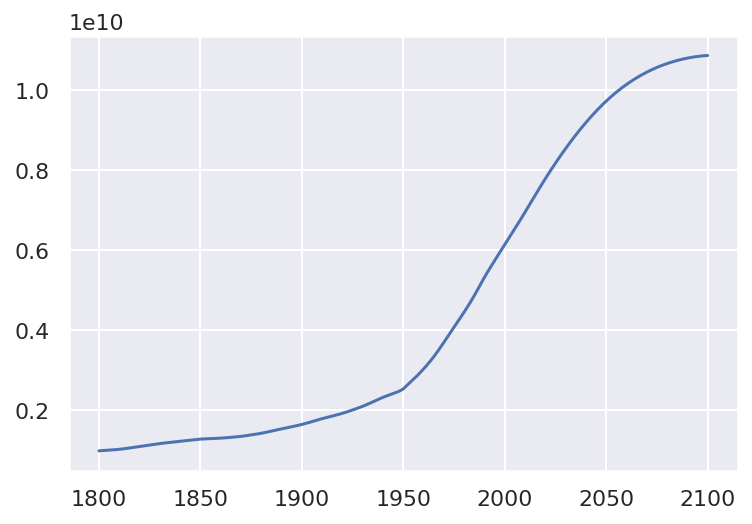

In [171]:
#1. How did the world poplation changed over time?
world_pop = list(population.iloc[-1:,2:].values)
years = list(population.columns[2:])
plt.plot(years, world_pop[0])

>With the actual shape of the data, we could easily compare different years of the given data, which we should remember for later. On the other hand the data is not tidy enough to make good visializations or calculations. The next step will handle this problem by melting the dataframe, so that each year will be an own row. The dataframe will also be sorted by the country name and year.

In [0]:
#melt the dataframe to get tidy data
population_melt = pd.melt(population, id_vars=["country"], var_name="year", value_name= "population")

#sort values by country and year
population_melt.sort_values(["country", "year"], inplace = True)

#show the head of the dataframe
population_melt.head()

country  year  population
0    Afghanistan  1800     3280000
195  Afghanistan  1801     3280000
390  Afghanistan  1802     3280000
585  Afghanistan  1803     3280000
780  Afghanistan  1804     3280000

>Now this process will be repeated for the life expectancy.

In [0]:
#read life expectancy csv
life_expectancy = pd.read_csv("life_expectancy_years.csv")

In [0]:
life_expectancy.head()

country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...   \
0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...    
1      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...    
2      Algeria  28.8  28.8  28.8  28.8  28.8  28.8  28.8  28.8  28.8  ...    
3      Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
4       Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  ...    

   2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
0  55.7  56.2  56.7  57.2  57.7  57.8  57.9  58.0  58.4  58.7  
1  75.9  76.3  76.7  77.0  77.2  77.4  77.6  77.7  77.9  78.0  
2  76.3  76.5  76.7  76.8  77.0  77.1  77.3  77.4  77.6  77.9  
3  82.7  82.7  82.6  82.6  82.6  82.6  82.5  82.5   NaN   NaN  
4  59.3  60.1  60.9  61.7  62.5  63.3  64.0  64.7  64.9  65.2  

[5 rows x 220 columns]

In [0]:
#melt the dataframe to get tidy data
life_expectancy_melt = pd.melt(life_expectancy, id_vars = ["country"], var_name = 'year', value_name = 'life_expectancy')

#sort values by country and year
life_expectancy_melt.sort_values(["country", "year"], inplace = True)

#show the head of the dataframe
life_expectancy_melt.head()

country  year  life_expectancy
0    Afghanistan  1800             28.2
187  Afghanistan  1801             28.2
374  Afghanistan  1802             28.2
561  Afghanistan  1803             28.2
748  Afghanistan  1804             28.2

>Although it's sometimes good to have each metric in one dataframe, it is needed for this analysis to create a dataframe with multiple metrics, because we are looking for relationships between this data. Therefore, we have to merge the melted dataframe together into one. Since the size of the population will be considered in most parts of the analysis, it will be used as "starting dataframe" for the merging process.

In [0]:
#merge the two dataframes together on country and year
df_full = pd.merge(population_melt, life_expectancy_melt, on =["country", "year"], how ='left')

In [0]:
#show the head of the dataframe
df_full.head()

country  year  population  life_expectancy
0  Afghanistan  1800     3280000             28.2
1  Afghanistan  1801     3280000             28.2
2  Afghanistan  1802     3280000             28.2
3  Afghanistan  1803     3280000             28.2
4  Afghanistan  1804     3280000             28.2

In [0]:
#show the info of the dataframe
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42705 entries, 0 to 42704
Data columns (total 4 columns):
country            42705 non-null object
year               42705 non-null object
population         42705 non-null int64
life_expectancy    40437 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB


>The dataframe was successfully melted and merged, so that we now have two metrics in one dataframe. While the population has 45705 rows, the life expectancy 'only' has 40437, which means, that there already is some missing data, which we have to handle later. Using the library "missingno" is a good and quick way to visualize missing data. 

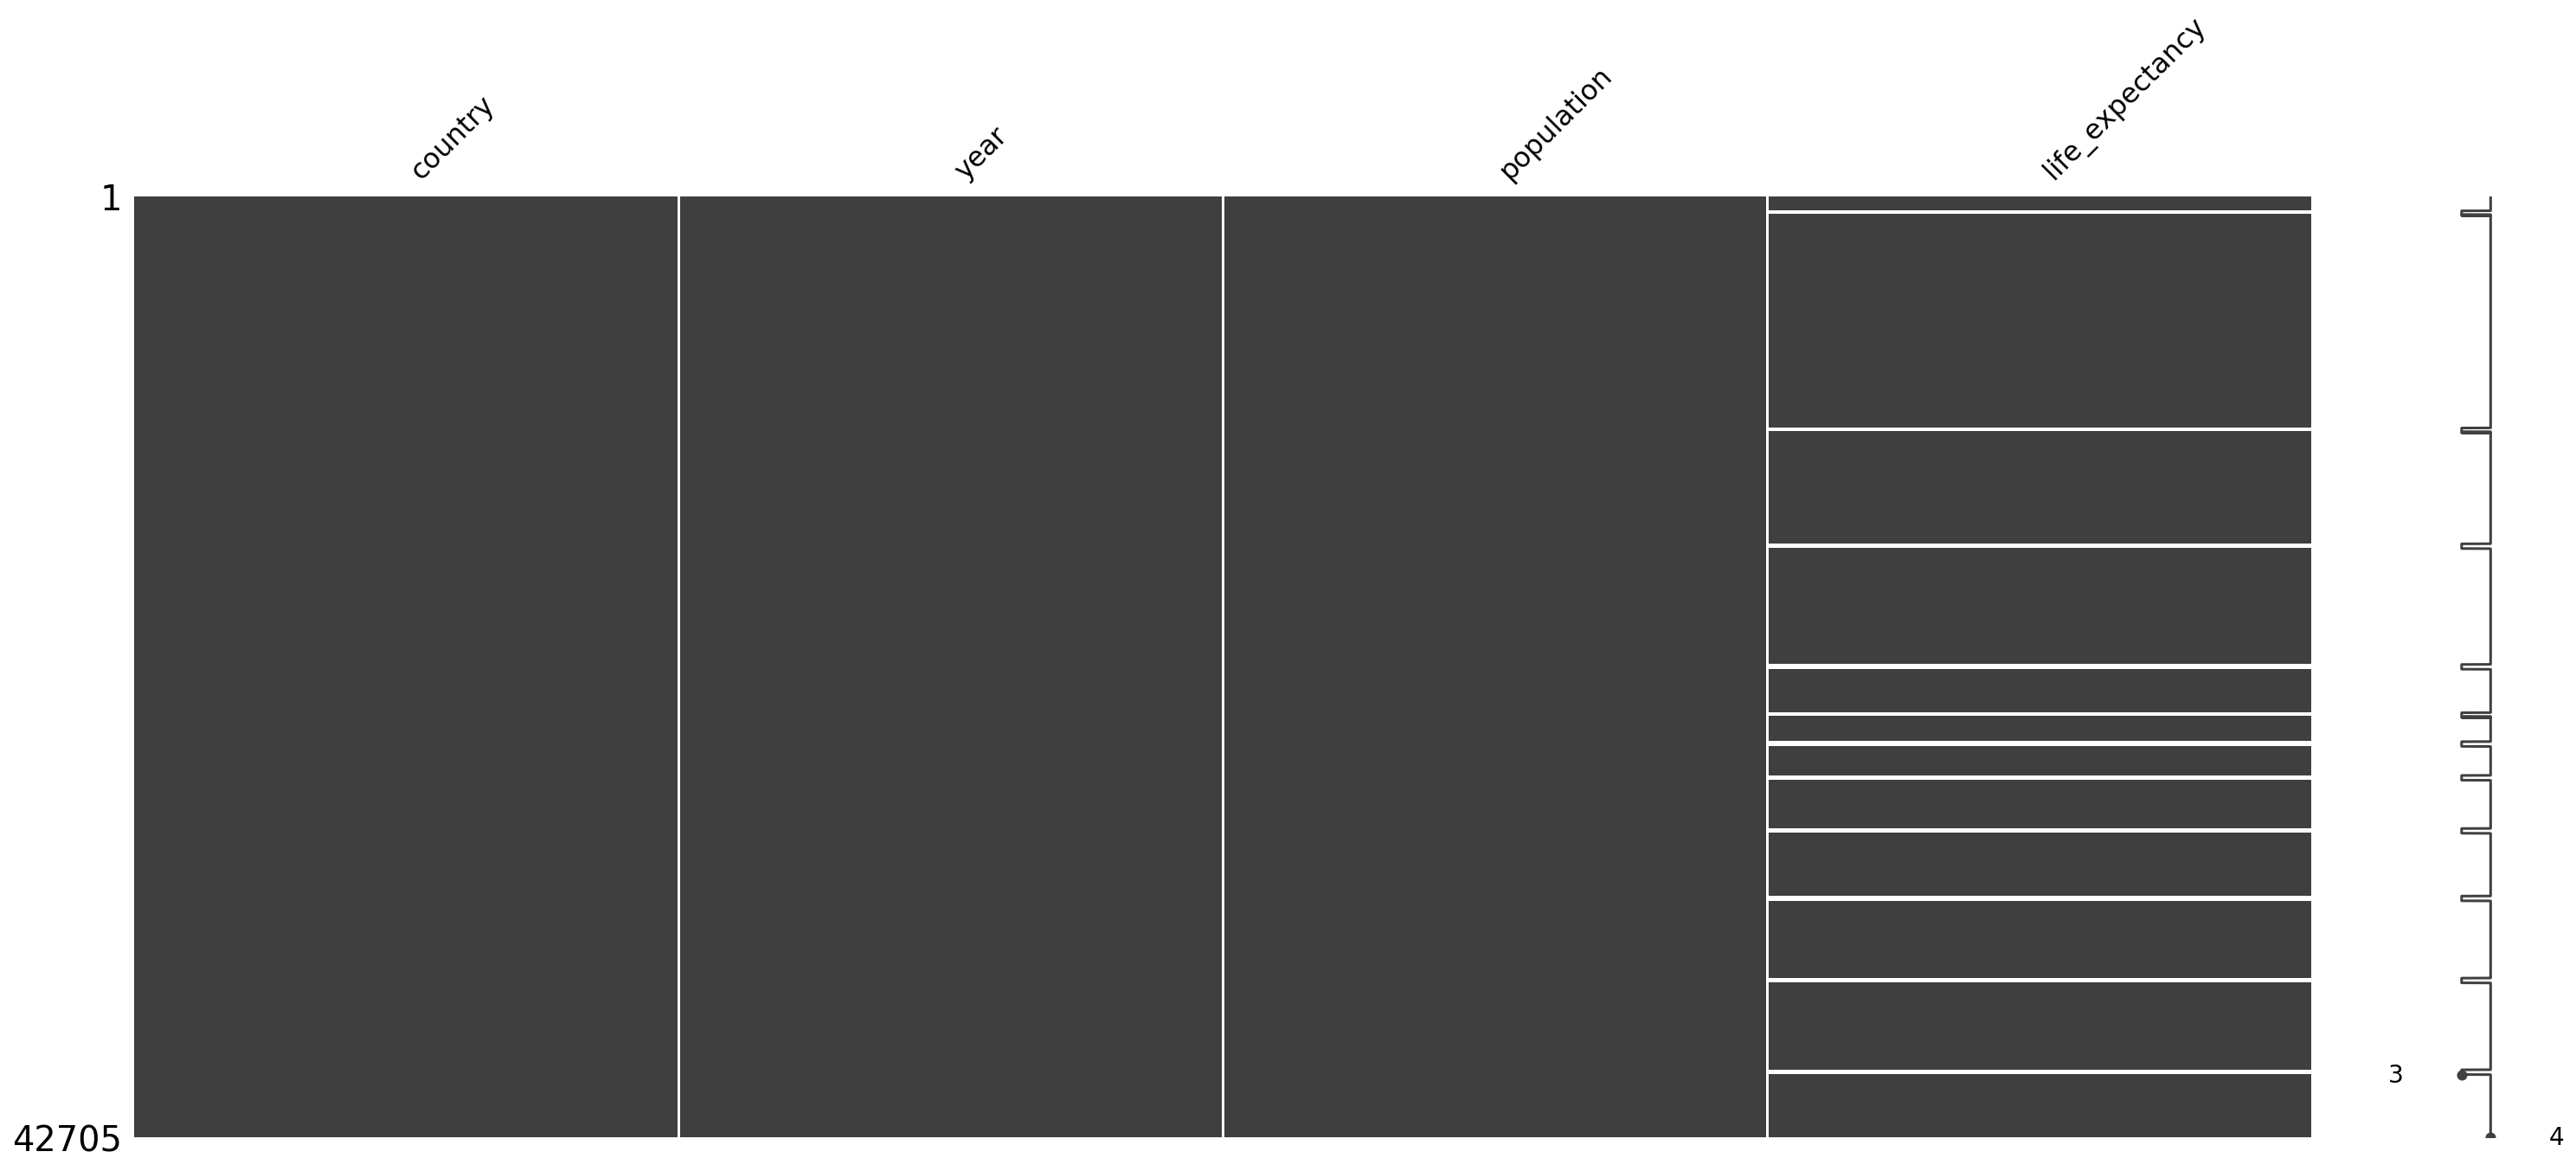

In [0]:
#plot the missing data of the dataset
ms.matrix(df_full);

>It looks like the missing rows are always multiple rows next to each other, so there maybe are specific countries missing. Before we go on with handling the missing data, we will create a function to generally merge the gapminder data into one dataframe, which will be done in the next cell.

In [0]:
def melt_df(df, valname):
    """
    INPUT: 
        df: list of dataframes,
        valname: valuename as string

    OUTPUT:
        list with melted dataframes (by country and year)
    """
    #create list
    df_func = []
    
    #loop over list of df 
    for i, x in enumerate(df):
        df_melt = pd.melt(df[i], id_vars = ["country"], var_name = 'year', value_name = valname[i])
        df_melt.sort_values(["country", "year"], inplace = True)
        
        #append to created list
        df_func.append(df_melt)
    return df_func

In [0]:
dataframes = [population, life_expectancy]
value_names = ["population", "life_expectancy"]

df_func = melt_df(dataframes, value_names)

In [0]:
df_func[1].head()

country  year  life_expectancy
0    Afghanistan  1800             28.2
187  Afghanistan  1801             28.2
374  Afghanistan  1802             28.2
561  Afghanistan  1803             28.2
748  Afghanistan  1804             28.2

>It worked and together with the "reduce" function it is possible to merge multiple metrics with less effort/writing into one dataframe. 

In [0]:
#https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

#reduces the melted dataframes in our list to one dataframe via merge
df_all = reduce(lambda left,right: pd.merge(left,right,on =["country", "year"], how = 'left'), df_func)

In [0]:
df_all.head()

country  year  population  life_expectancy
0  Afghanistan  1800     3280000             28.2
1  Afghanistan  1801     3280000             28.2
2  Afghanistan  1802     3280000             28.2
3  Afghanistan  1803     3280000             28.2
4  Afghanistan  1804     3280000             28.2

>For the final step of creating the "base data", all the necessary data will be loaded and merged into one dataframe.
>
> The necessary data contains: the population, the life expectancy, the income per person, the sugar consume per person and the alcohol consume per person.

In [0]:
#read in all the necessary *.csv
population = pd.read_csv("population_total.csv")
life_expectancy = pd.read_csv("life_expectancy_years.csv")
income_per_person = pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
sugar_cons = pd.read_csv("sugar_per_person_g_per_day.csv")
alc_cons = pd.read_csv("alcohol_consumption_per_adult_15plus_litres.csv")

#merge the dataframes together like in the steps before
dataframes_all = [population, life_expectancy, income_per_person, sugar_cons, alc_cons]
value_names_all = ["population", "life_expectancy","income_per_person", "sugar_cons", "alc_cons"]

df_func_all = melt_df(dataframes_all, value_names_all)

df_all = reduce(lambda left,right: pd.merge(left,right,on =["country", "year"], how = 'left'), df_func_all)


In [0]:
df_all.head(3)

country  year  population  life_expectancy  income_per_person  \
0  Afghanistan  1800     3280000             28.2              603.0   
1  Afghanistan  1801     3280000             28.2              603.0   
2  Afghanistan  1802     3280000             28.2              603.0   

   sugar_cons  alc_cons  
0         NaN       NaN  
1         NaN       NaN  
2         NaN       NaN

In [0]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42705 entries, 0 to 42704
Data columns (total 7 columns):
country              42705 non-null object
year                 42705 non-null object
population           42705 non-null int64
life_expectancy      40437 non-null float64
income_per_person    42267 non-null float64
sugar_cons           8022 non-null float64
alc_cons             404 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.6+ MB


>Looking at the info of the newly created dataframe, we can see that there is alot more missing data than before. Also the "year" column is a string, which should be transformed into an integer, because we will create bins based on the years later. Also the income_per_person column should be transformed into an integer. The sugar_cons is in gramm, so it can also be transformed into an integer. 

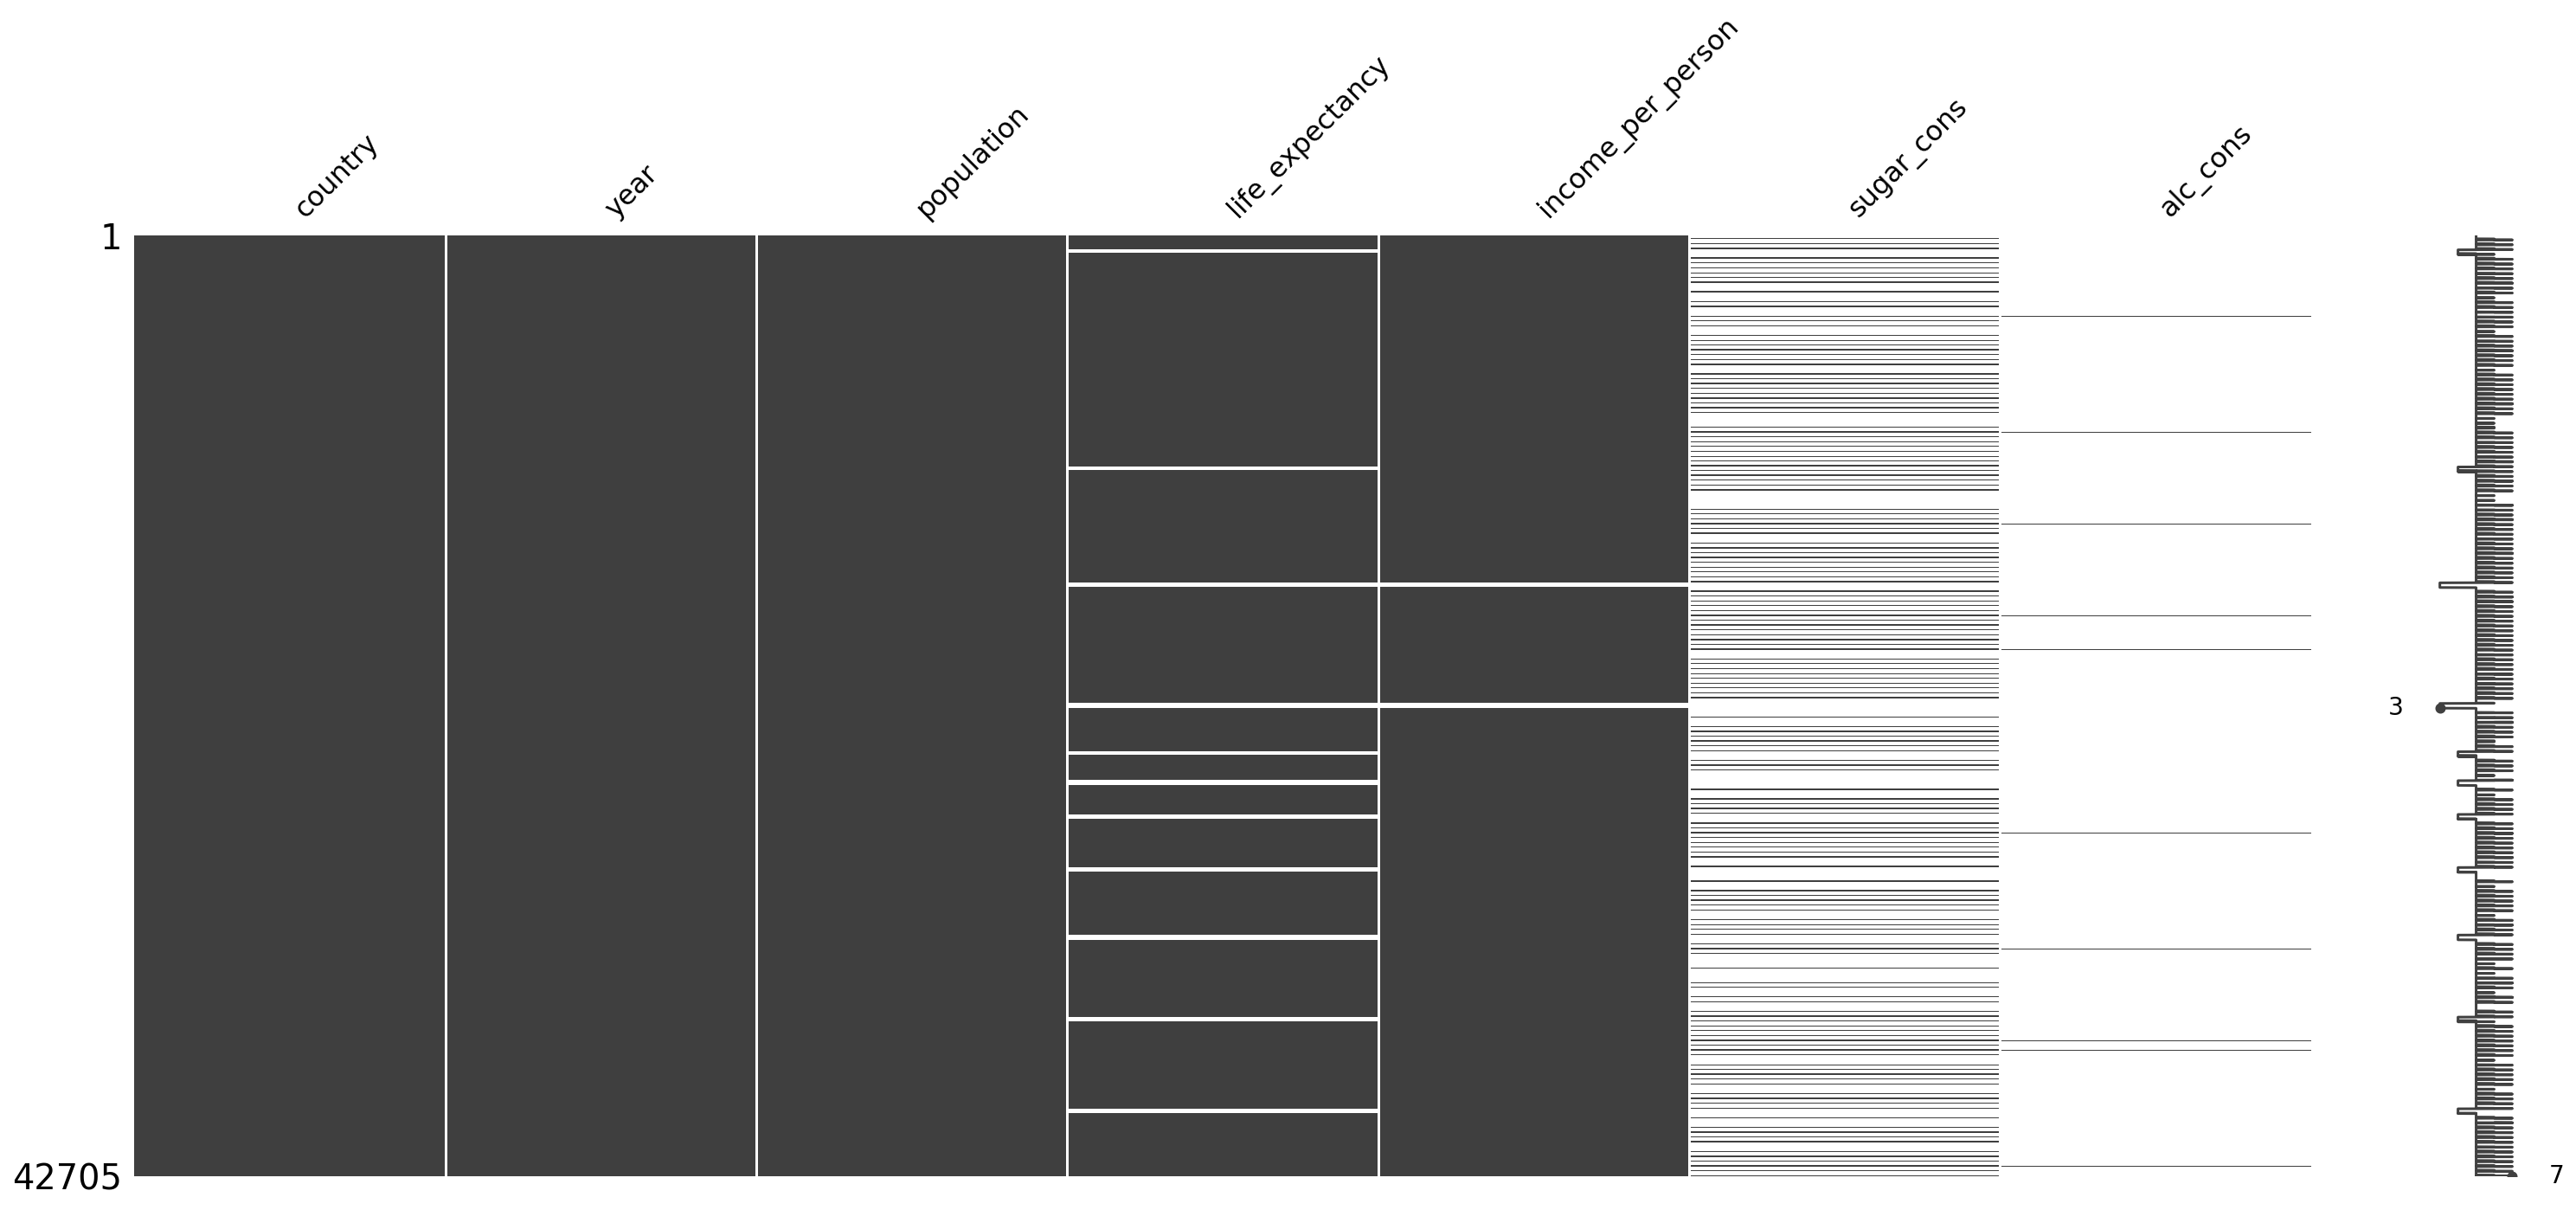

In [0]:
ms.matrix(df_all);

>The next step is to find out how the data can be cleaned. Thanks to missingno, we can see, that there is not that much missing data in the "income_per_person" column. In fact, the missing data seems to be on the same height as some of the missing data in the "life_expectancy" column. If we clean the life_expectancy column, then the income_per_person column should also be automatically cleaned with that. Going on with the columns, we can observe that the "sugar_cons" data is much less dense than the columns before. Also there is the least data in the "alc_cons" column. 
>
>The easiest way handling the missing data would be to just drop all the missing data. But it should be avoided in this case, because it would otherwise create an "inconsistency". For example when just 24/50 datapoints of one country are missing, and we take the sum over all countries afterwards, the considered data will not be consistent over time. So if not that much data is missing for a particular country, we could impute the data with the mean of the specific country, if too much data is missing, the whole country data will be dropped. The next defined function should help getting some clarity.

In [0]:
def df_col_attr(df):
    """
    INPUT: 
        df - Dataframe
    OUTPUT:
        print statements with the chosen metrics (Duplicates, Min/Max Values, Year Span, Unique Values)
    """
    print("##### DUPLICATES ######\n")
    print("Number of duplicated rows:", sum(df.duplicated()),"\n")
    
    print("##### MIN / MAX - VALUES ######\n")
    for x in df.columns:
        print(x, f"- min: {df[x].min()}", f"- max: {df[x].max()}")
        
    print("\n##### YEAR SPAN OF COLUMN #####\n")
    
    for x in df.columns:
        df_year = df.dropna(subset = [x])
        print(x, f"- Min: {df_year.year.min()}", f" - Max: {df_year.year.max()}")
        
    print("\n##### UNIQUE - VALUES ######\n")
    for x in df.columns:
        print(x, f"- Number of entries: {df[x].count()} - Number of unique values: {df[x].nunique()}")

In [0]:
df_col_attr(df_all)

##### DUPLICATES ######

Number of duplicated rows: 0 

##### MIN / MAX - VALUES ######

country - min: Afghanistan - max: Zimbabwe
year - min: 1800 - max: 2018
population - min: 642 - max: 1420000000
life_expectancy - min: 1.0 - max: 84.2
income_per_person - min: 247.0 - max: 178000.0
sugar_cons - min: 0.0 - max: 1410.0
alc_cons - min: 0.02 - max: 24.2

##### YEAR SPAN OF COLUMN #####

country - Min: 1800  - Max: 2018
year - Min: 1800  - Max: 2018
population - Min: 1800  - Max: 2018
life_expectancy - Min: 1800  - Max: 2018
income_per_person - Min: 1800  - Max: 2018
sugar_cons - Min: 1961  - Max: 2013
alc_cons - Min: 1985  - Max: 2008

##### UNIQUE - VALUES ######

country - Number of entries: 42705 - Number of unique values: 195
year - Number of entries: 42705 - Number of unique values: 219
population - Number of entries: 42705 - Number of unique values: 4599
life_expectancy - Number of entries: 40437 - Number of unique values: 739
income_per_person - Number of entries: 42267 - Number

>The first line shows that there is no duplicated data. For the year spans we can see that most of the data is from 1800 - 2018. >The sugar cons contains data between 1961 and 2013 and the alc cons contains data between 1985 - 2008.
>
>Speaking of unique values, the only interesting fact is that there are 184 different countries considered in the population dataset. 
>
>In the next step we should find out which countries have missing data in the specified column and dataframe.

In [0]:
def show_missing_countries(df, column):
    """
    INPUT: 
        df - dataframe
        column - string 

    OUTPUT:
        returns a list with strings of countries, which has 0 data inside the given dataframe
    """
    list1 = list(df.country.unique())
    list2 = list(df.dropna(subset =[column]).country.unique())
    
    list3 = [x for x in list1 if x not in list2]
    list3.sort()
    
    return list3

>Let's take a closer look on the column with the least rows of data - the "alc_cons" column.

In [0]:
show_missing_countries(df_all, "alc_cons")

['Congo, Rep.',
 'Holy See',
 'Liechtenstein',
 'Maldives',
 'Marshall Islands',
 'Monaco',
 'Montenegro',
 'Palestine',
 'San Marino',
 'South Sudan']

>Surprisingly there are not many countries missing. Therefore the missing data probably is connected to a time-component. 

In [0]:
#show the value counts of the years, if all the np.nan values are dropped
df_all.dropna(subset=["alc_cons"]).year.value_counts()

2005    184
2008    184
1994      6
1993      4
1995      4
1990      4
1992      2
1996      2
2004      1
1986      1
2006      1
1988      1
1989      1
2007      1
1985      1
2002      1
2003      1
2000      1
1998      1
1991      1
2001      1
1987      1
Name: year, dtype: int64

>The most values were measured in 2005 and 2008 - for the analysis, a separate dataframe should be created. This dataframe wil l contain data for the years 2005 and 2008 only. 
>
>In the next step this process will be repeated for the "sugar_cons" column.

In [0]:
len(show_missing_countries(df_all, "sugar_cons"))

27

In [0]:
df_all.dropna(subset=["sugar_cons"]).year.value_counts()

2012    168
2010    168
2007    168
2009    168
2008    168
2006    168
2013    168
2011    168
2002    166
2001    166
2000    166
2003    166
2005    166
2004    166
1996    164
1995    164
1997    164
1998    164
1994    164
1999    164
1993    164
1992    161
1990    142
1991    142
1964    141
1986    141
1981    141
1983    141
1961    141
1967    141
1971    141
1969    141
1962    141
1972    141
1968    141
1976    141
1970    141
1989    141
1963    141
1988    141
1974    141
1973    141
1978    141
1977    141
1975    141
1980    141
1965    141
1979    141
1982    141
1984    141
1966    141
1985    141
1987    141
Name: year, dtype: int64

>18 countries are missing. In 1992 the number of countries increased, therefir they took more countries into consideration. For this analysis, all the additional countries, which were added after 1991, will be excluded. 

In [0]:
show_missing_countries(df_all, "life_expectancy")

['Holy See',
 'Liechtenstein',
 'Monaco',
 'Nauru',
 'Palau',
 'San Marino',
 'St. Kitts and Nevis',
 'Tuvalu']

>For the life_expectancy there are also not many countries missing. In the next cell we will define a function, which prints the amount of missing rows per country.

In [0]:
def show_n_missing(df, column):
    """
    INPUT: 
        df - Dataframe
        column - string 
    
    OUTPUT: 
        prints the country names and the corresponding number of missing values
        returns a list of strings with countrynames of countries with missing values
    """
    missing = []
    for x in list((df["country"]).unique()):
        n_missing = sum(df[df["country"] == x][column].isnull())
        
        if n_missing > 0:
            missing.append(x)
            print(x, "-", n_missing)
        
    return missing

In [0]:
show_n_missing(df_all, "life_expectancy");

Andorra - 172
Dominica - 172
Holy See - 219
Liechtenstein - 219
Marshall Islands - 172
Monaco - 219
Nauru - 219
Palau - 219
San Marino - 219
St. Kitts and Nevis - 219
Tuvalu - 219


In [0]:
show_missing_countries(df_all, "income_per_person")

['Holy See', 'Liechtenstein']

In [0]:
show_n_missing(df_all, "income_per_person");

Holy See - 219
Liechtenstein - 219


> These countries will also be dropped out later because of too much missing data.
>Now we will take a look on the male/female metrics and create and clean the datasets.

In [0]:
#repeat the same process as above 
life_expectancy_fem = pd.read_csv("life_expectancy_female.csv")
life_expectancy_male = pd.read_csv("life_expectancy_male.csv")
blood_pres_fem = pd.read_csv("blood_pressure_sbp_women_mmhg.csv")
blood_pres_male = pd.read_csv("blood_pressure_sbp_men_mmhg.csv")
bmi_fem = pd.read_csv("body_mass_index_bmi_women_kgperm2.csv")
bmi_male = pd.read_csv("body_mass_index_bmi_men_kgperm2.csv")
chol_fat_blood_fem = pd.read_csv("cholesterol_fat_in_blood_women_mmolperl.csv")
chol_fat_blood_male = pd.read_csv("cholesterol_fat_in_blood_men_mmolperl.csv")

dataframes_male_fem = [life_expectancy_fem, life_expectancy_male, blood_pres_fem, 
                       blood_pres_male, bmi_fem, bmi_male, chol_fat_blood_fem, chol_fat_blood_male]
value_names_male_fem = ["life_expectancy_fem", "life_expectancy_male", "blood_pres_fem",
                       "blood_pres_male", "bmi_fem", "bmi_male", "chol_fat_blood_fem", "chol_fat_blood_male"]

df_func_male_fem = melt_df(dataframes_male_fem, value_names_male_fem)

df_male_fem = reduce(lambda left,right: pd.merge(left,right,on =["country", "year"], how = 'left'), df_func_male_fem)

In [0]:
df_male_fem.head()

country  year  life_expectancy_fem  life_expectancy_male  \
0  Afghanistan  1950                 28.4                  26.9   
1  Afghanistan  1951                 28.6                  27.1   
2  Afghanistan  1952                 29.2                  27.7   
3  Afghanistan  1953                 29.7                  28.2   
4  Afghanistan  1954                 30.2                  28.7   

   blood_pres_fem  blood_pres_male  bmi_fem  bmi_male  chol_fat_blood_fem  \
0             NaN              NaN      NaN       NaN                 NaN   
1             NaN              NaN      NaN       NaN                 NaN   
2             NaN              NaN      NaN       NaN                 NaN   
3             NaN              NaN      NaN       NaN                 NaN   
4             NaN              NaN      NaN       NaN                 NaN   

   chol_fat_blood_male  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

In [0]:
df_male_fem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27600 entries, 0 to 27599
Data columns (total 10 columns):
country                 27600 non-null object
year                    27600 non-null object
life_expectancy_fem     27600 non-null float64
life_expectancy_male    27600 non-null float64
blood_pres_fem          5307 non-null float64
blood_pres_male         5307 non-null float64
bmi_fem                 5307 non-null float64
bmi_male                5307 non-null float64
chol_fat_blood_fem      5307 non-null float64
chol_fat_blood_male     5307 non-null float64
dtypes: float64(8), object(2)
memory usage: 2.3+ MB


There are 5307 rows for the blood pressure, the bmi and the cholesterol.  

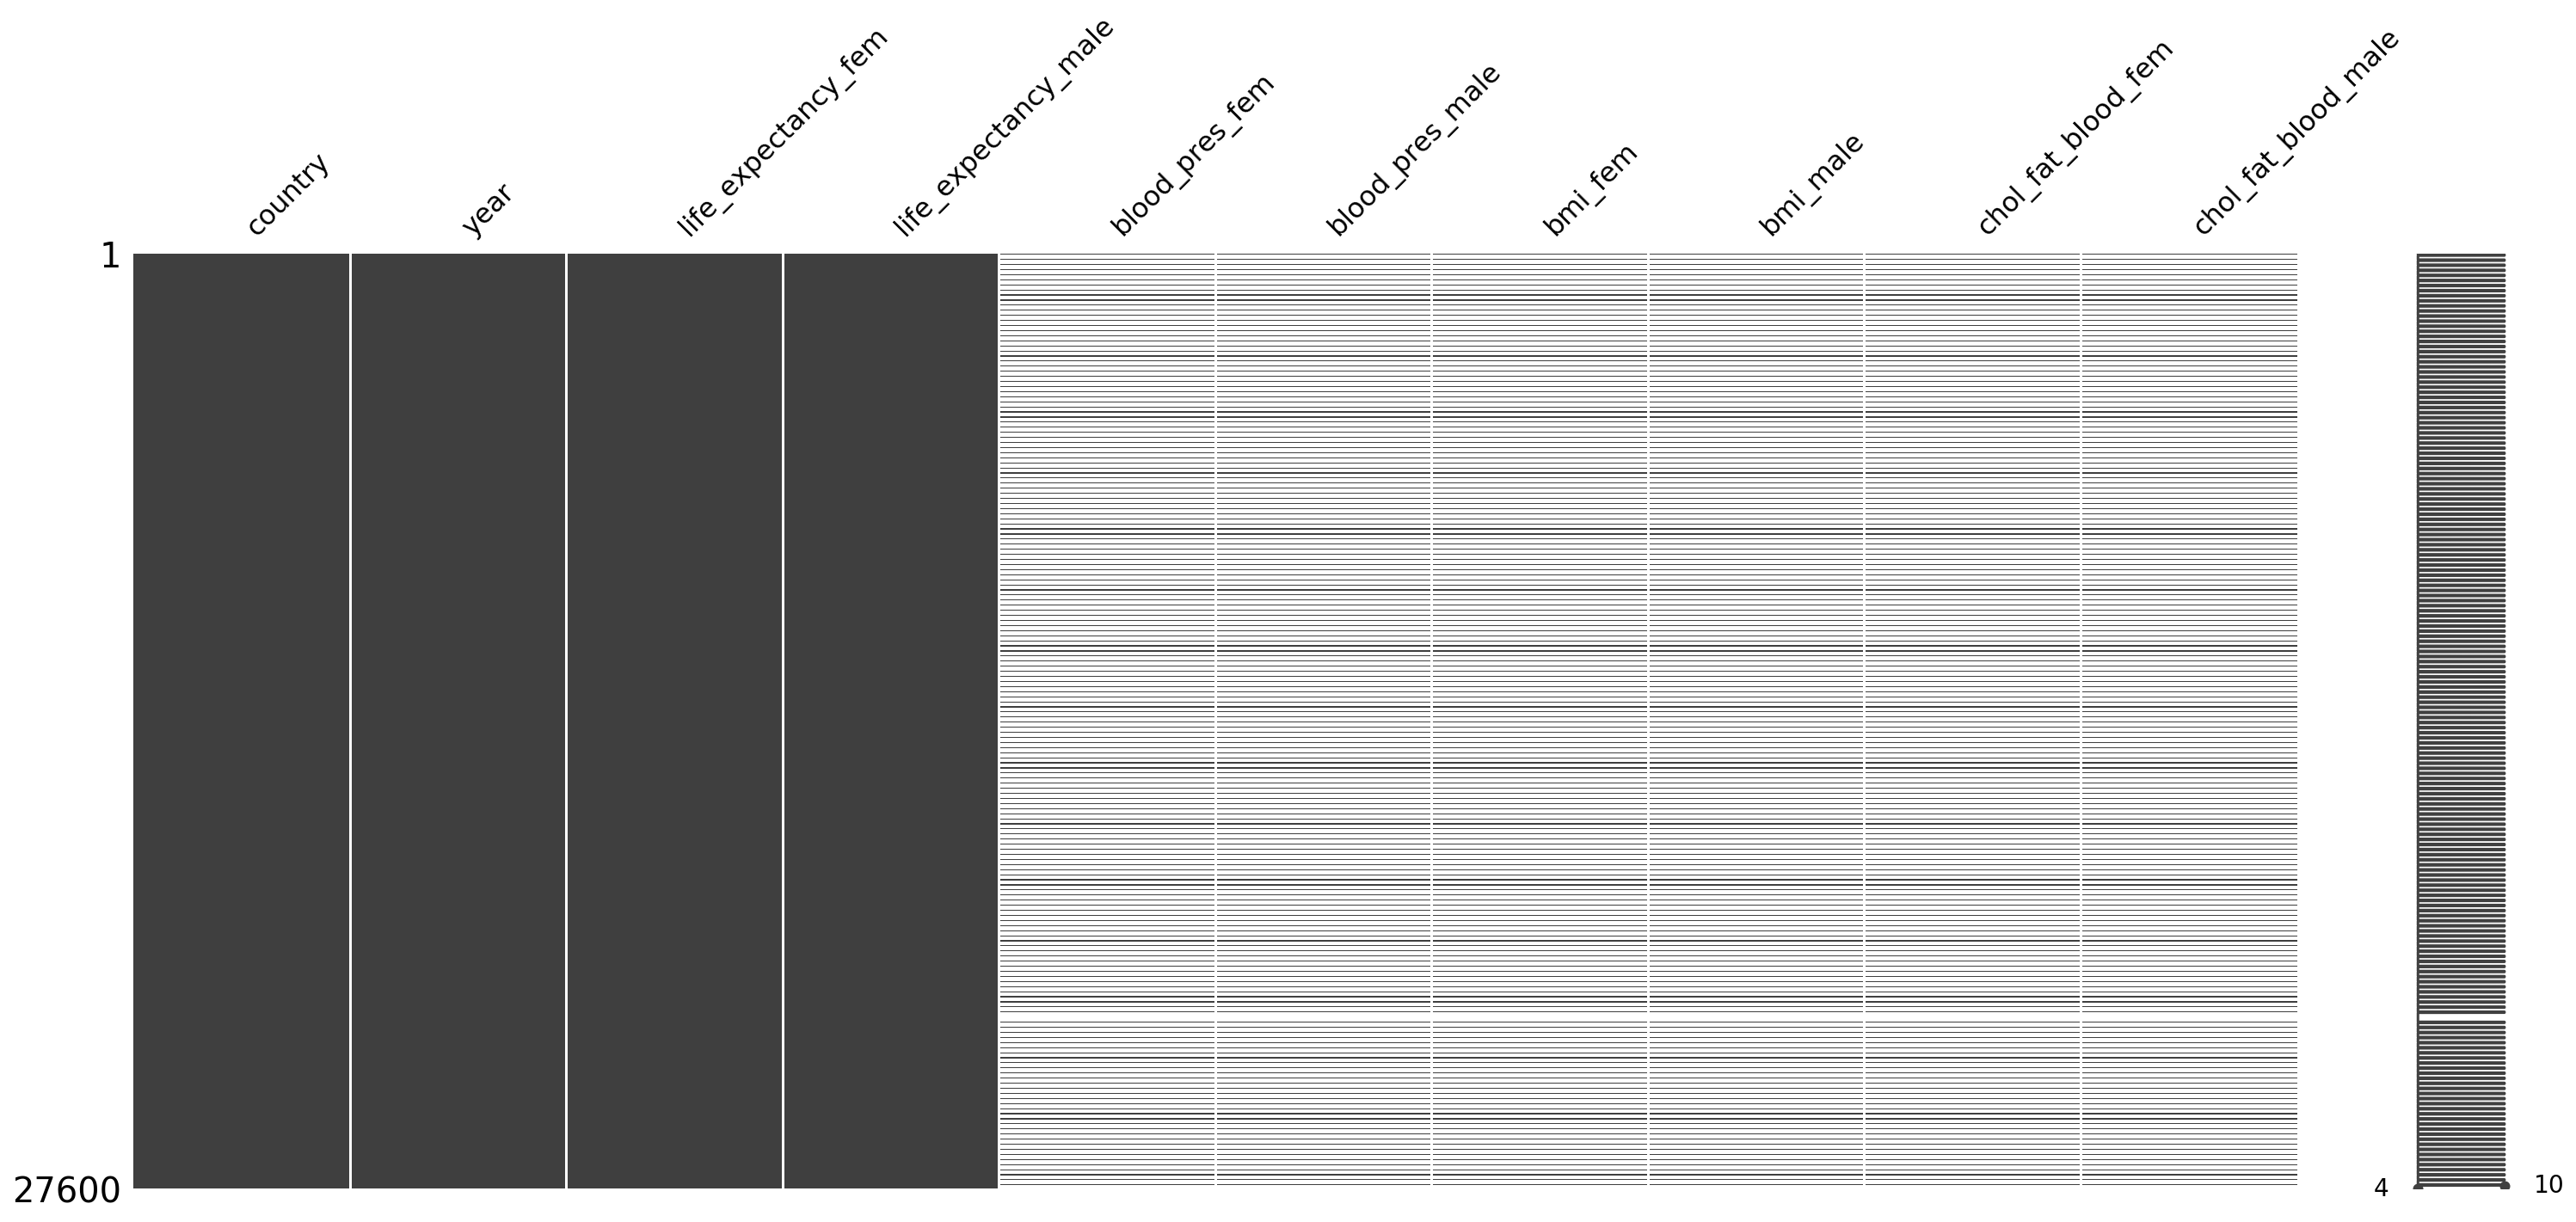

In [0]:
ms.matrix(df_male_fem);

> Also the pattern of missing data looks regular.

In [0]:
df = df_male_fem

print(1, show_missing_countries(df, "blood_pres_fem"))

1 ['South Sudan']


In [0]:
df_col_attr(df_male_fem)

##### DUPLICATES ######

Number of duplicated rows: 0 

##### MIN / MAX - VALUES ######

country - min: Afghanistan - max: Zimbabwe
year - min: 1950 - max: 2099
life_expectancy_fem - min: 22.4 - max: 97.3
life_expectancy_male - min: 16.3 - max: 91.9
blood_pres_fem - min: 110.0 - max: 140.0
blood_pres_male - min: 119.0 - max: 143.0
bmi_fem - min: 18.5 - max: 34.3
bmi_male - min: 19.0 - max: 31.0
chol_fat_blood_fem - min: 3.97 - max: 6.2
chol_fat_blood_male - min: 3.73 - max: 6.24

##### YEAR SPAN OF COLUMN #####

country - Min: 1950  - Max: 2099
year - Min: 1950  - Max: 2099
life_expectancy_fem - Min: 1950  - Max: 2099
life_expectancy_male - Min: 1950  - Max: 2099
blood_pres_fem - Min: 1980  - Max: 2008
blood_pres_male - Min: 1980  - Max: 2008
bmi_fem - Min: 1980  - Max: 2008
bmi_male - Min: 1980  - Max: 2008
chol_fat_blood_fem - Min: 1980  - Max: 2008
chol_fat_blood_male - Min: 1980  - Max: 2008

##### UNIQUE - VALUES ######

country - Number of entries: 27600 - Number of unique values

>To summarize the results of the investigation above, we have to:
><ol>
>    <li>Drop South Sudan out of the dataframe</li>
>    <li>Create a new dataframe, looking just at the data from 1980 - 2008</li>
>    <li>Transform the blood pressure columns into integer, because the blood pressure will never be a float</li>
></ol>

<a id='cleaning'></a>
### Cleaning the datatypes, building the needed dataframes and dealing with missing values 

>Now the following data cleaning and wrangling steps will be done:
><ol>
    <b>For df_all:</b>
    <li>Drop countries with missing data in life_expectancy</li>
    <li>Transform the columns year, income_per_person and sugar_cons to integer</li>
    <li>Create new dataframes for each metric</li>
    <li>Drop countries out of the sugar consume dataframe, which were added after 1991 and cut it to 1961 - 2013</li>
    <li>Cut the alcohol consume dataframe from 2005 - 2008 and drop the countries with missing data</li>
>    
>   <b>For df_male_fem:</b>
    <li>Transform year and the blood pressure to integer</li>
    <li>Cut the dataframe from 1980 - 2008</li>
    <li>Drop South Sudan out of the dataframe</li>
</ol>

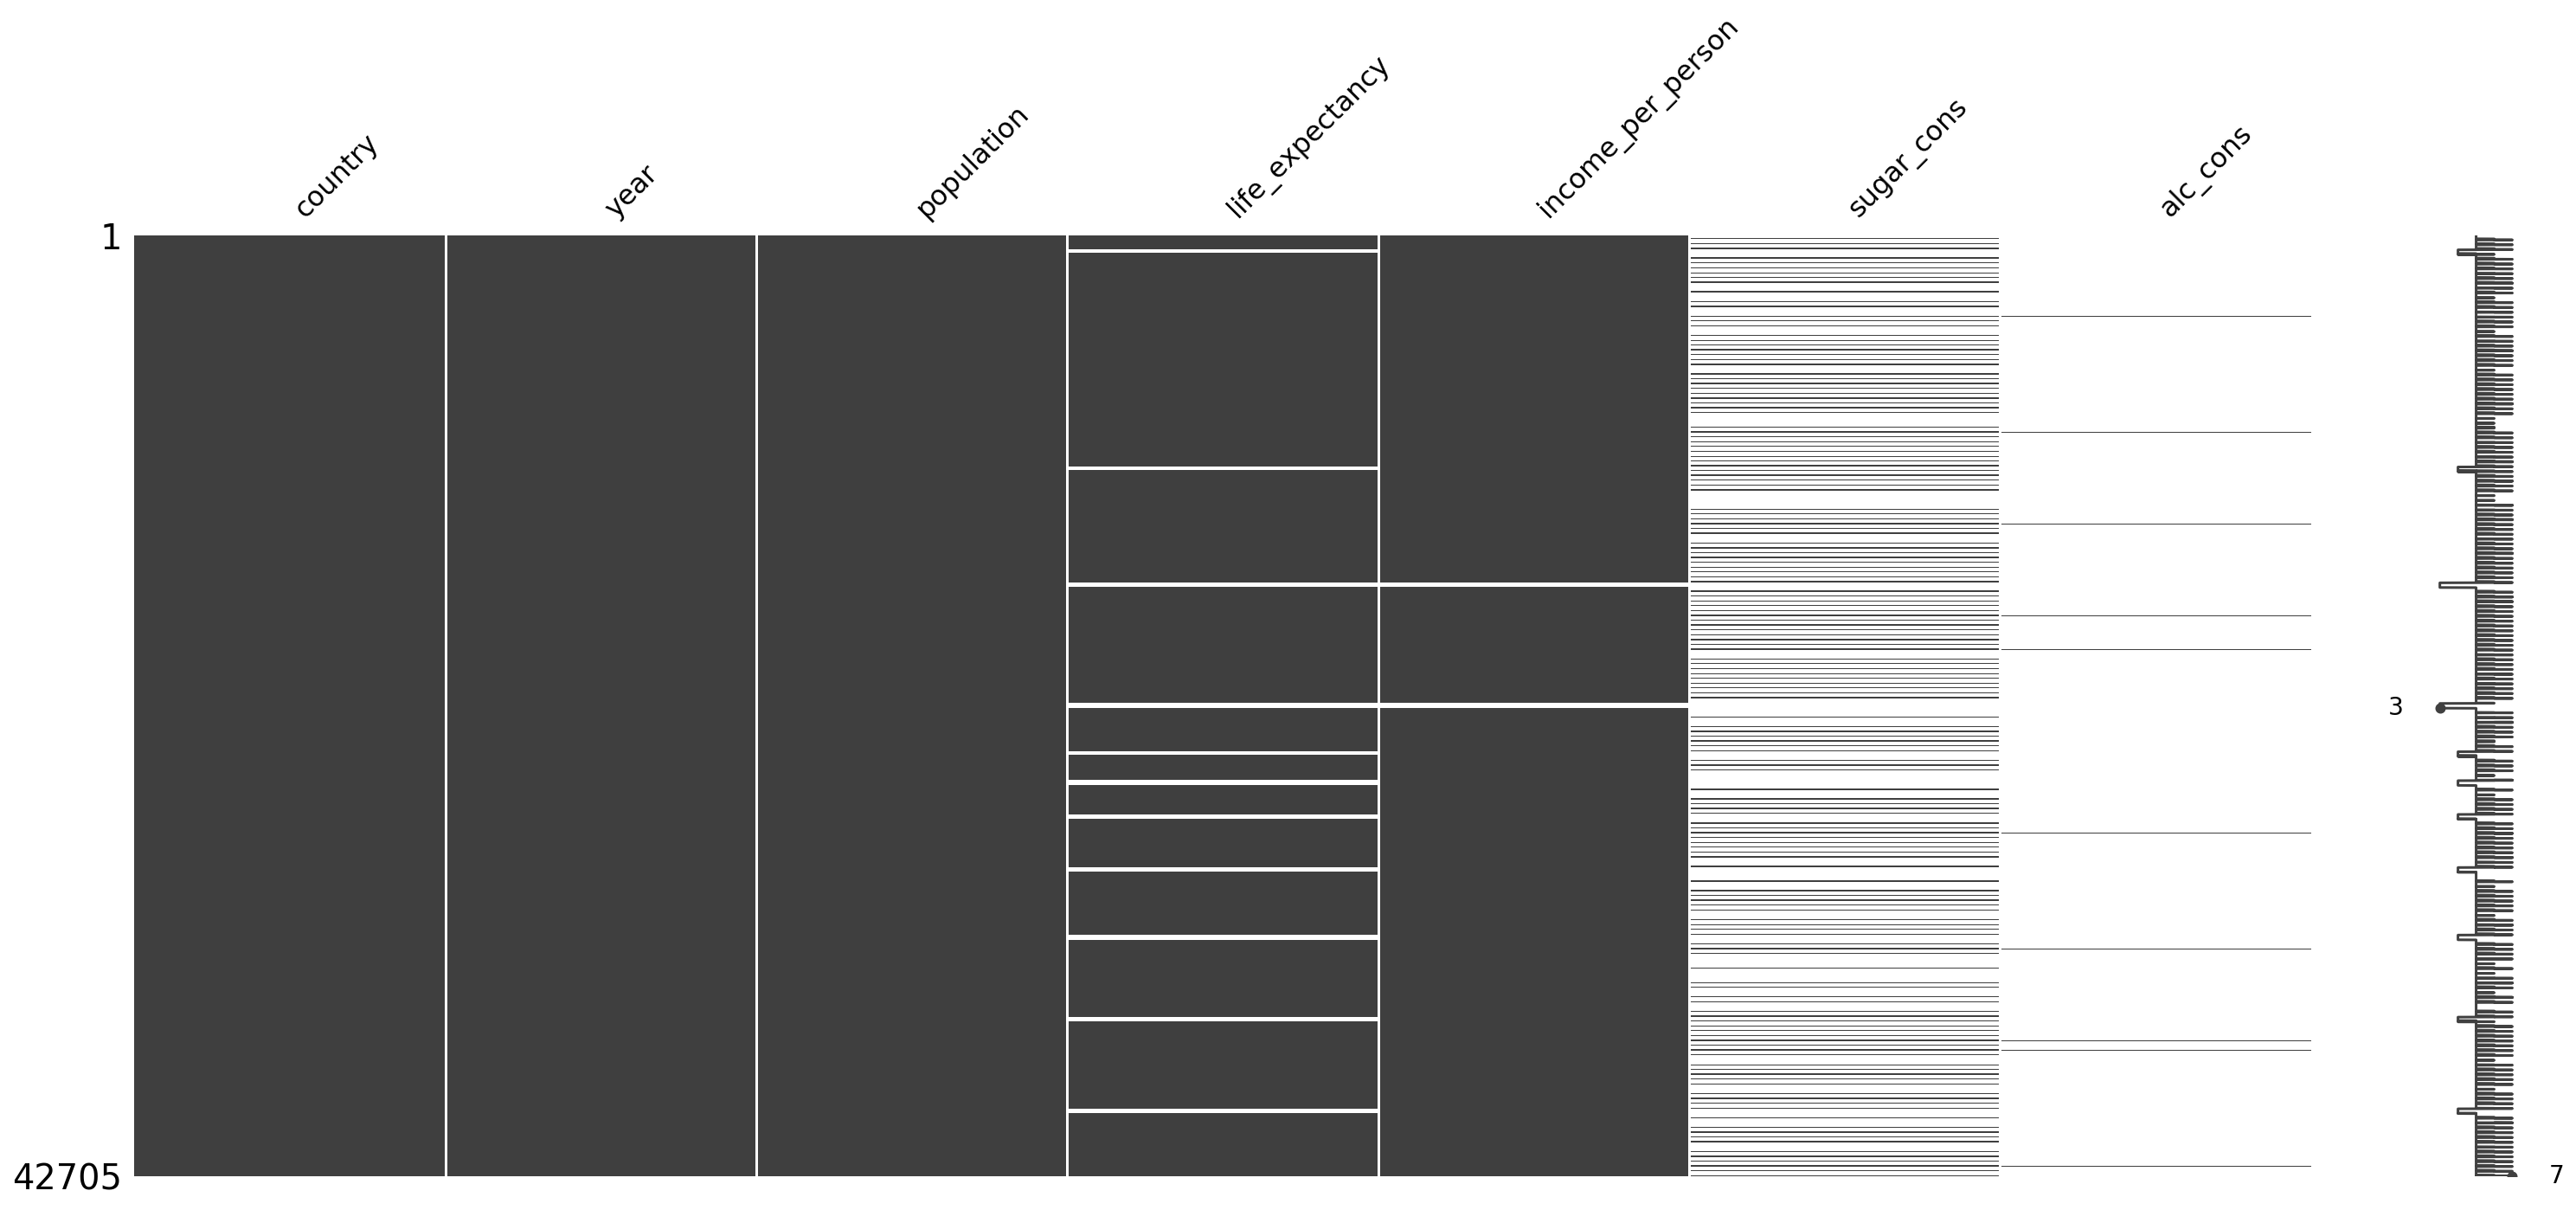

In [0]:
ms.matrix(df_all);

>At first, the countries with missing data in the column "life_expectancy" will be dropped.

In [0]:
#https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression
#https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe

#drop all the countries with missing values
missing_val = show_n_missing(df_all, "life_expectancy");
df_all = df_all.drop(df_all[df_all["country"].isin(missing_val)].index)   

Andorra - 172
Dominica - 172
Holy See - 219
Liechtenstein - 219
Marshall Islands - 172
Monaco - 219
Nauru - 219
Palau - 219
San Marino - 219
St. Kitts and Nevis - 219
Tuvalu - 219


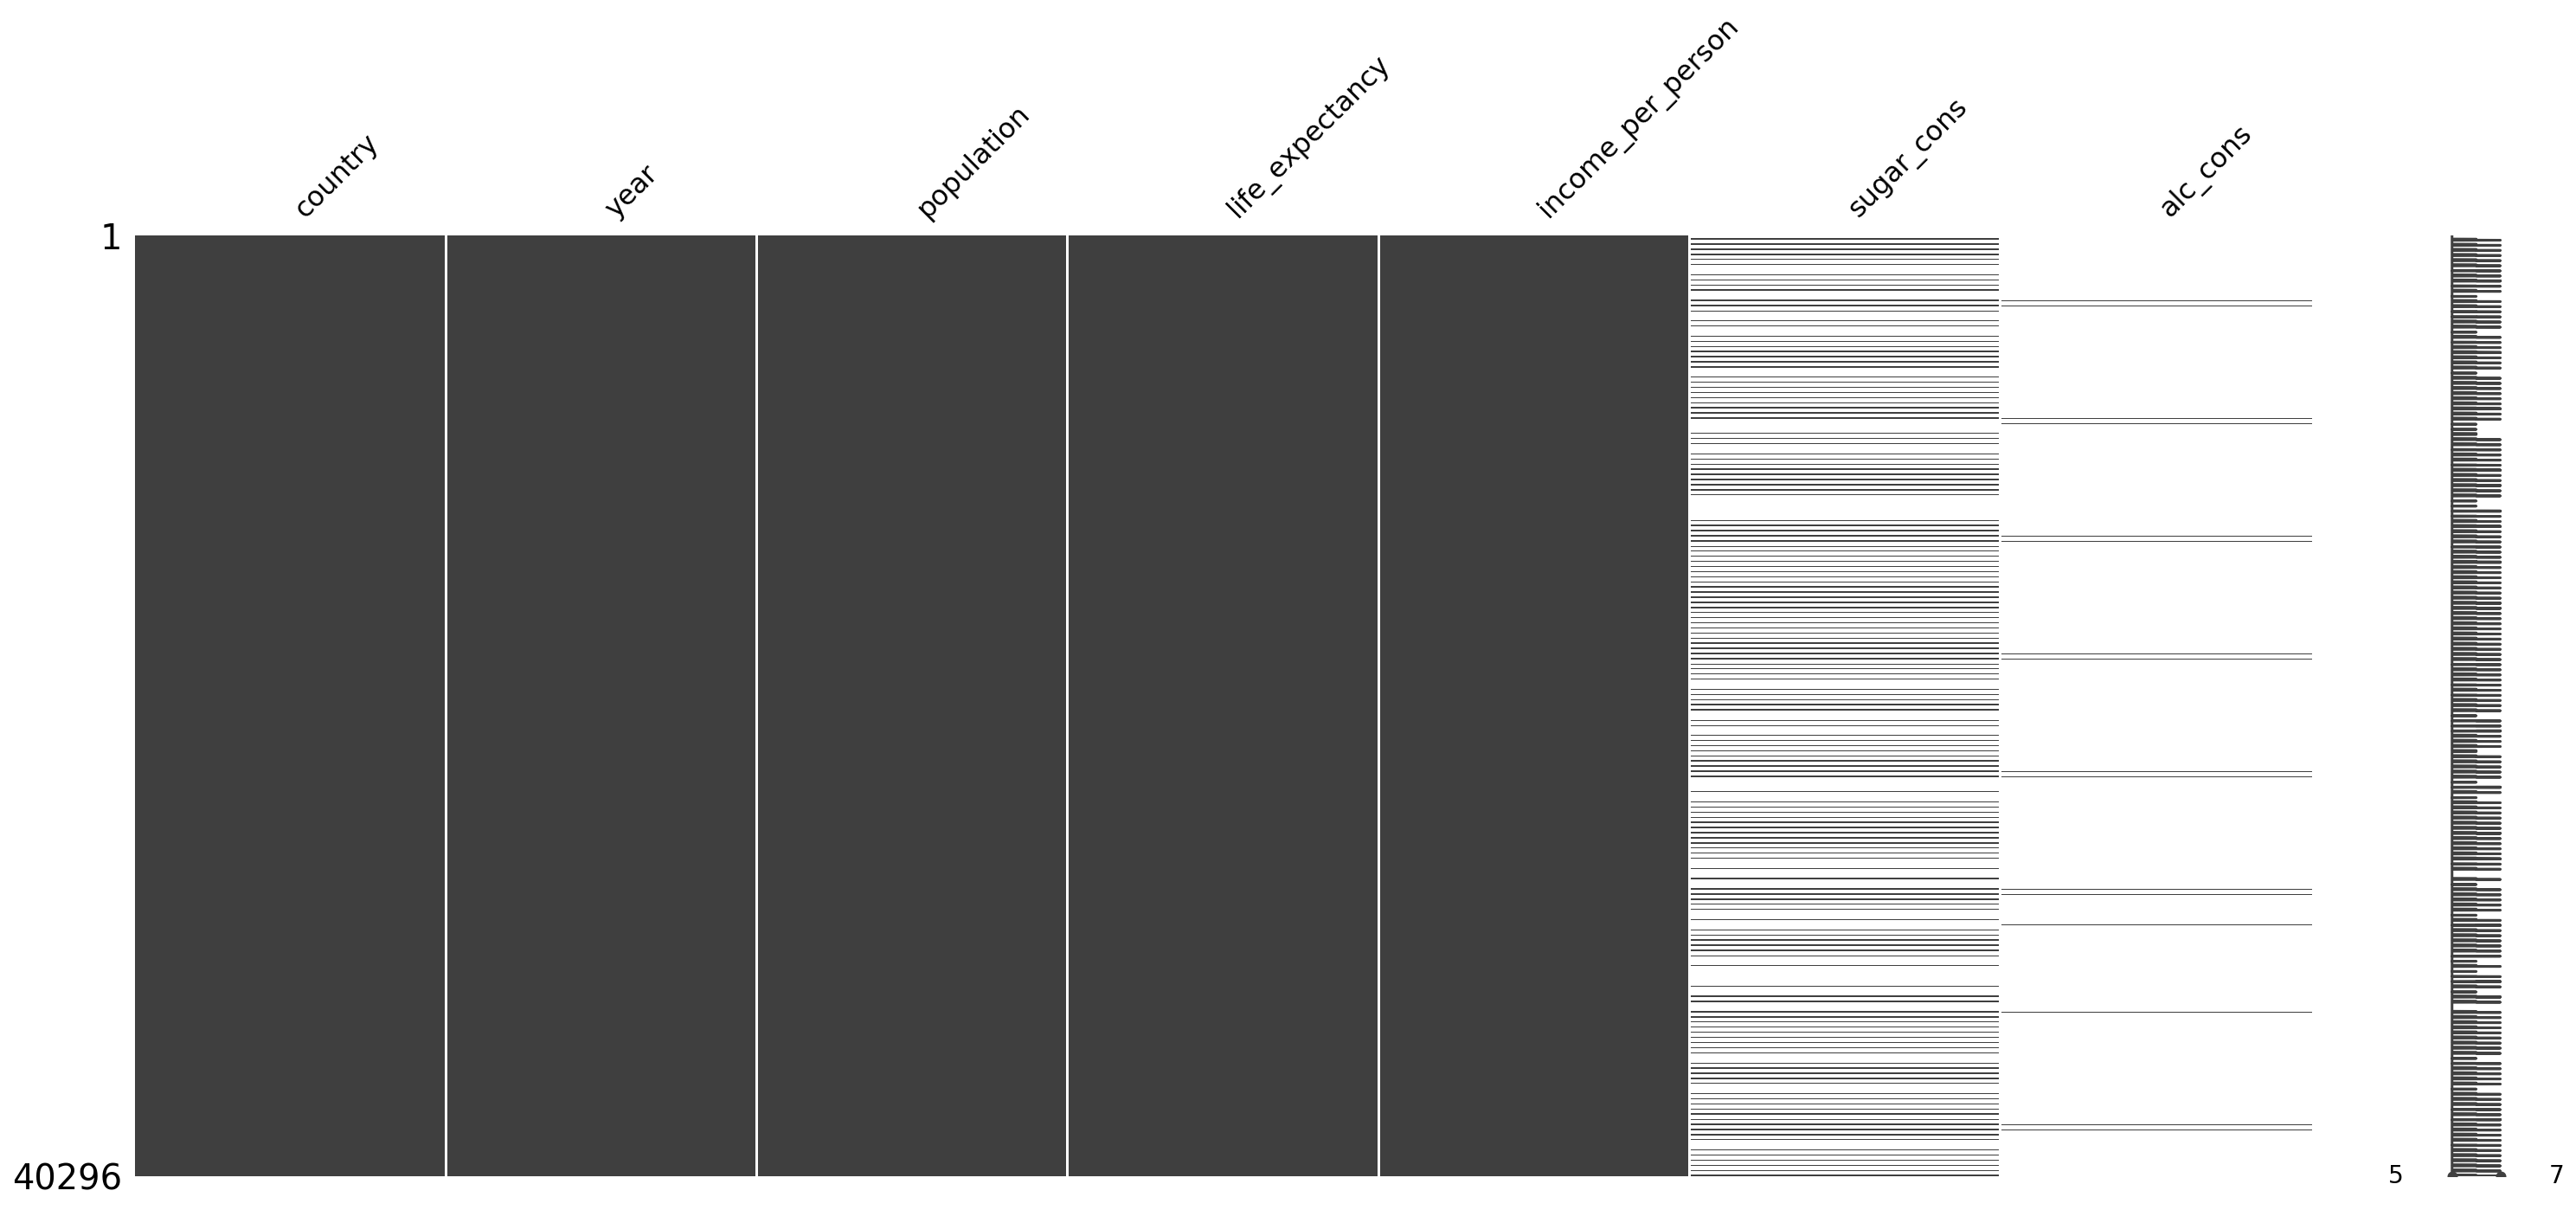

In [0]:
ms.matrix(df_all);

>Now the columns "year" and "income_per_person" will be transformed into the integer type. The sugar_cons cannot be transformed right now, because the column contains missing data. 

In [0]:
#transform column datatypes to int64
df_all.income_per_person = df_all.income_per_person.astype("int64")
df_all.year = df_all.year.astype("int64")

In [0]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40296 entries, 0 to 42704
Data columns (total 7 columns):
country              40296 non-null object
year                 40296 non-null int64
population           40296 non-null int64
life_expectancy      40296 non-null float64
income_per_person    40296 non-null int64
sugar_cons           7916 non-null float64
alc_cons             392 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 2.5+ MB


>Now separate dataframes for the population, the income, the sugar consumption and also the alcohol consumption will be created. They all share the columns "country", "year" and "population".

In [0]:
#create new dataframes as copies of the df_all dataframe

#create a filtered copy of the df_all dataframe and save it as *.csv without index
df_popul = df_all[["country", "year", "population"]].copy()
df_income = df_all[["country", "year", "population", "life_expectancy", "income_per_person"]].copy()
df_sugar_cons = df_all[["country", "year", "population", "life_expectancy", "sugar_cons"]].copy()
df_alc_cons = df_all[["country", "year", "population", "life_expectancy", "alc_cons"]].copy()

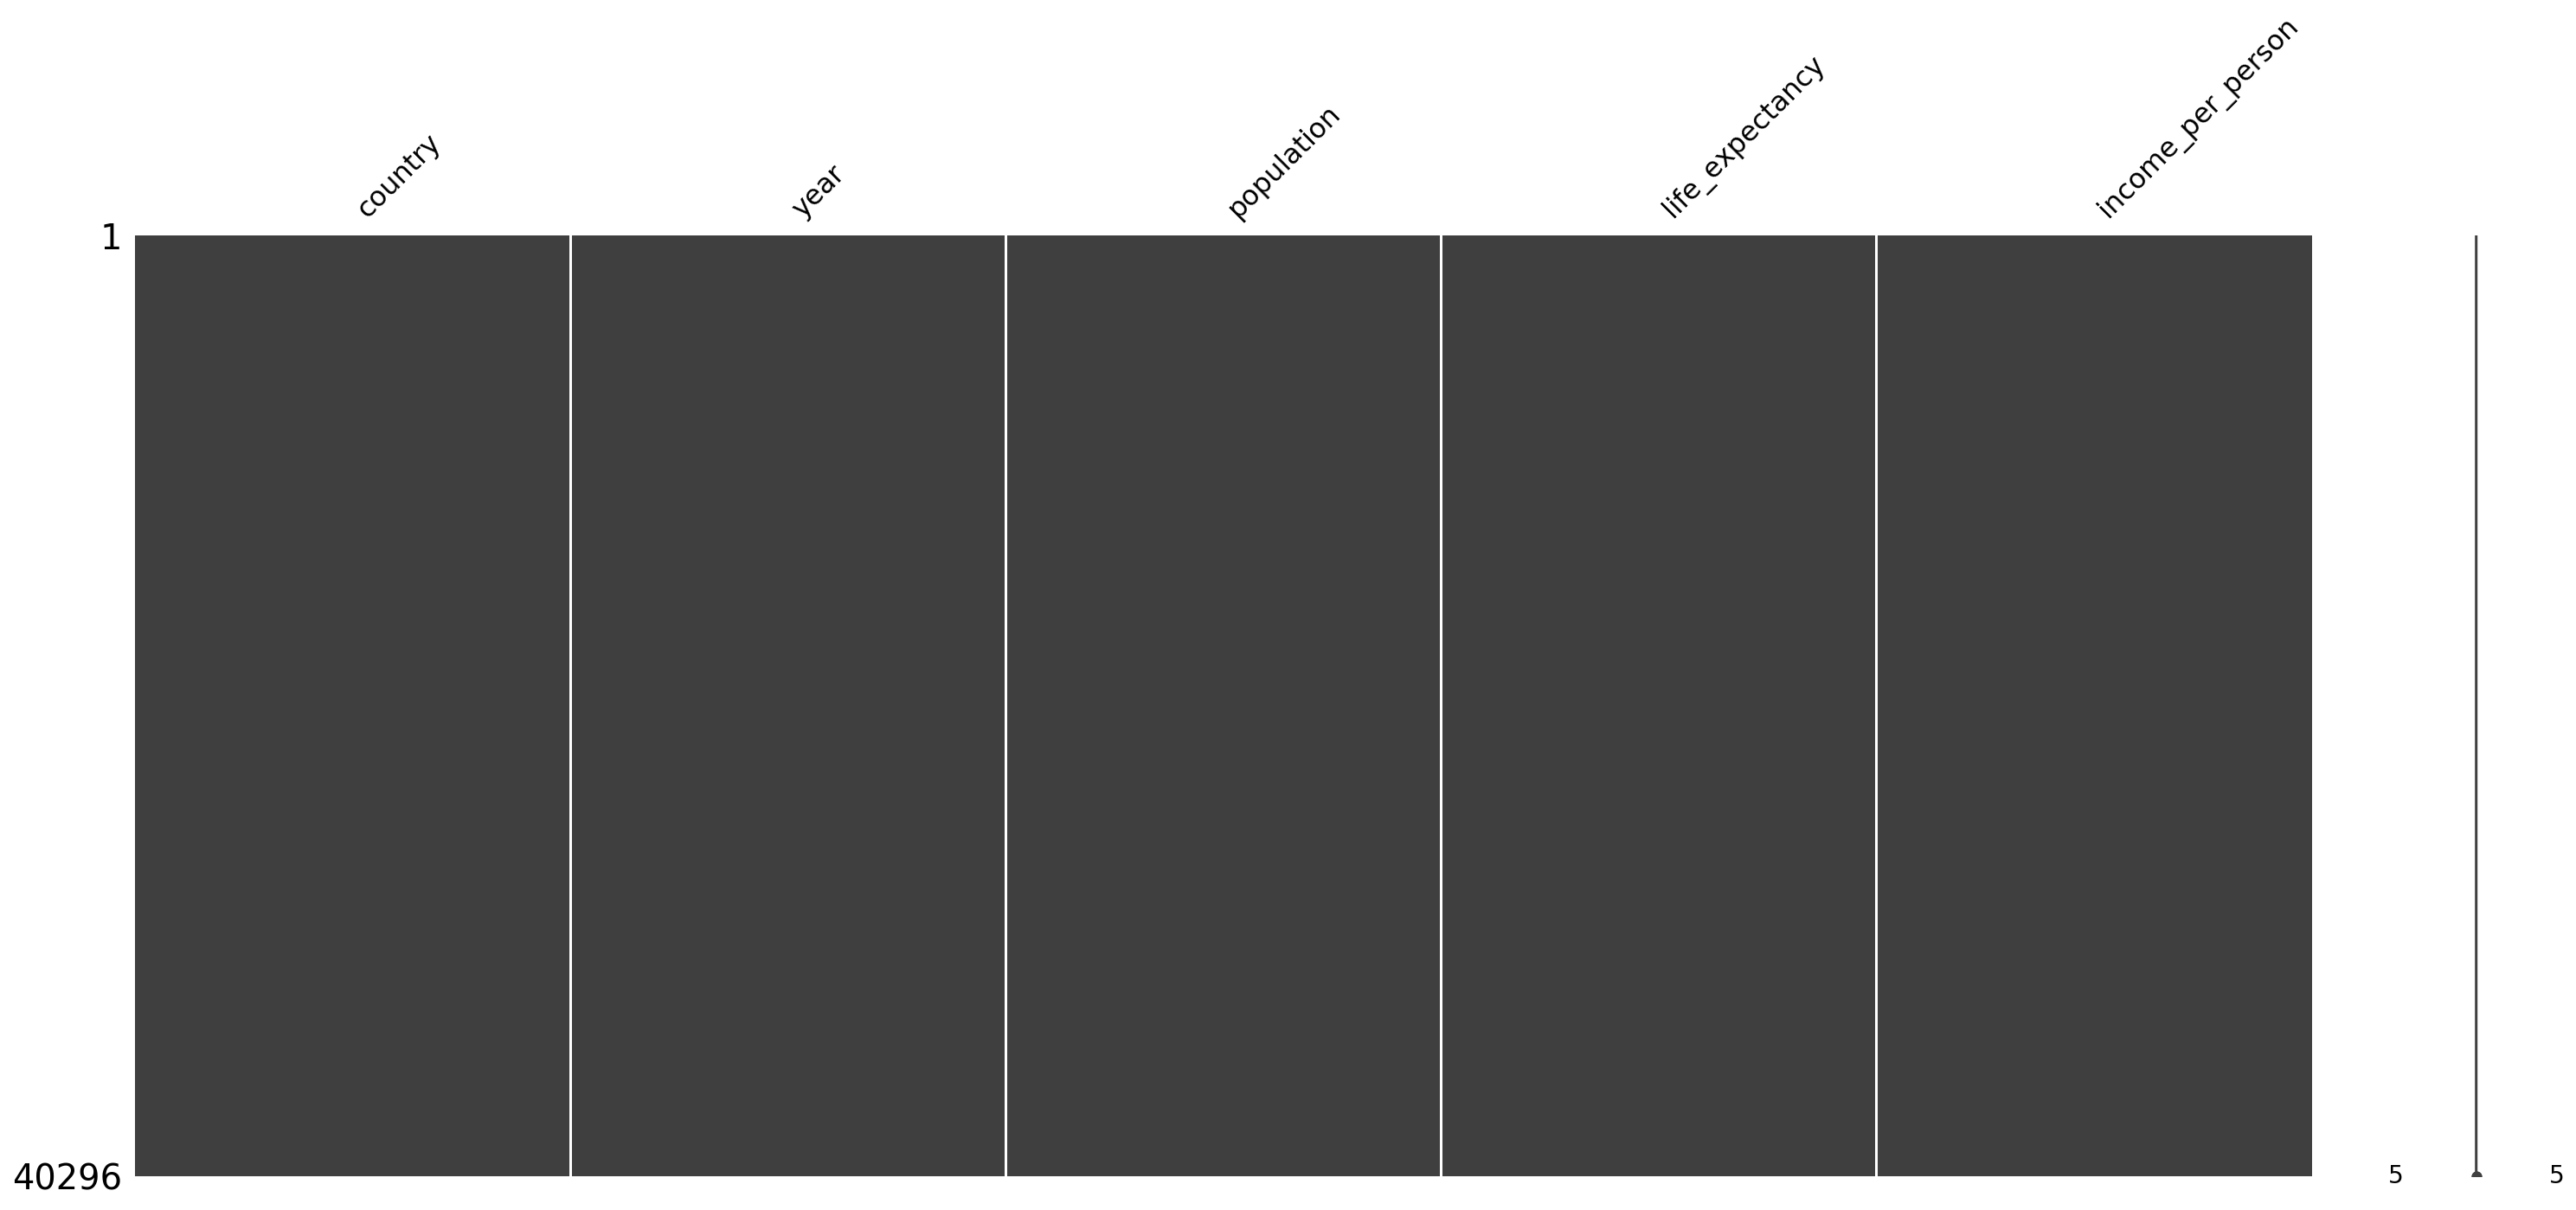

In [0]:
ms.matrix(df_income);

>This dataframe df_income is clear and is now ready to be saved and analyzed. Let's go on with the sugar consume dataframe.

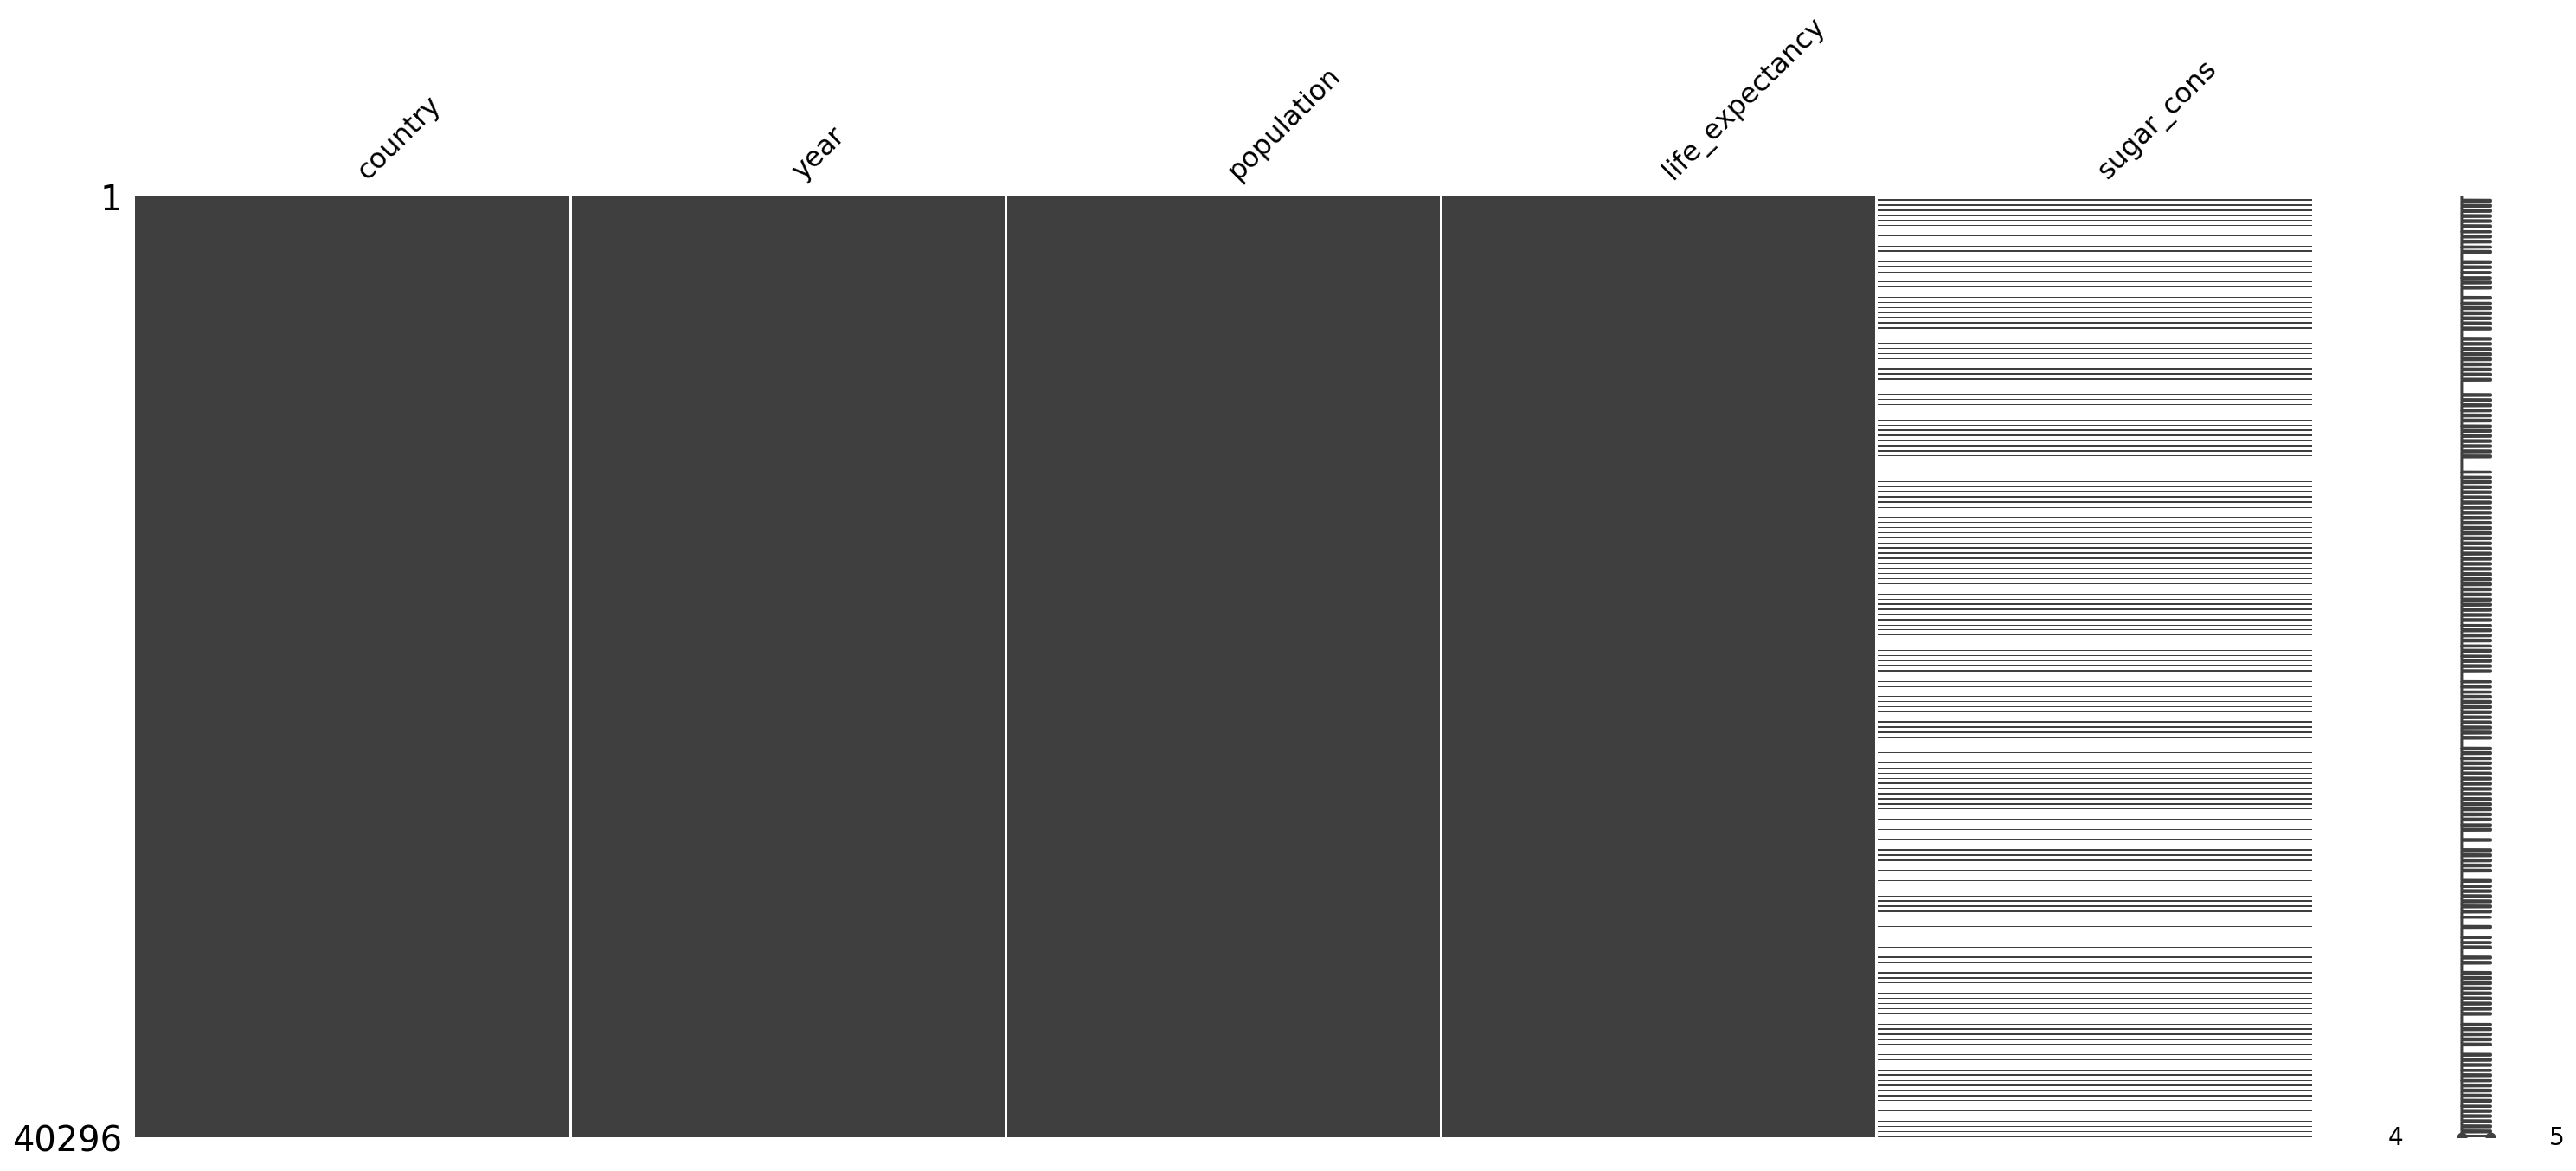

In [0]:
ms.matrix(df_sugar_cons);

>At first, countries, which were added to the dataset after 1991, will be dropped. 

In [0]:
#create a list of countries which had data in the year 1961
countries_1991 = list(df_sugar_cons[df_sugar_cons["year"] == 1991].dropna(subset = ["sugar_cons"]).country.unique())

In [0]:
#drop all the countries which had no data in 1961

#https://stackoverflow.com/questions/19960077/how-to-implement-in-and-not-in-for-pandas-dataframe
df_sugar_cons = df_sugar_cons.drop(df_sugar_cons[~df_sugar_cons["country"].isin(countries_1991)].index)  

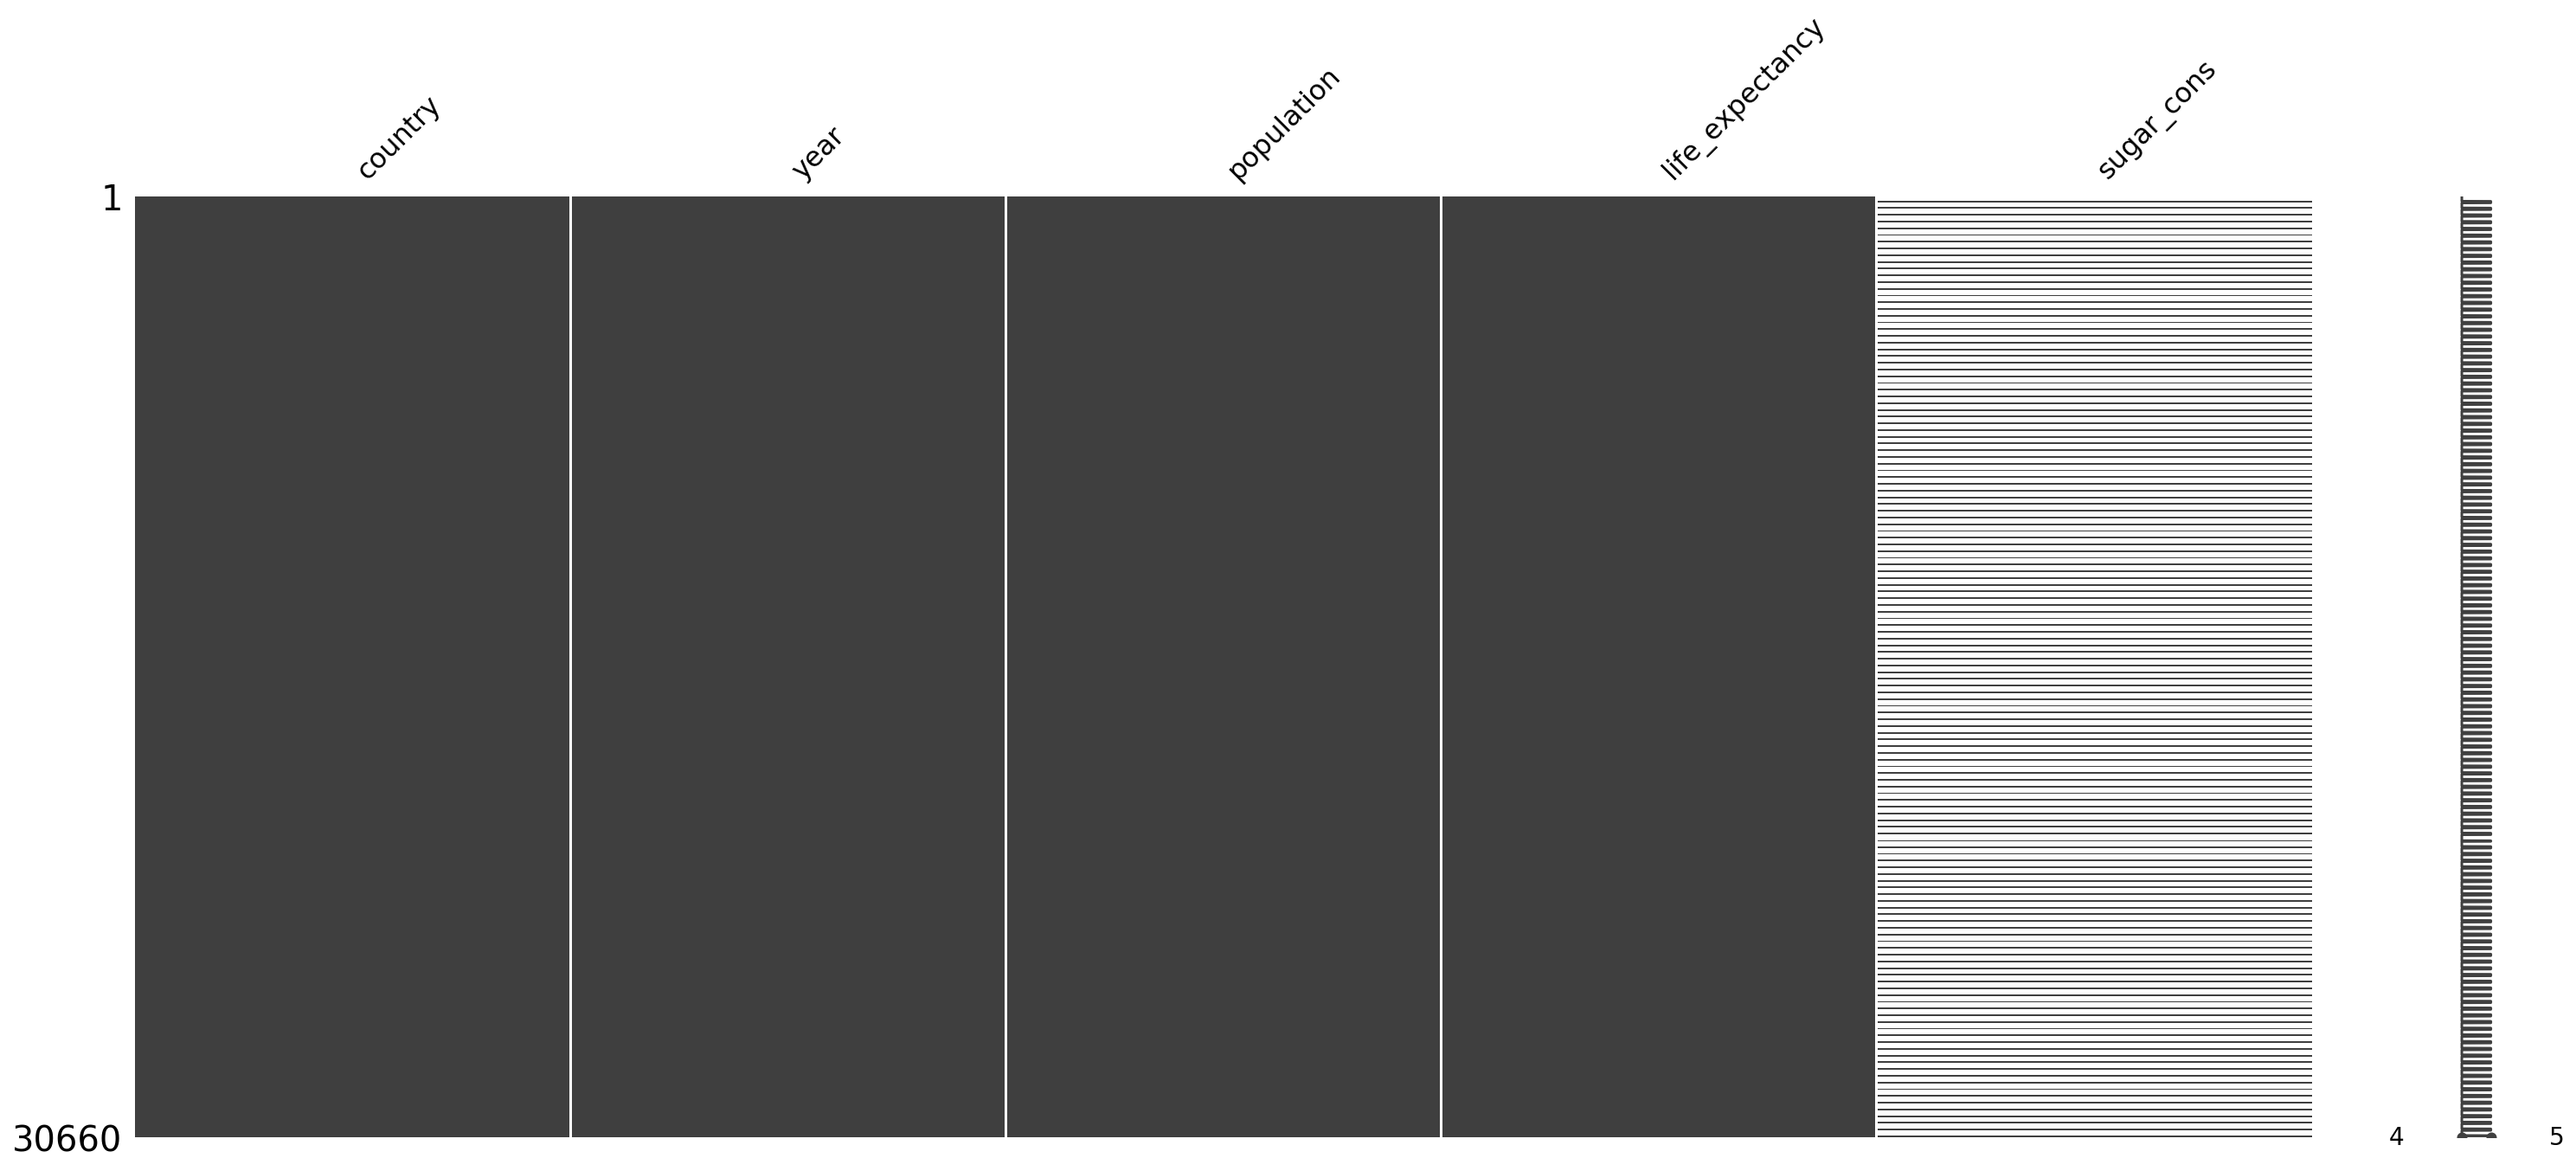

In [0]:
ms.matrix(df_sugar_cons);

>There is still some data missing after the last step. To go on, the dataframe will be cut from 1961 - 2013.

In [0]:
#limit the dataframe to the years 1961 - 2013
df_sugar_cons = df_sugar_cons[(df_sugar_cons.year >= 1961) & (df_sugar_cons.year < 2014)]

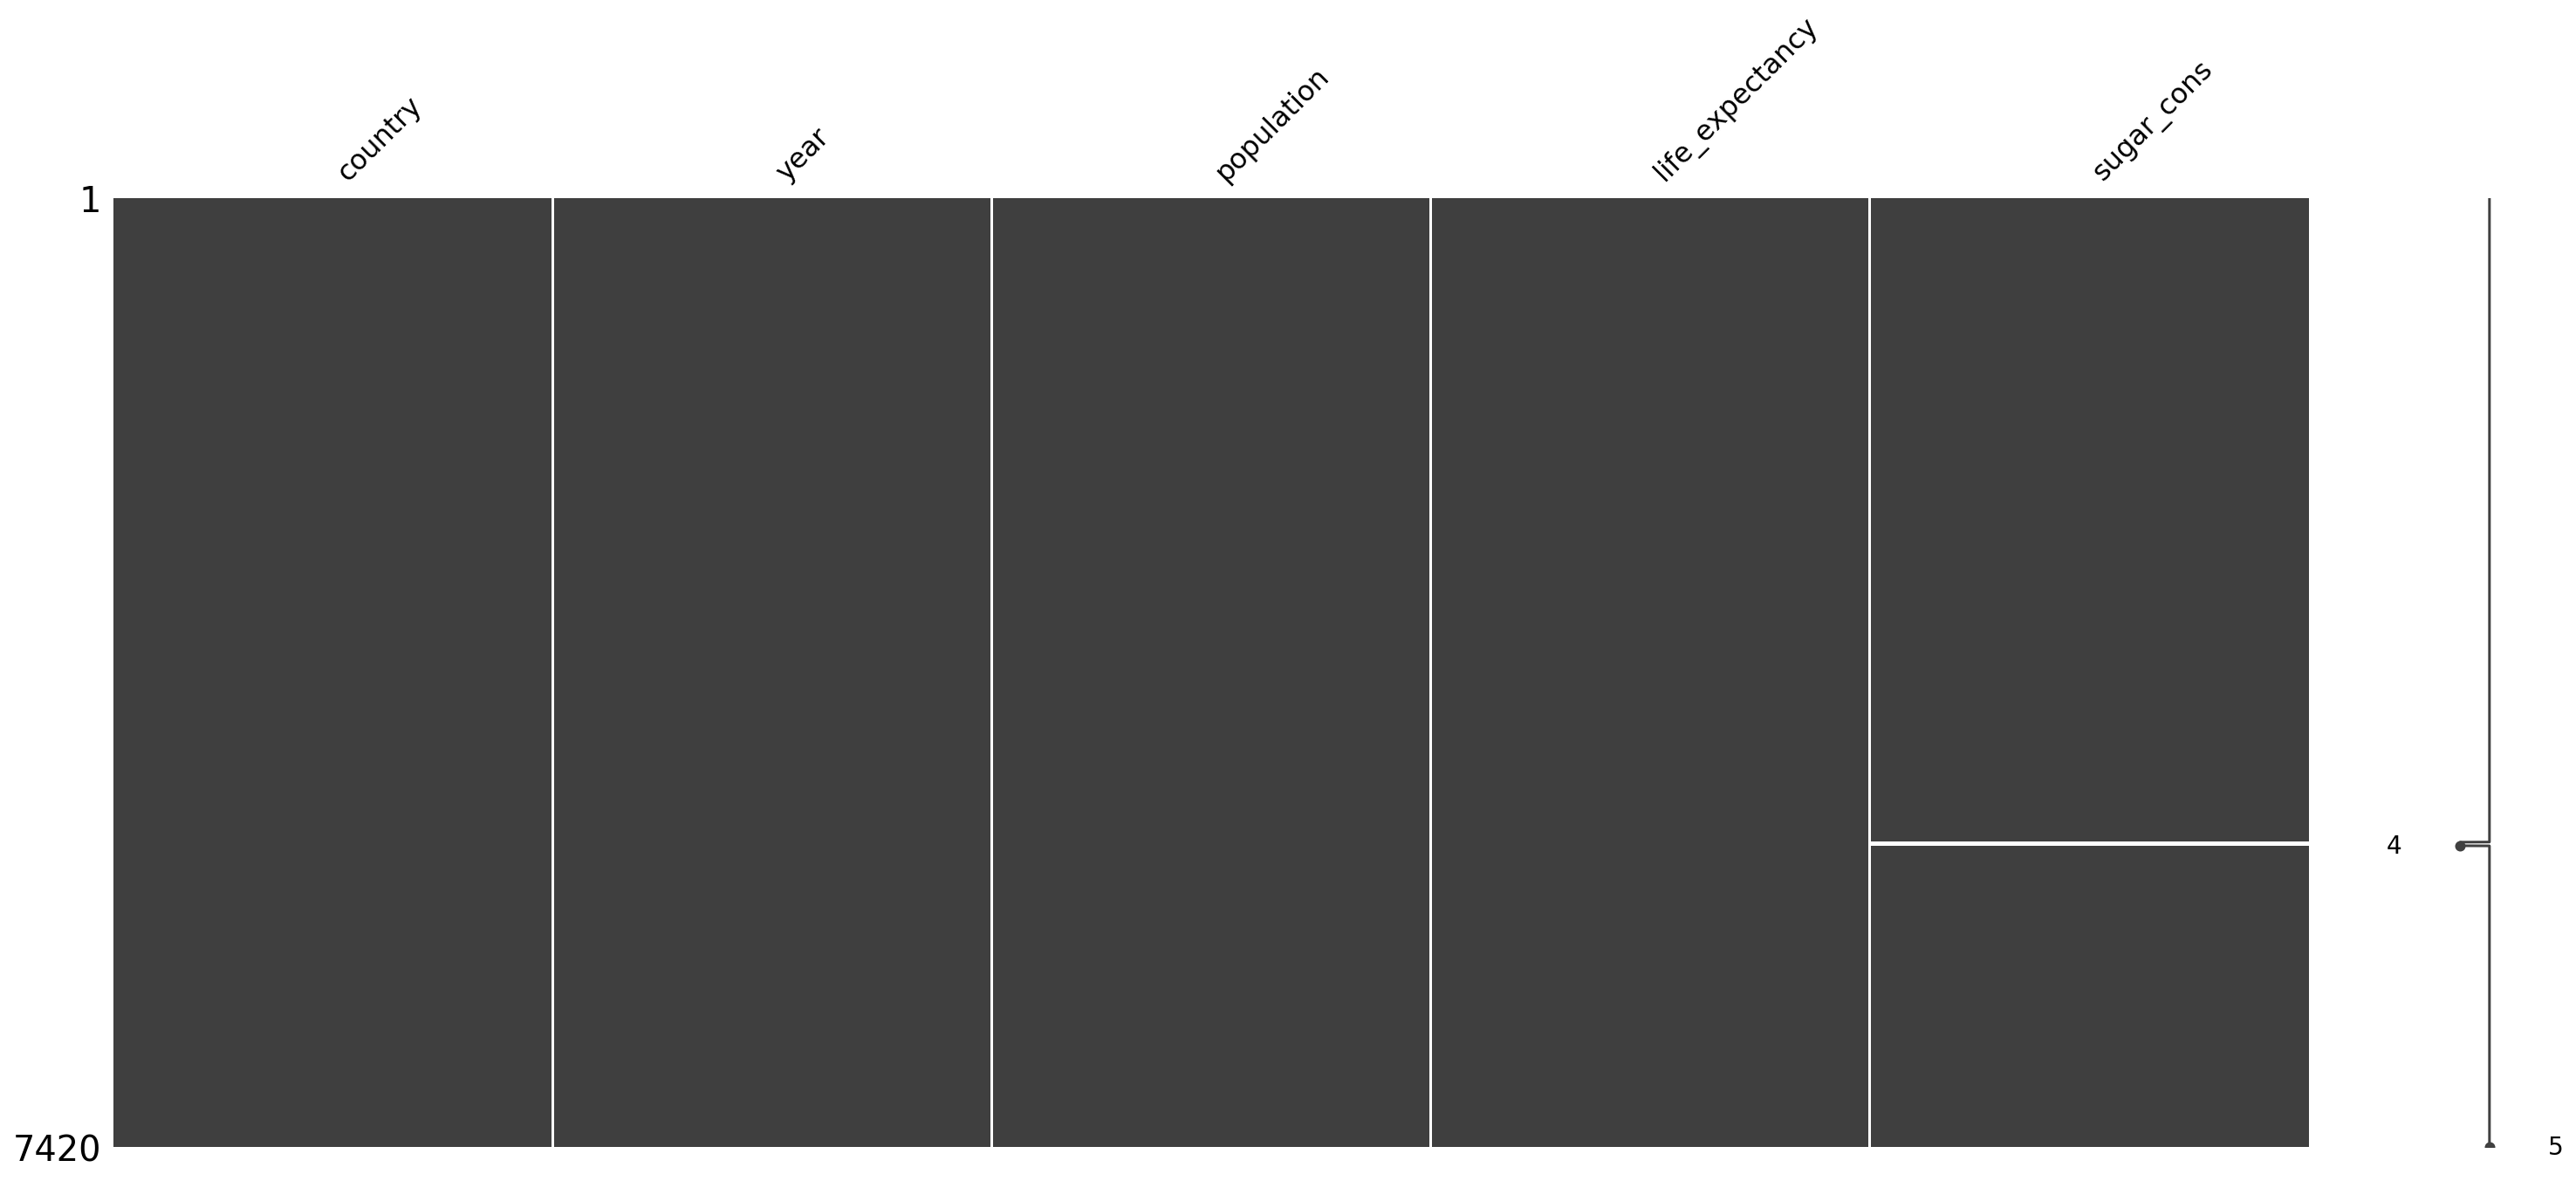

In [0]:
ms.matrix(df_sugar_cons);

>Now this data is also clean and can be saved and analyzed. For the next cleaning steps we will take a look on the alcohol consume dataframe.

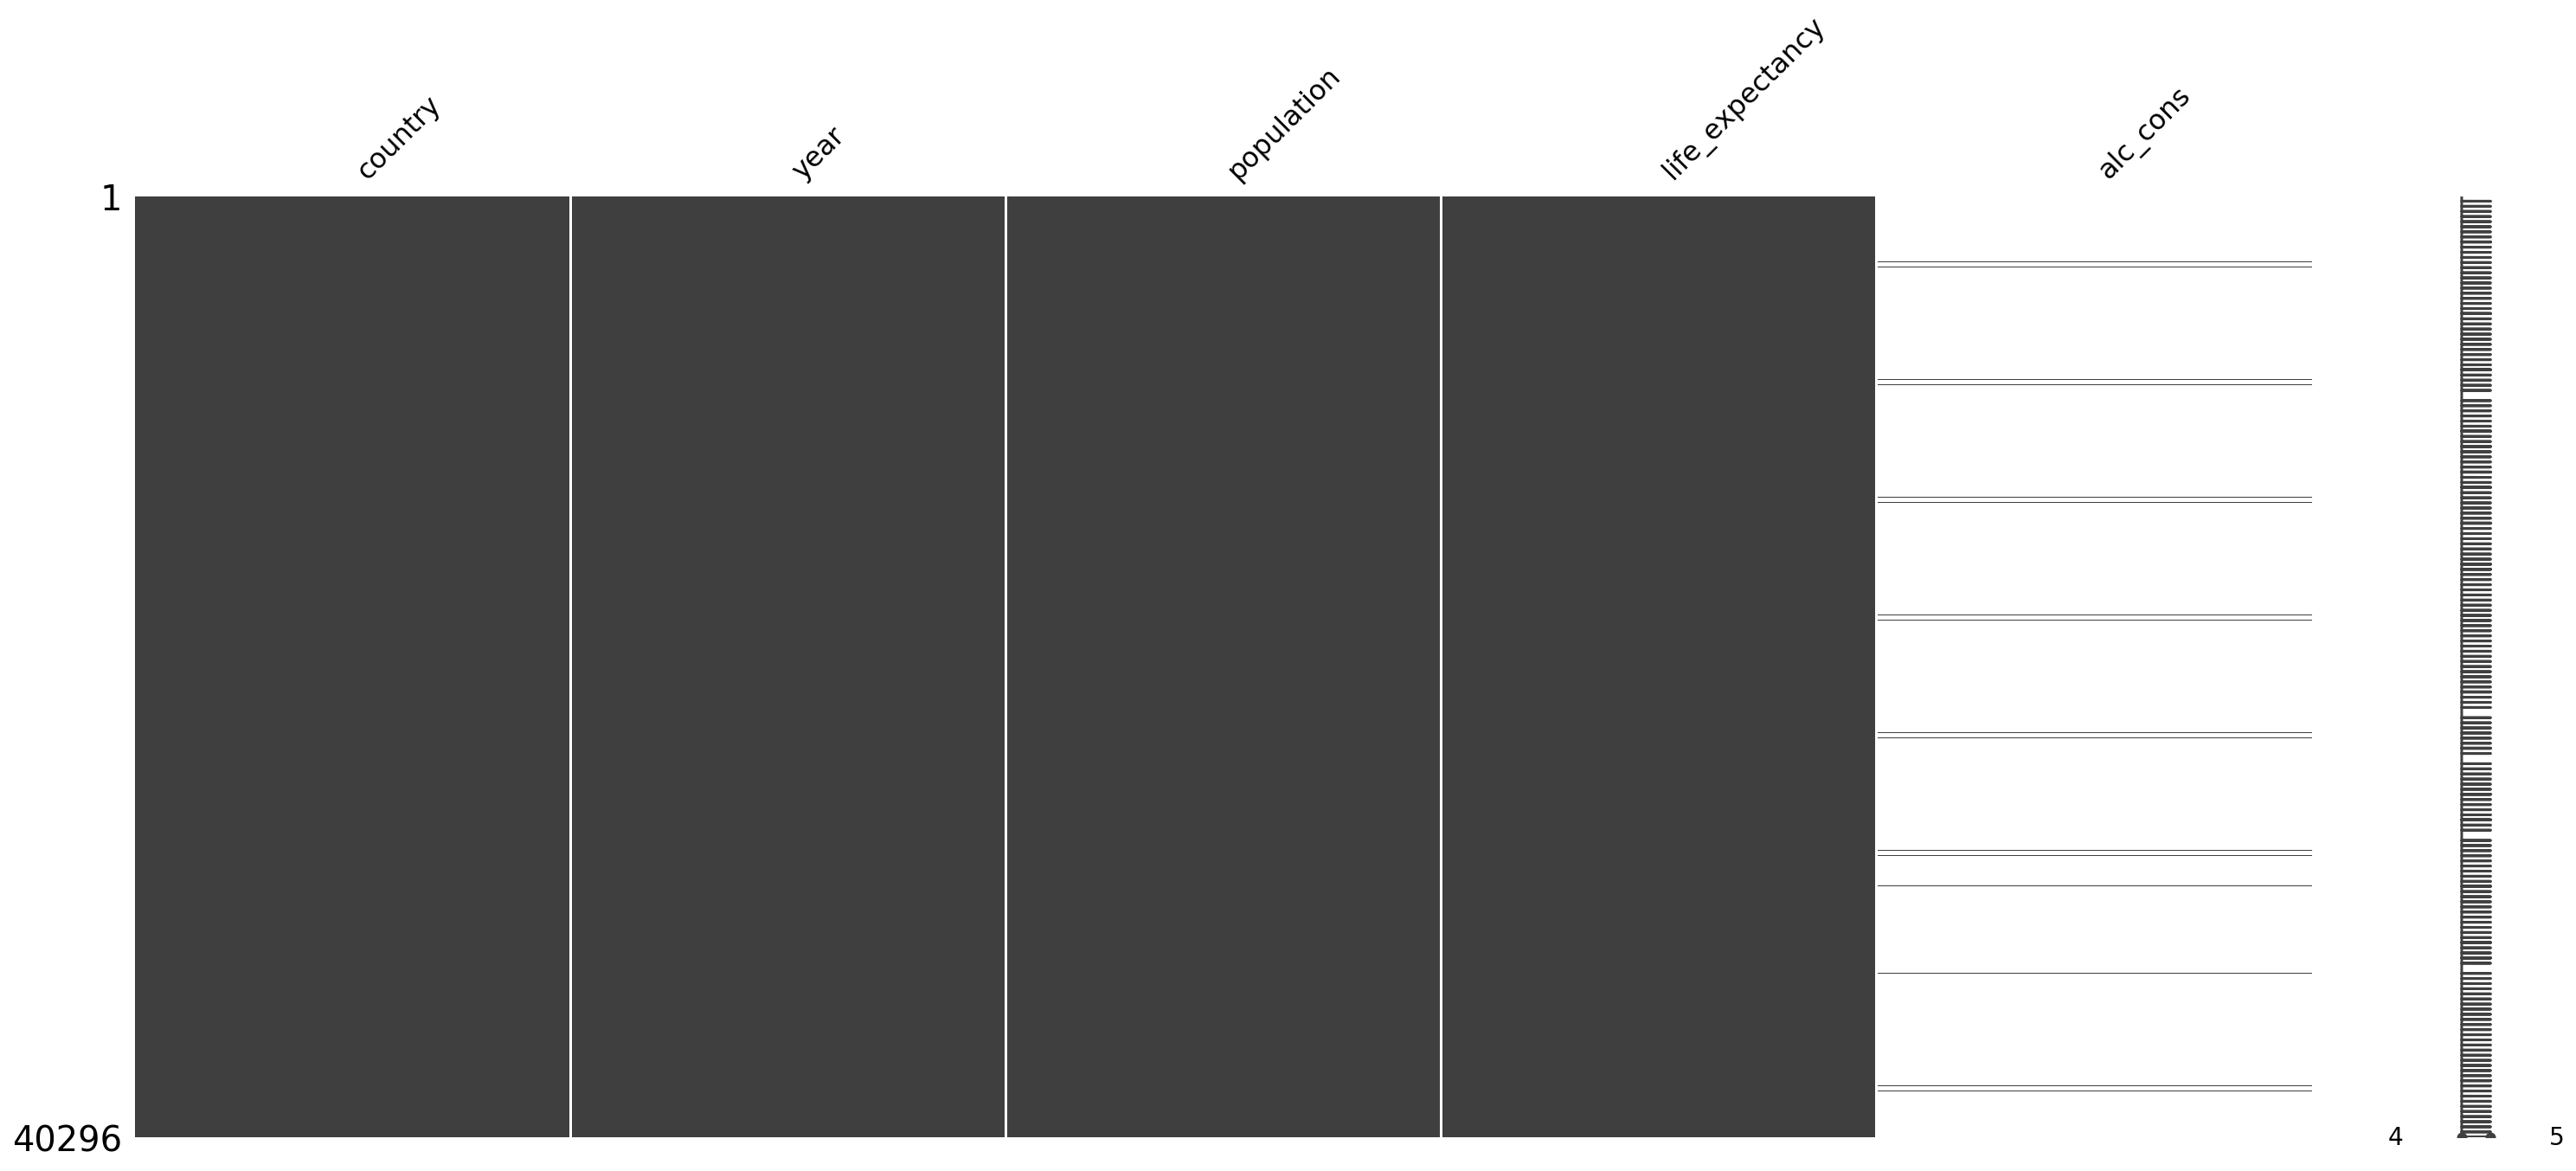

In [0]:
ms.matrix(df_alc_cons);

In [0]:
df_alc_cons.head()

country  year  population  life_expectancy  alc_cons
0  Afghanistan  1800     3280000             28.2       NaN
1  Afghanistan  1801     3280000             28.2       NaN
2  Afghanistan  1802     3280000             28.2       NaN
3  Afghanistan  1803     3280000             28.2       NaN
4  Afghanistan  1804     3280000             28.2       NaN

> The next step is to create a new dataframe which only contains the data for the years 2005 and 2008.

In [0]:
df_alc_cons = df_alc_cons[(df_alc_cons.year == 2005 )| (df_alc_cons.year == 2008)]

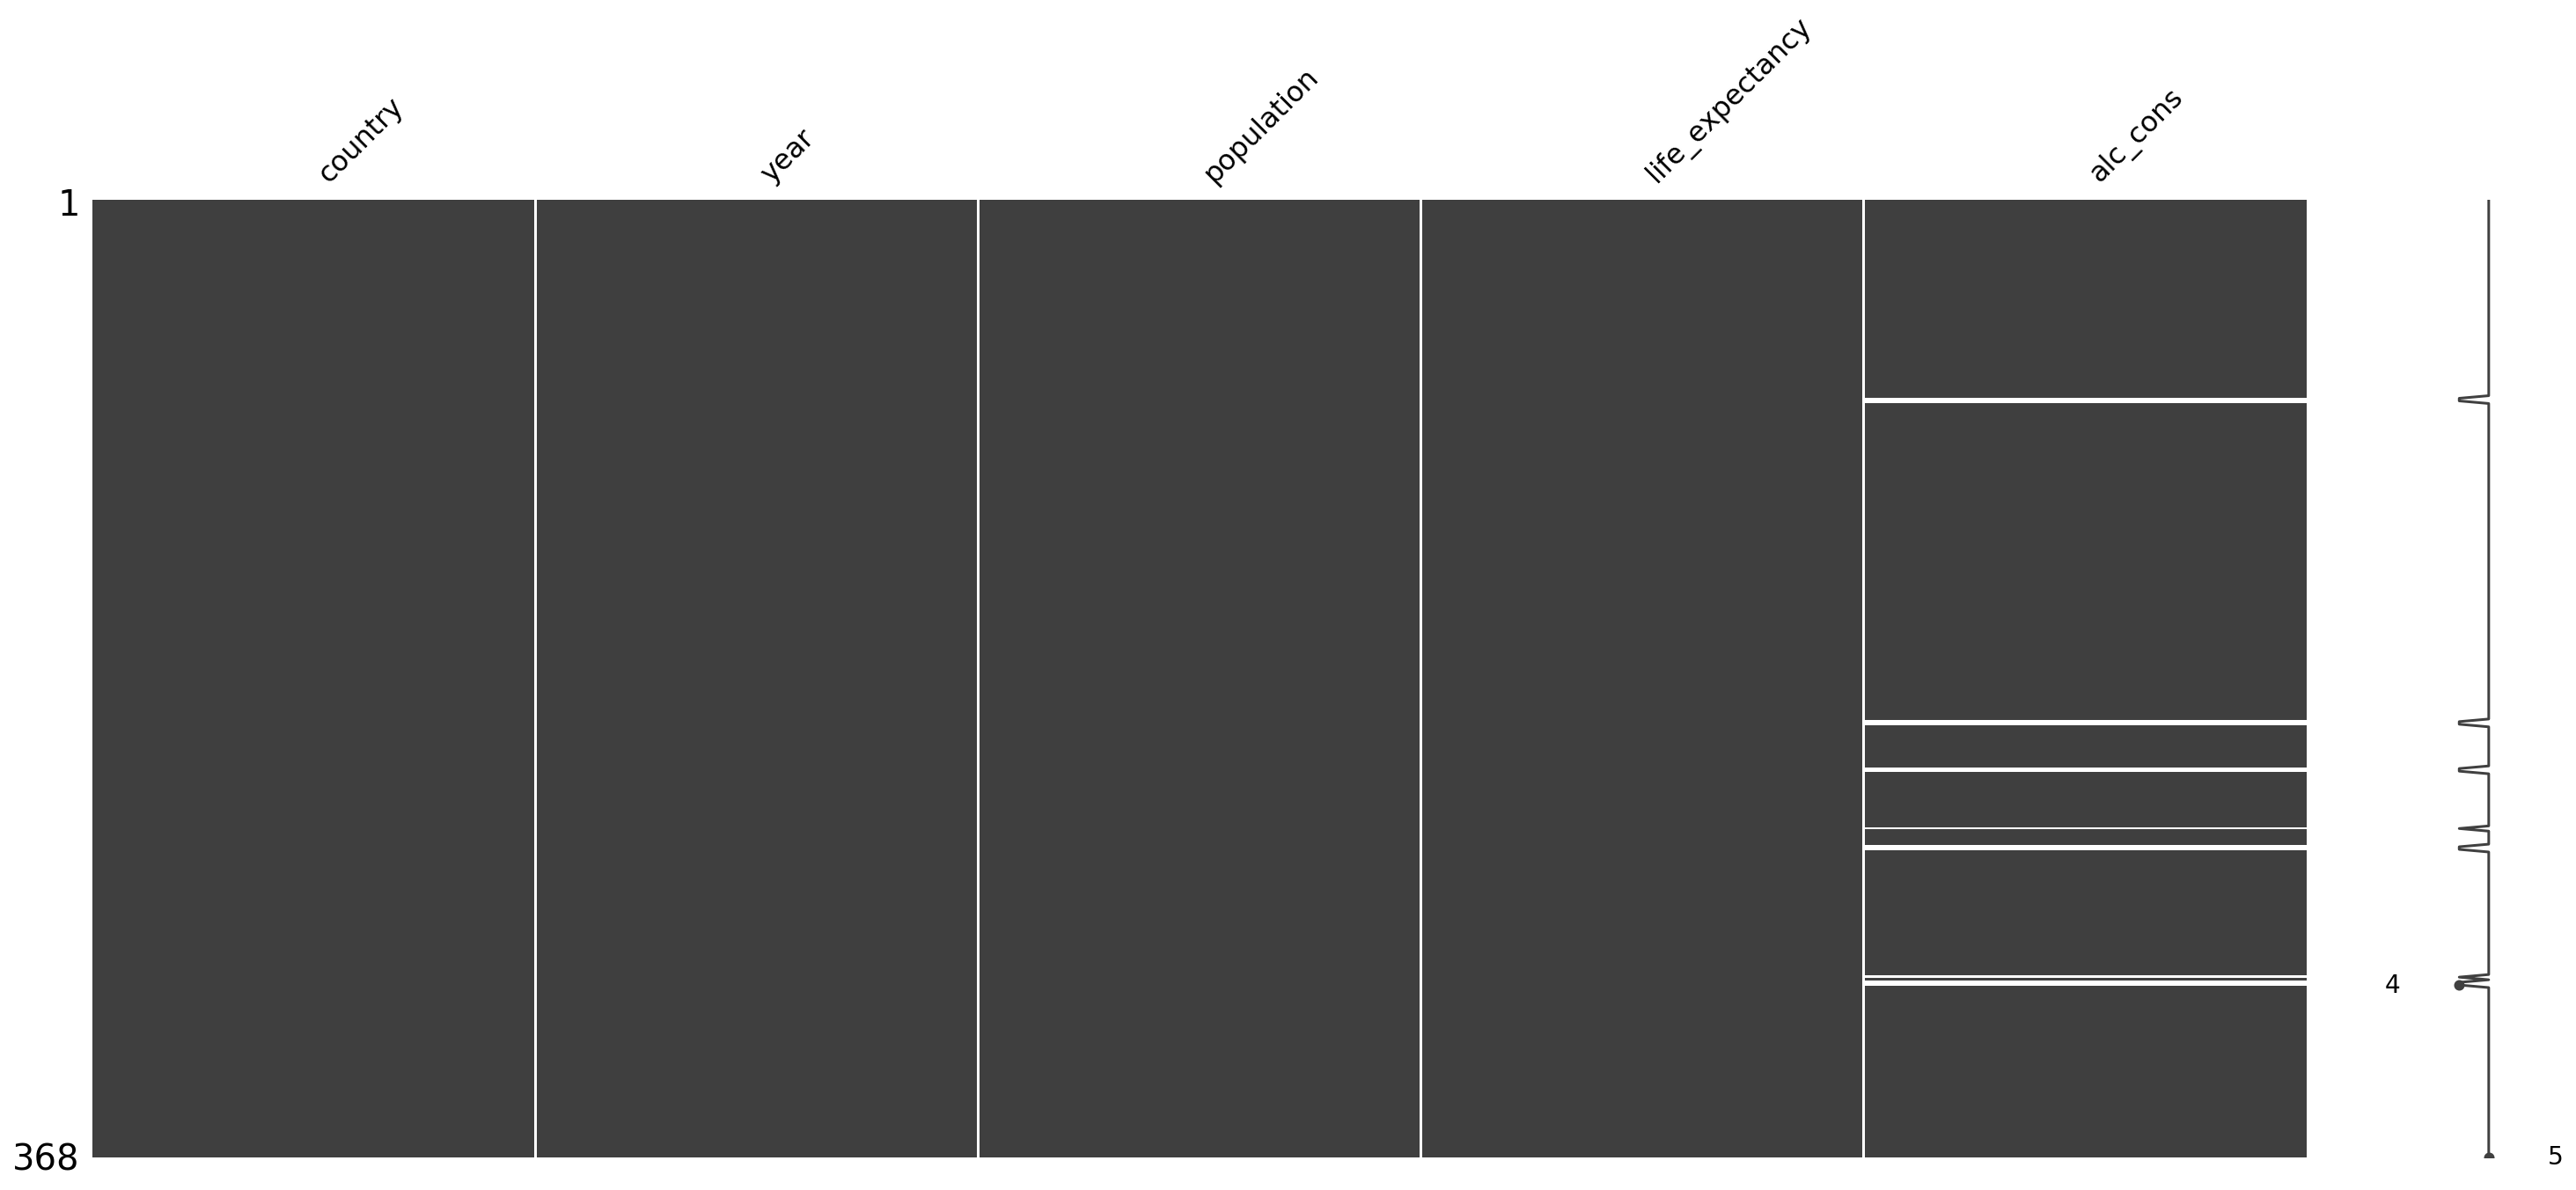

In [0]:
ms.matrix(df_alc_cons);

>Now there is still some data missing, therefore the countries with missing data will be dropped. 

In [0]:
show_missing_countries(df_alc_cons, "alc_cons")

['Congo, Rep.', 'Maldives', 'Montenegro', 'Palestine', 'South Sudan']

In [0]:
missing_val = show_n_missing(df_alc_cons, "alc_cons");
df_alc_cons = df_alc_cons.drop(df_alc_cons[df_alc_cons["country"].isin(missing_val)].index)   

Congo, Rep. - 2
Maldives - 2
Montenegro - 2
North Korea - 1
Palestine - 2
South Korea - 1
South Sudan - 2


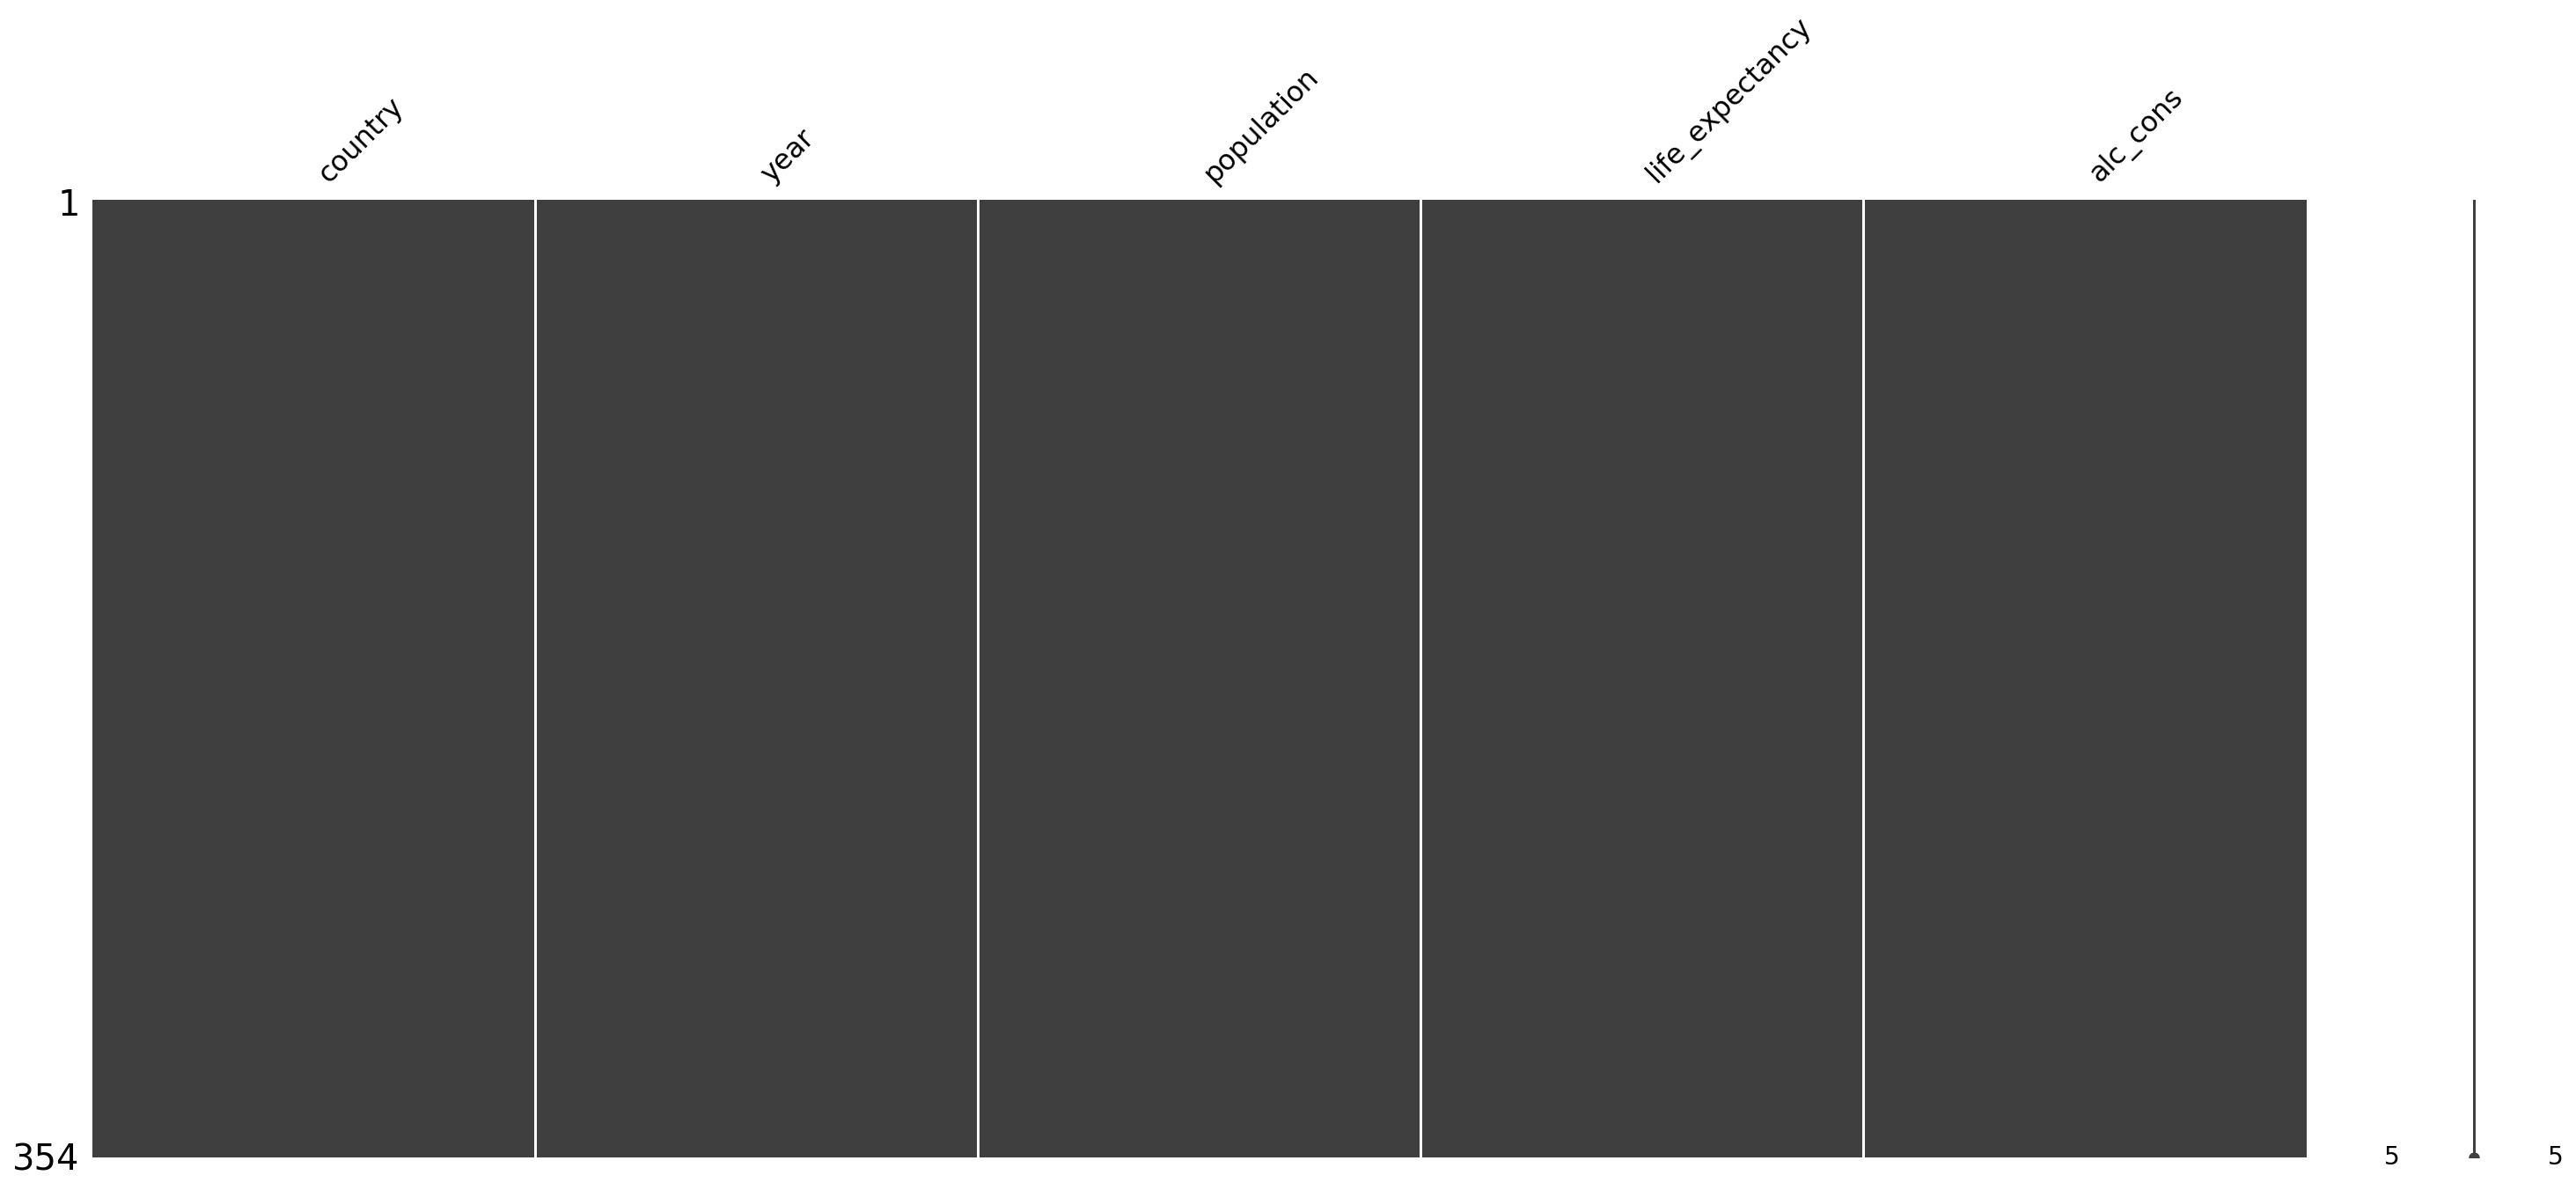

In [0]:
ms.matrix(df_alc_cons);

> All newly created dataframes are clean, can be saved and analyzed.

In [0]:
#save the cleaned data into *.csv files
df_popul.to_csv("df_popul.csv", index = False)
df_income.to_csv("income_clean.csv", index = False)
df_sugar_cons.to_csv("sugar_cons_clean.csv", index = False)
df_alc_cons.to_csv("alc_cons_clean.csv", index = False)

> Let's go on with the male/female dataframe.

In [0]:
df_male_fem.head()

country  year  life_expectancy_fem  life_expectancy_male  \
0  Afghanistan  1950                 28.4                  26.9   
1  Afghanistan  1951                 28.6                  27.1   
2  Afghanistan  1952                 29.2                  27.7   
3  Afghanistan  1953                 29.7                  28.2   
4  Afghanistan  1954                 30.2                  28.7   

   blood_pres_fem  blood_pres_male  bmi_fem  bmi_male  chol_fat_blood_fem  \
0             NaN              NaN      NaN       NaN                 NaN   
1             NaN              NaN      NaN       NaN                 NaN   
2             NaN              NaN      NaN       NaN                 NaN   
3             NaN              NaN      NaN       NaN                 NaN   
4             NaN              NaN      NaN       NaN                 NaN   

   chol_fat_blood_male  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

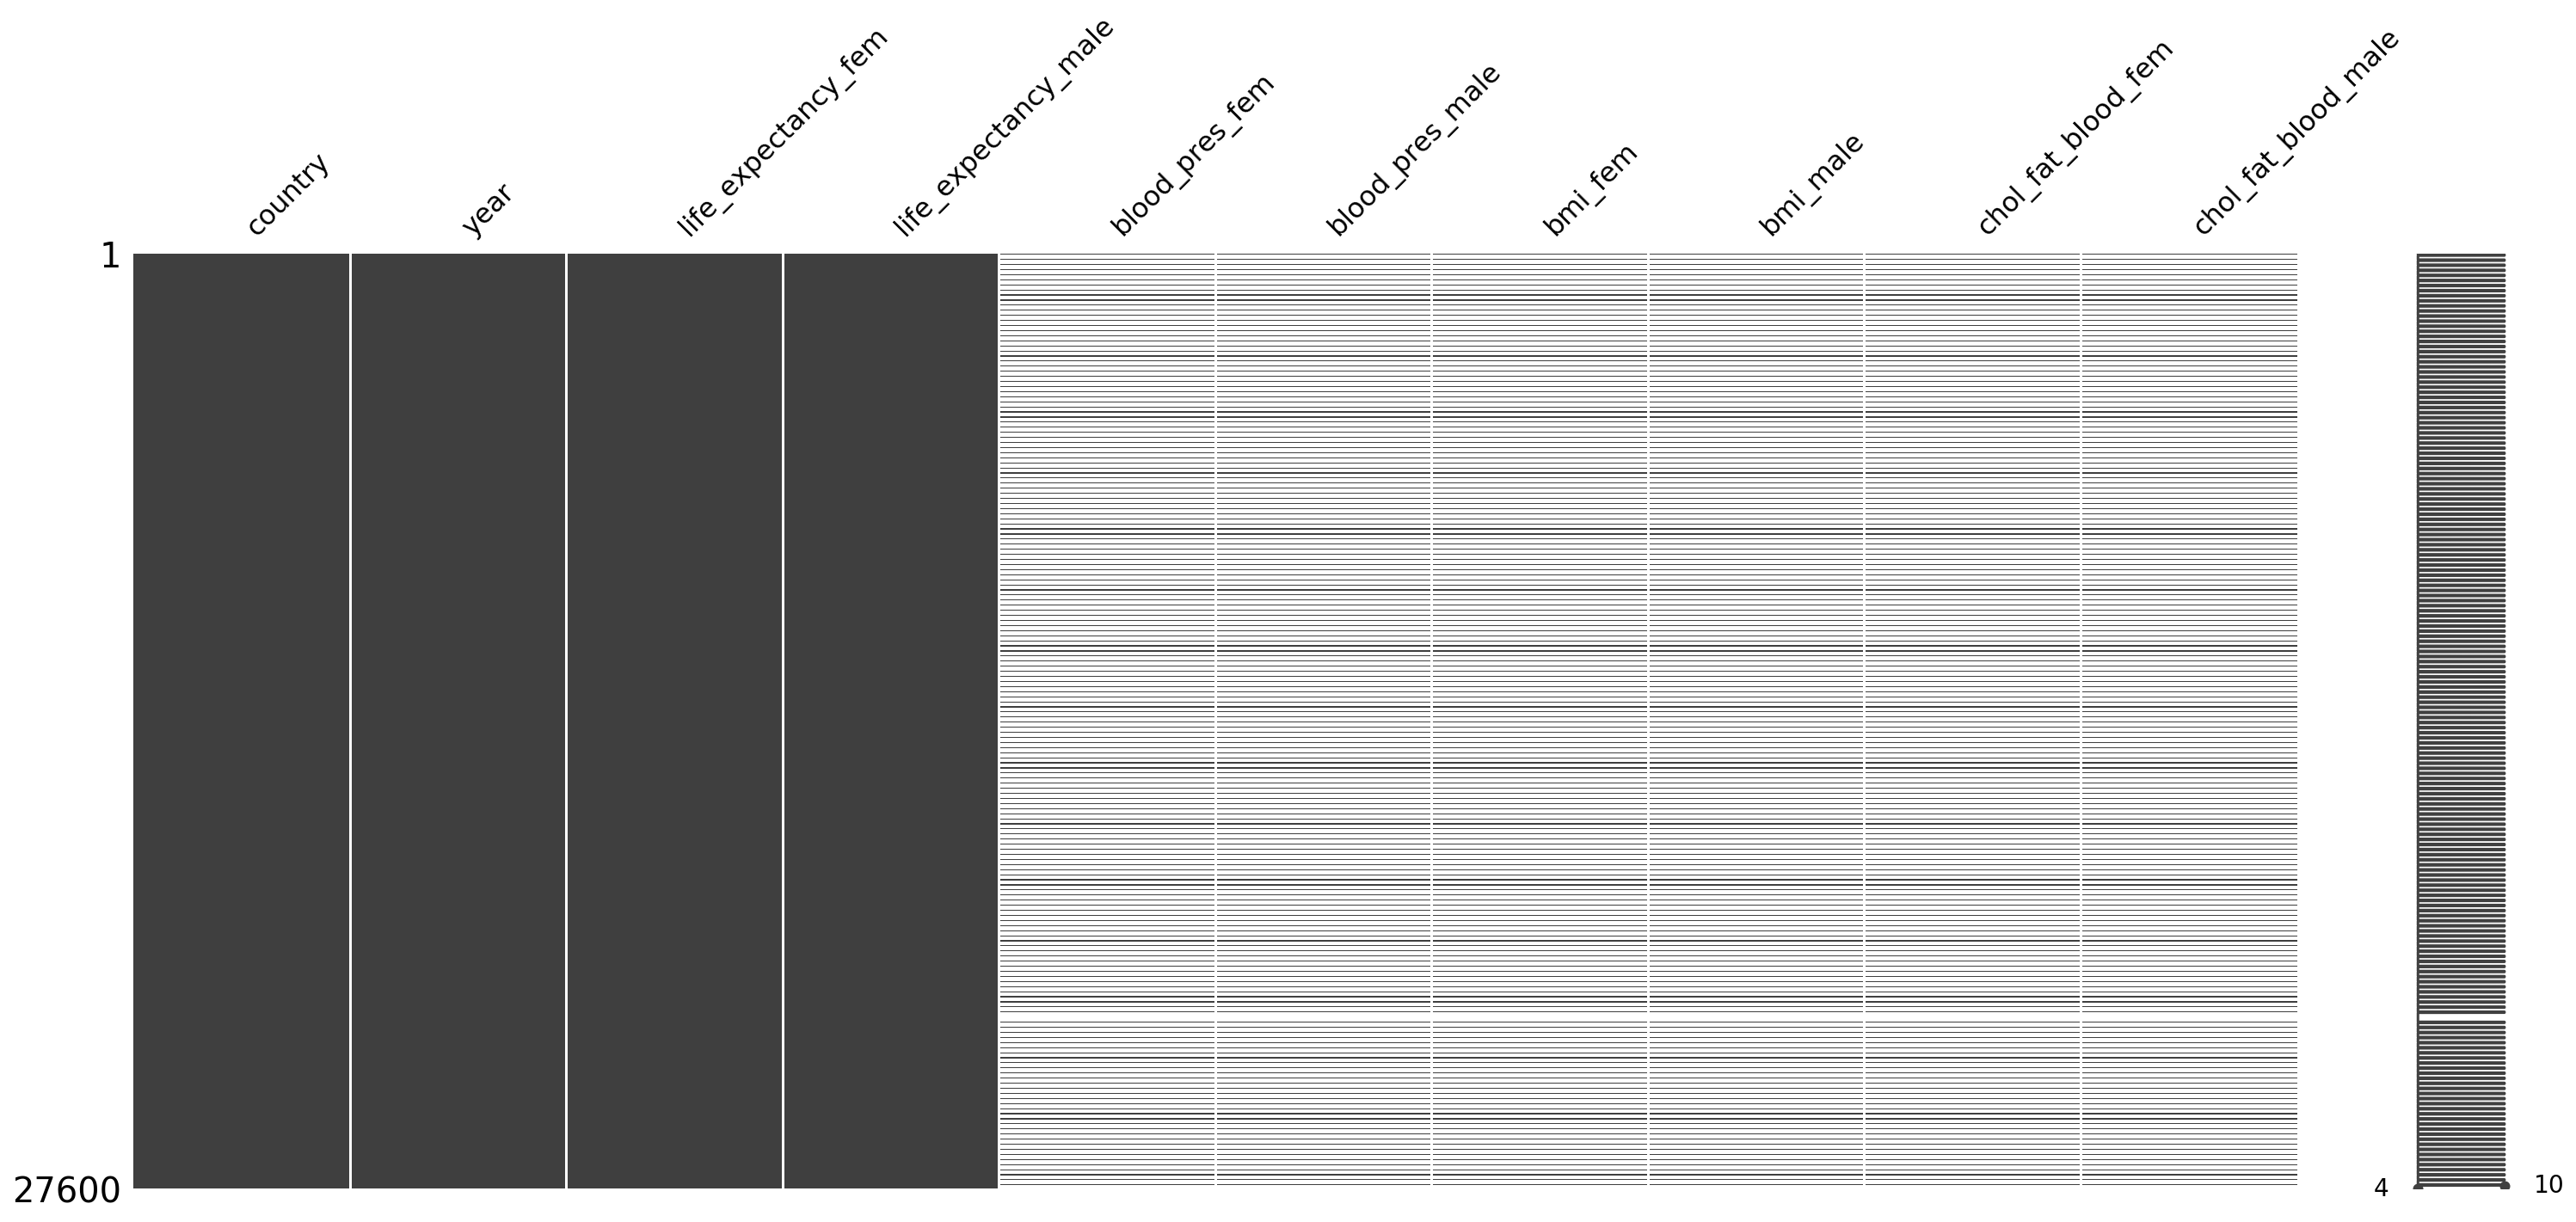

In [0]:
ms.matrix(df_male_fem);

In [0]:
df_male_fem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27600 entries, 0 to 27599
Data columns (total 10 columns):
country                 27600 non-null object
year                    27600 non-null object
life_expectancy_fem     27600 non-null float64
life_expectancy_male    27600 non-null float64
blood_pres_fem          5307 non-null float64
blood_pres_male         5307 non-null float64
bmi_fem                 5307 non-null float64
bmi_male                5307 non-null float64
chol_fat_blood_fem      5307 non-null float64
chol_fat_blood_male     5307 non-null float64
dtypes: float64(8), object(2)
memory usage: 2.3+ MB


>The year column will be transformed into integer and the dataframe will be cutted to the years 1980 - 2008.

In [0]:
df_male_fem.year = df_male_fem.year.astype("int64")

In [0]:
df_male_fem = df_male_fem[(df_male_fem.year > 1979) & (df_male_fem.year < 2009)]

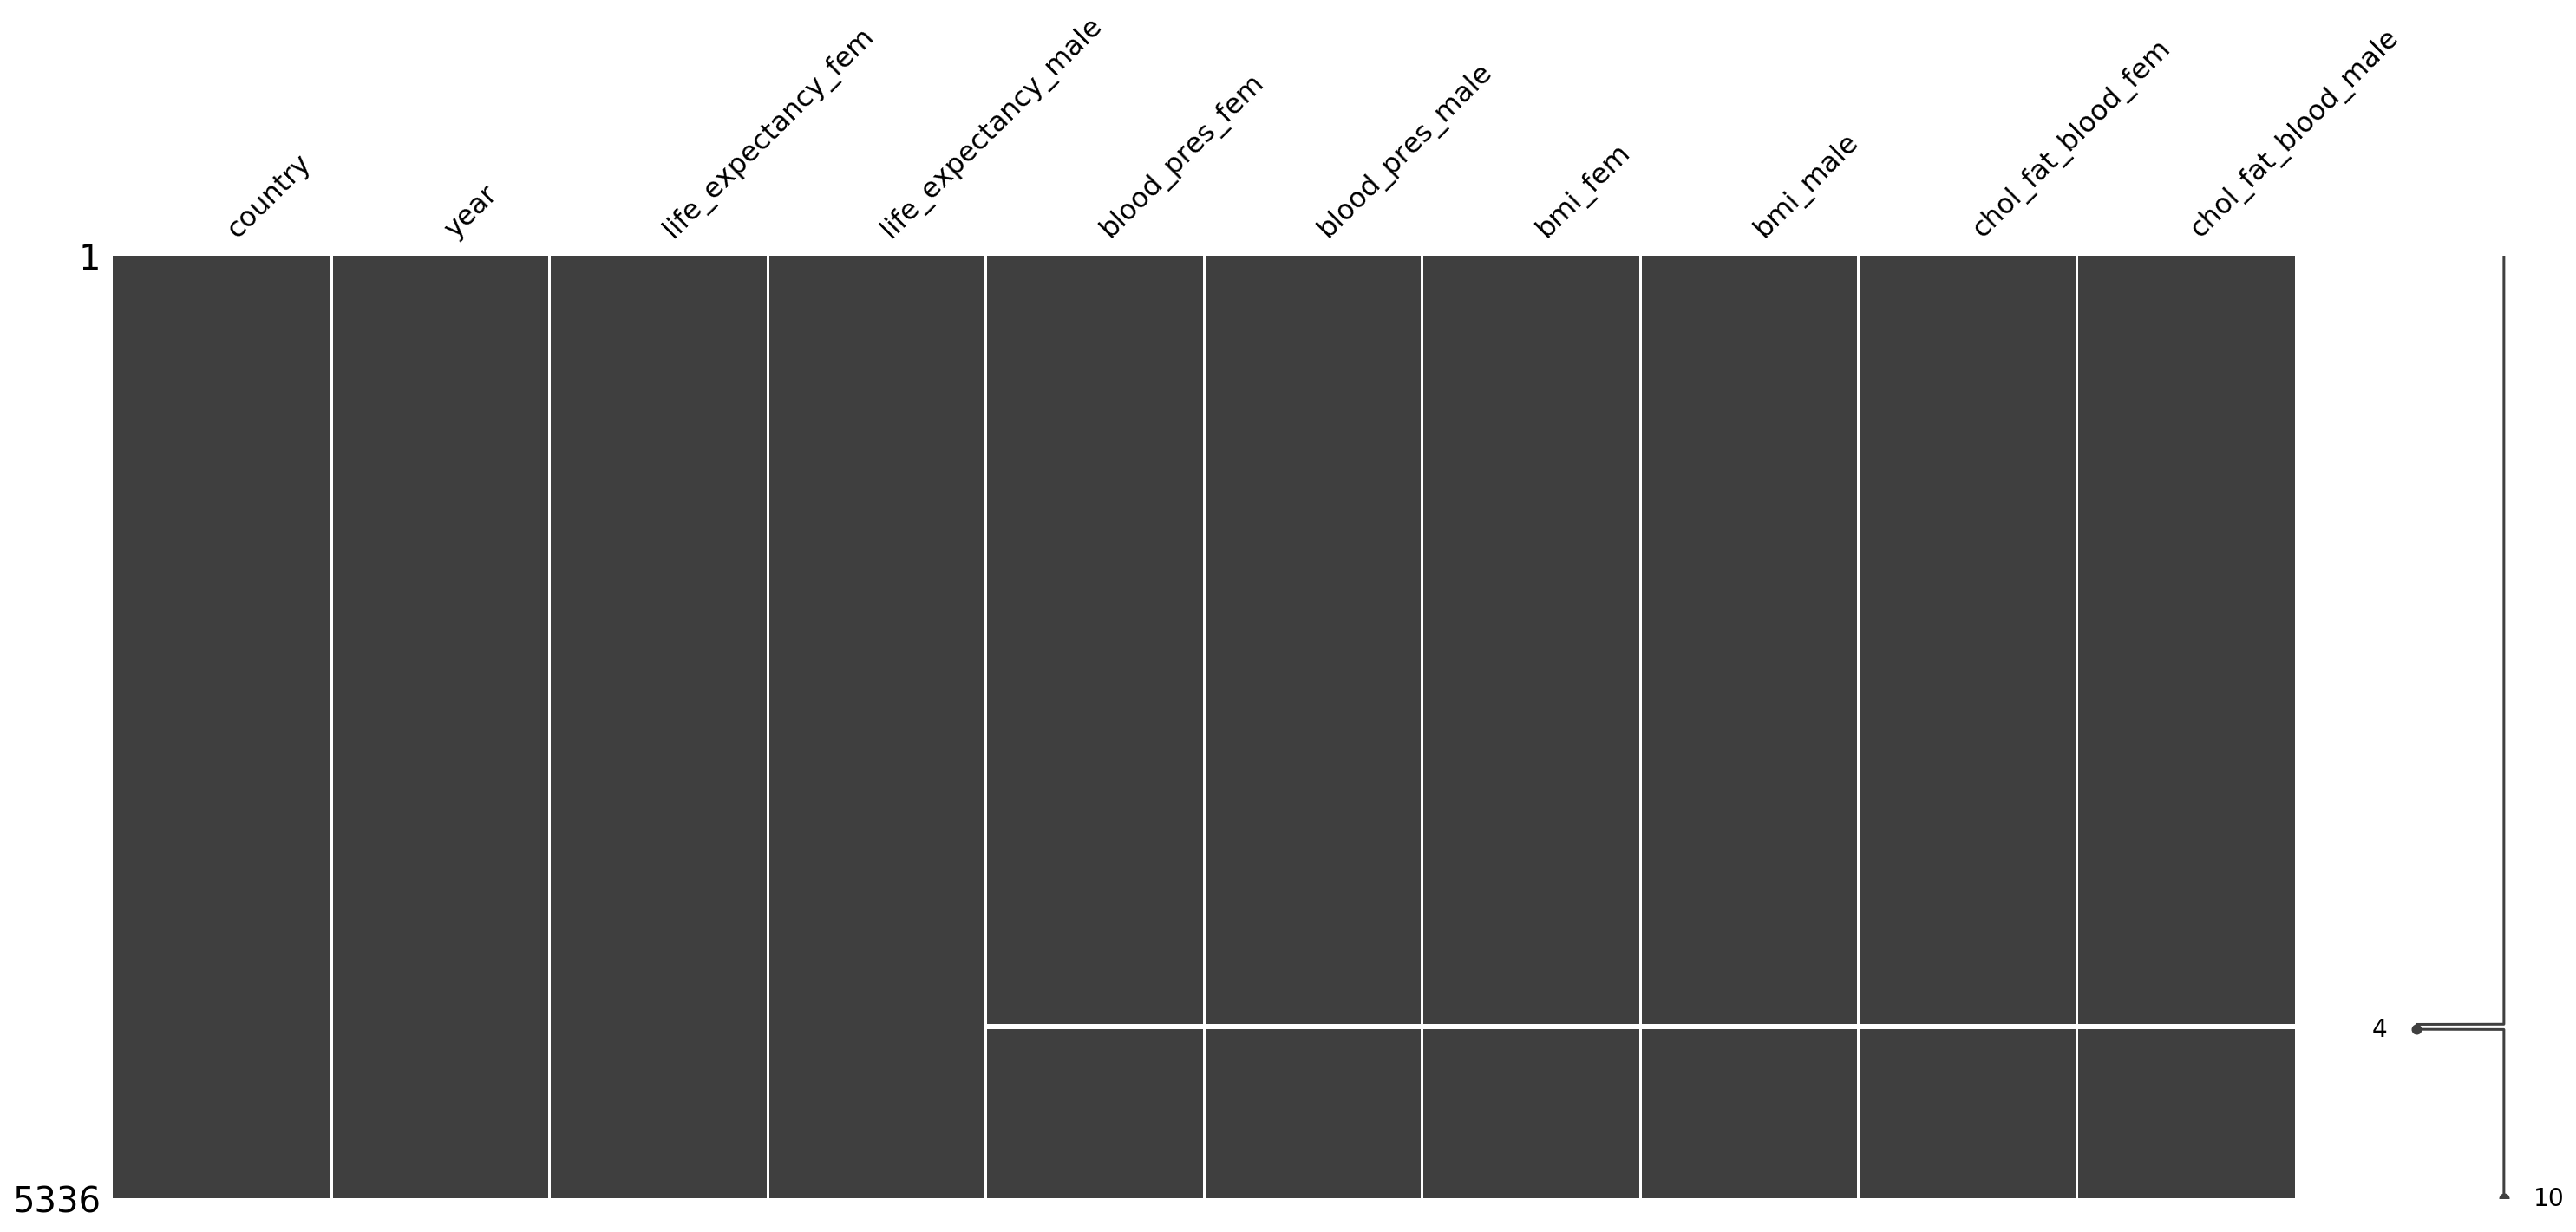

In [0]:
ms.matrix(df_male_fem);

In [0]:
show_missing_countries(df_male_fem, "blood_pres_fem")

['South Sudan']

>Only South Sudan is missing, so this country will be dropped out of this dataframe.

In [0]:
df_male_fem = df_male_fem.drop(df_male_fem[df_male_fem.country == "South Sudan"].index)

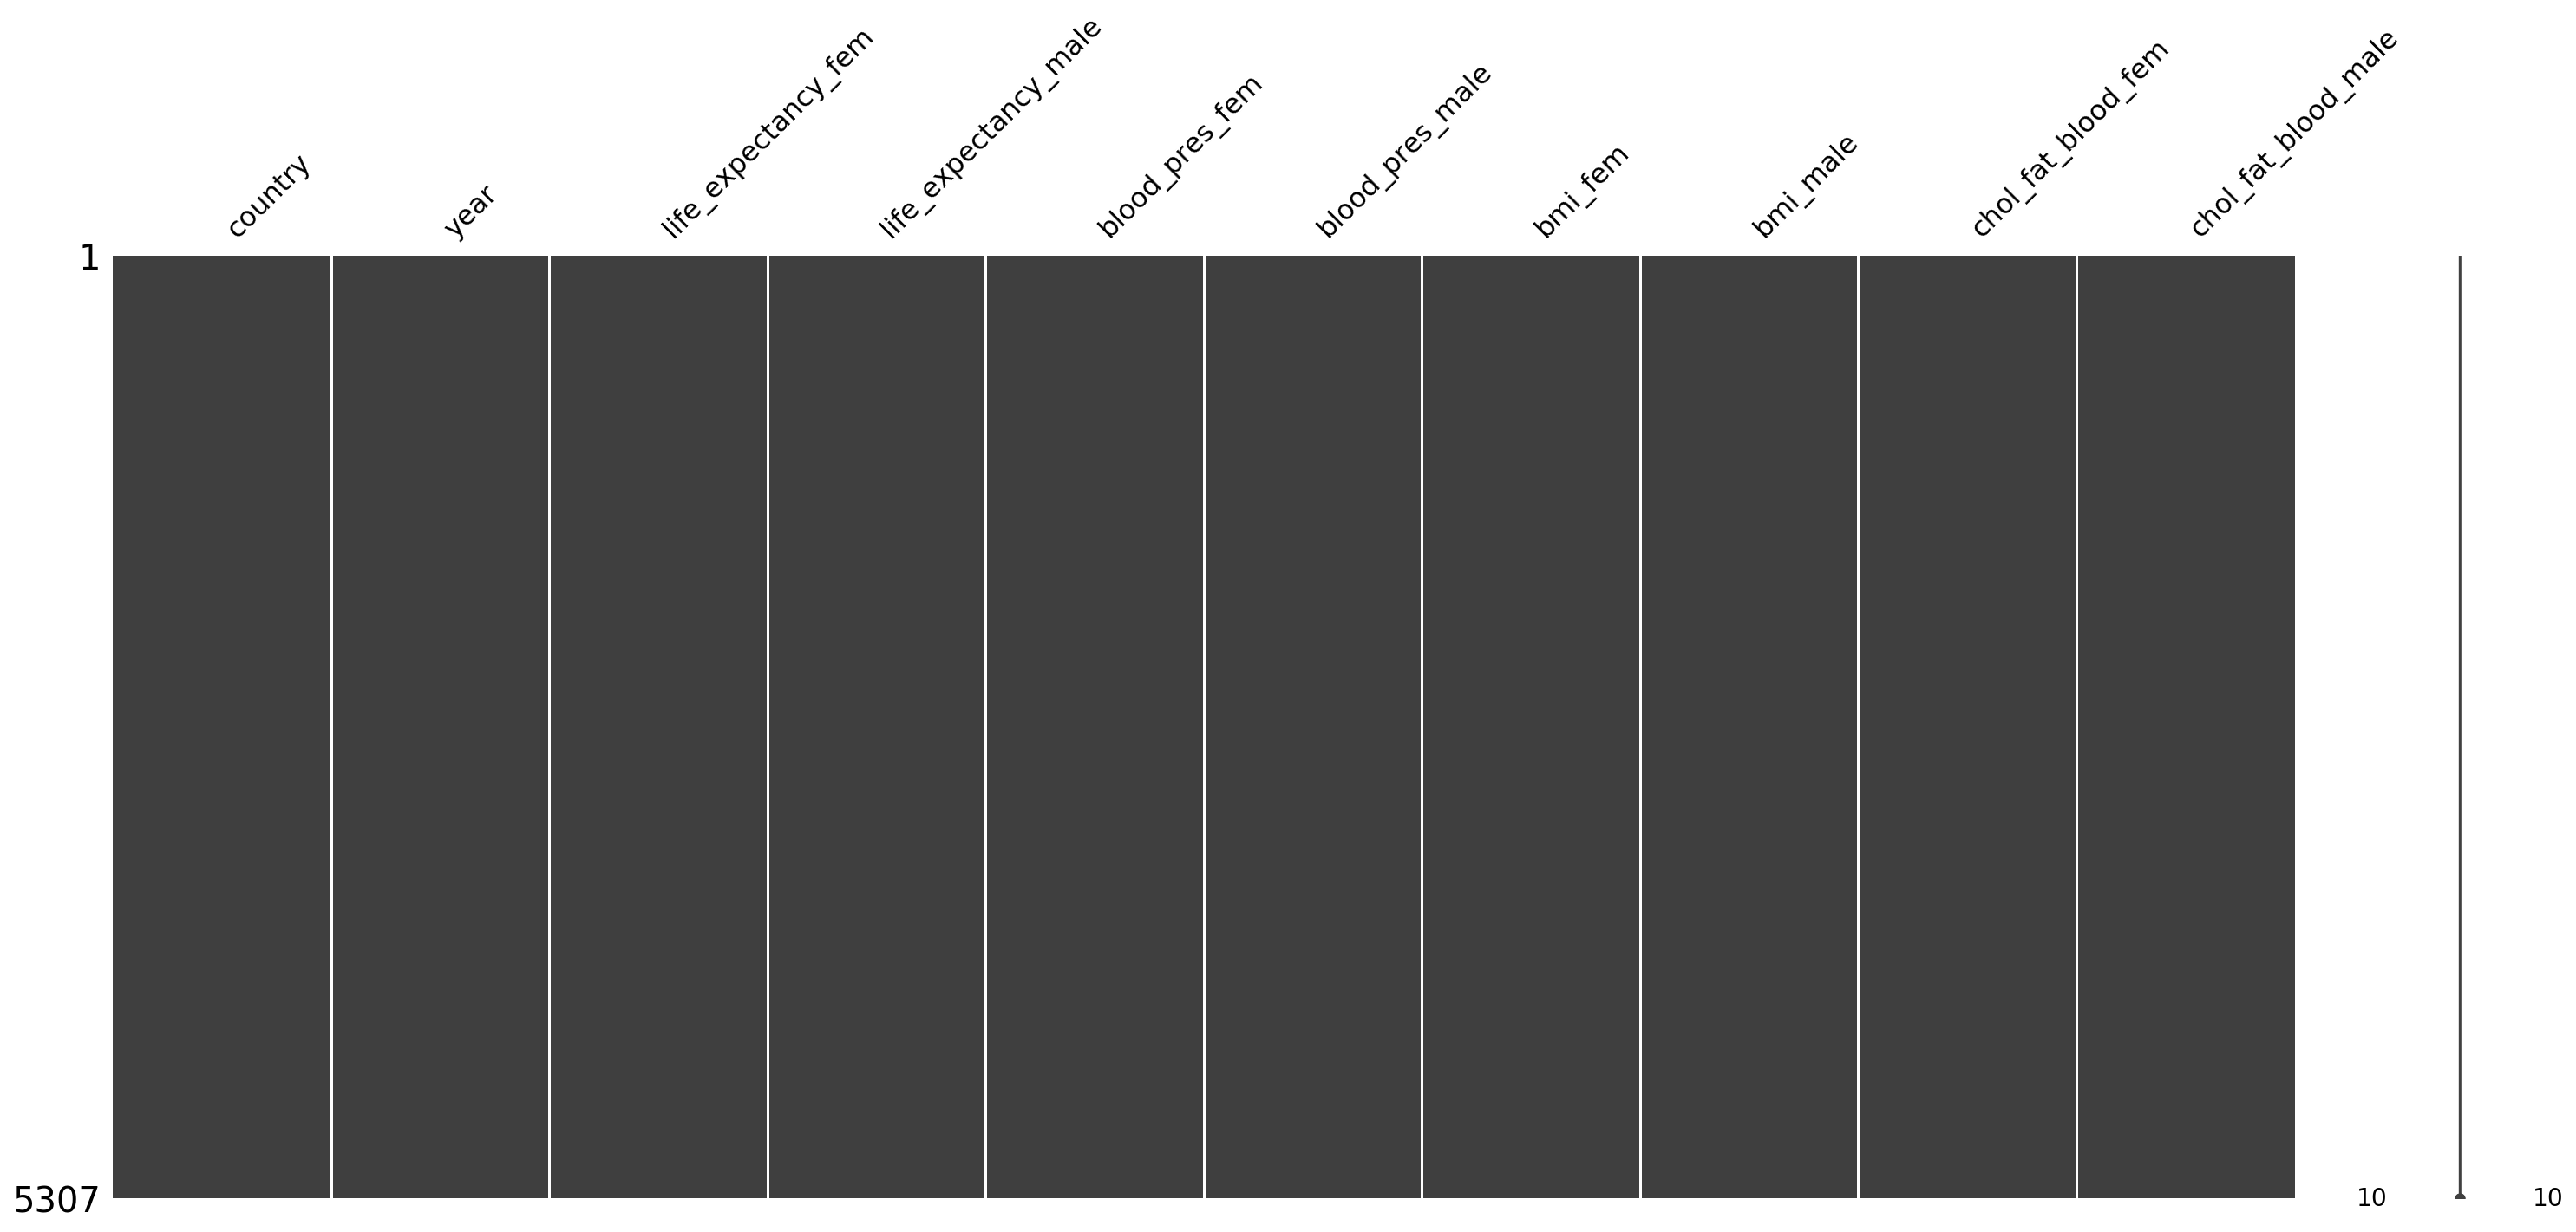

In [0]:
ms.matrix(df_male_fem);

>Now the blood pressure can also be transformed into integer and the clean dataframe can be saved as *.csv

In [0]:
df_male_fem.blood_pres_fem = df_male_fem.blood_pres_fem.astype("int64")
df_male_fem.blood_pres_male = df_male_fem.blood_pres_male.astype("int64")

In [0]:
df_male_fem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5307 entries, 30 to 27508
Data columns (total 10 columns):
country                 5307 non-null object
year                    5307 non-null int64
life_expectancy_fem     5307 non-null float64
life_expectancy_male    5307 non-null float64
blood_pres_fem          5307 non-null int64
blood_pres_male         5307 non-null int64
bmi_fem                 5307 non-null float64
bmi_male                5307 non-null float64
chol_fat_blood_fem      5307 non-null float64
chol_fat_blood_male     5307 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 456.1+ KB


In [0]:
df_male_fem.to_csv("male_female_clean.csv", index = False)

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: How did the world population change over time?

In [0]:
df_popul = pd.read_csv("df_popul.csv")

In [0]:
df_popul.head()

country  year  population
0  Afghanistan  1800     3280000
1  Afghanistan  1801     3280000
2  Afghanistan  1802     3280000
3  Afghanistan  1803     3280000
4  Afghanistan  1804     3280000

>All the gapminder data has basically the same shape of time series. A lot of this data can be plotted with a lineplot, so in the next four cells several functions will be defined to turn the plotting part into an one-liner to make the future extension of this project more easy. 
>
> The graph should contain the following:
>
><ul>
    <li>A lineplot showing the change over time</li>
    <li>The chosen bins, including the delta between the bins</li>
    <li>The axis labels should be dependent on the data and function which was be used to aggregate the data</li>
></ul>
>
> Also I want to keep the customizability, so the y-data labels should be movable, there should be a faktor to change the labels of the plotted data and also the bin size should be variable.
> To do so, the first function calculates the bins and adds the bin-names to the chosen dataframe. The next function aggregates (sum or mean) the data and calculates the data on and between the bin edges. Also it collects some general data for plotting. The third function is responsible for the plotting part, dependent on the results of the functions before and the last function handles the communication between this functions. This is not the final version of these functions because there is some room for improvement, but for the analysis of the chosen the functions works well. 

In [0]:
def add_bins(df, span = 25, start_value = None, end_value = None):
    """
    INPUT: 
        df - dataframe to add the bins
        span - integer, distance between the borders of the edges
        start_value - integer, first year
        end_value - integer, last year
    
    OUTPUT:
        bin_edges - list of bin edges as integers, which can be used with pd.cut
        bin_names - list of strings with bin names
        start_value - returns the input start_value 
        end_value - returs the input end_value
    """
    
    #if no values are specified, take the min and max years of the given dataframe
    if start_value == None:
        start_value = min(df.year)
        
    if end_value == None:
        end_value = max(df.year)
    
    #create the edges of the bins and take the index 0 and reduce it -1, so that pd.cut takes the start value into its calculation
    bin_edges = [x for x in range(start_value,end_value, span)]
    bin_edges.append(end_value)
    bin_edges[0] = bin_edges[0] - 1
    
    bin_names = []
    
    #join the bin edges together with a "-"
    for i, x in enumerate(bin_edges):
        try:
            bin_names.append(" - ".join([str(bin_edges[i] + 1), str(bin_edges[i+1])]))
        except:
            pass
        
    #create and add the "bins" column to the given df with bin_names       
    df["bins"] = pd.cut(df["year"], bin_edges, labels = bin_names)
    
    return bin_edges, bin_names, start_value, end_value

In [0]:
def prepare_plotdata(df, feature, bin_edges, faktor = 1, func = "sum"):
    """
    INPUT:
        df - dataframe with the added column "bins"
        feature - string, columnname which should be prepared
        bin_edges - list of bin_edges, created with func "add_bins"
        faktor - integer, the calculated data will be divided by this factor for better overview in the plot
        func - can be anything, if func is not "sum", it will automatically take the mean of the feature
    
    OUTPUT:
        bin_vales - dataframe based on the input dataframe, grouped after the created bins and added with information like the 
                    feature value of the first year, the second_year, the change in the feature and the position of the labels
                    inside the plot
        year_data - dataframe grouped by years
    """
    
    #group the data by years
    if func == "sum":        
        year_data = df.groupby("year", as_index = False).sum()
    else:
        year_data = df.groupby("year", as_index = False).mean()
                
    #group the data by the created bins
    bin_values = df[["bins", feature]].groupby("bins", as_index = False).sum()
    
    year_firstbin = []
    year_secondbin = []
    feature_change =  []
    change_y = []
    change_x = []

    #filter the dataframes by the given bin_edges and get the feature values to the corresponding years
    for i, x in enumerate(bin_edges):
        try:
            if bin_edges[i] != 1799:
                val1 = int(year_data[year_data.year == bin_edges[i+1]][feature])
                val2 = int(year_data[year_data.year == bin_edges[i]][feature])
            else:
                val1 = int(year_data[year_data.year == 1825][feature])
                val2 = int(year_data[year_data.year == 1800][feature])
            
            #append the created lists by the values
            
            #calculate the feature change
            feature_change.append((val1 - val2)/faktor)
            
            #the change value should be plotted on the half of the y-value
            change_y.append(val2/2)
            
            #there are a span of 25 years, so the x value for the change should be the half of it - basically span/2, 
            #or (year2 - year1 / 2), will be added later
            change_x.append(bin_edges[i]+12.5)
            year_firstbin.append(val2)
            year_secondbin.append(val1)

        except:
            pass
    
    #add the data to the bin_values dataframe
    bin_values["feature_change"] = feature_change
    bin_values["change_x"] = change_x
    bin_values["change_y"] = change_y
    bin_values["year_firstbin"] = year_firstbin
    bin_values["year_secondbin"] = year_secondbin
    
    return bin_values, year_data


In [0]:
def plot_data(df, bin_values, feature, start_value, end_value, bin_edges,
              faktor = 1, scale_y = 1.05, scale_y_pos = 1, func = "sum", integer = False, span = 25):
    """
    INPUT:
        df - dataframe
        bin_values - dataframe created with function prepare_plotdata
        feature - the feature which should be plotted
        start_value - integer, starting year 
        end_value - integer, ending year
        bin_edges - list of integers with bin edges
        faktor - integer for scaling the data
        scale_y - float to scale the y axis
        scale_y_pos - float to customize the y-label pos
        func - string, pass the used func for axis labeling
        integer - boolean, if True, all values will be turned into integer
        span - integer, distance between years for plotting - will be optimized later
        
    OUTPUT:
        lineplot
    
    """
    
    #create a matplotlib figure and axes
    fig, ax = plt.subplots(figsize = (17,8))
    
    #https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
    plt.rcParams.update({'font.size': 11})
    
    x = df["year"]
    y = df[feature]
    
    #plot the line
    ax.plot(x,y, color = "steelblue", lw = 4)
    
    #fill the area between the x - values and 0
    ax.fill_between(x, 0, y, color = "lightgray", alpha = 0.4)
    
    #plot vertical lines to visualize the bins
    for x in range(start_value,end_value,span):
        y_vline = df[df.year == x][feature]
        ax.plot((x,x),(0,y_vline), color = "black", lw = 2, alpha = 0.7)    
        
    #set the y label of the plot
    ax.set_ylabel(f"{func} of the {feature} (based on countries in this dataset)")
    #set the x label of the plot
    ax.set_xlabel("Year")
    #set the title of the plot
    ax.set_title(f"{feature} development")
    #disable the right and top spine for better look
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    #add the "feature change between bins" text to the plot
    for i, x in enumerate(list(bin_values.change_x)):
        if integer == False:
            plot_val_delta = round(float(bin_values.loc[i].feature_change),3)
            plot_year_val = round(float(bin_values.year_secondbin.iloc[i]/faktor),3)
        else: 
            plot_val_delta = int(bin_values.loc[i].feature_change)
            plot_year_val = int(bin_values.year_secondbin.iloc[i]/faktor)
            
        ax.text(x, int(bin_values.iloc[i].change_y), 
                s = (u'\u0394' + f" {plot_val_delta}"),horizontalalignment='center')
        
        
    #add the value text of the bin_edges
    for i, x in enumerate(bin_edges[1:-1]):
        
        if integer == False:
            plot_year_val = round(float(bin_values.year_secondbin.iloc[i]/faktor),3)
        else: 
            plot_year_val = int(bin_values.year_secondbin.iloc[i]/faktor)
            
        ax.text(x, int(bin_values.year_secondbin.iloc[i]+scale_y_pos), 
                s = f"{plot_year_val}", horizontalalignment='center')
        
        
    #set axis limits
    ax.set_xlim(1800, 2018)
    ax.set_ylim(0,max(bin_values.year_secondbin*scale_y))
    #tighten the plot layout
    plt.tight_layout()

    #show the plot (basically not necessary for jupyter but I always put it at the end)
    plt.show()

In [0]:
def create_plot(df, feature, data_faktor = 1, scale_y = 1, func = "sum", integer = False, span = 25):
    """
    INPUT:
        df - dataframe
        feature - string with the feature which should pe plottet
        data_faktor - integer/float to change the scale of data
        scale_y - integer/float to scale the position of the y-label
        func - string with the function, <> "sum" will result in using the mean
        integer - boolean, if True, all the values will turned into integers
        span - distance between bins
        
    Output:     
        lineplot
    """
    
    bin_edges, bin_names, start_year, end_year = add_bins(df);
    
    bin_values, year_data = prepare_plotdata(df, feature, bin_edges, faktor = data_faktor, func = func);
    
    plot_data(
        df = year_data, 
        bin_values = bin_values,
        bin_edges = bin_edges,
        feature = feature, 
        span = span, 
        faktor = data_faktor, 
        scale_y_pos = scale_y, 
        func = func, 
        integer = integer,
        start_value = start_year,
        end_value = end_year);

> Now we will use the created function to plot the population data.

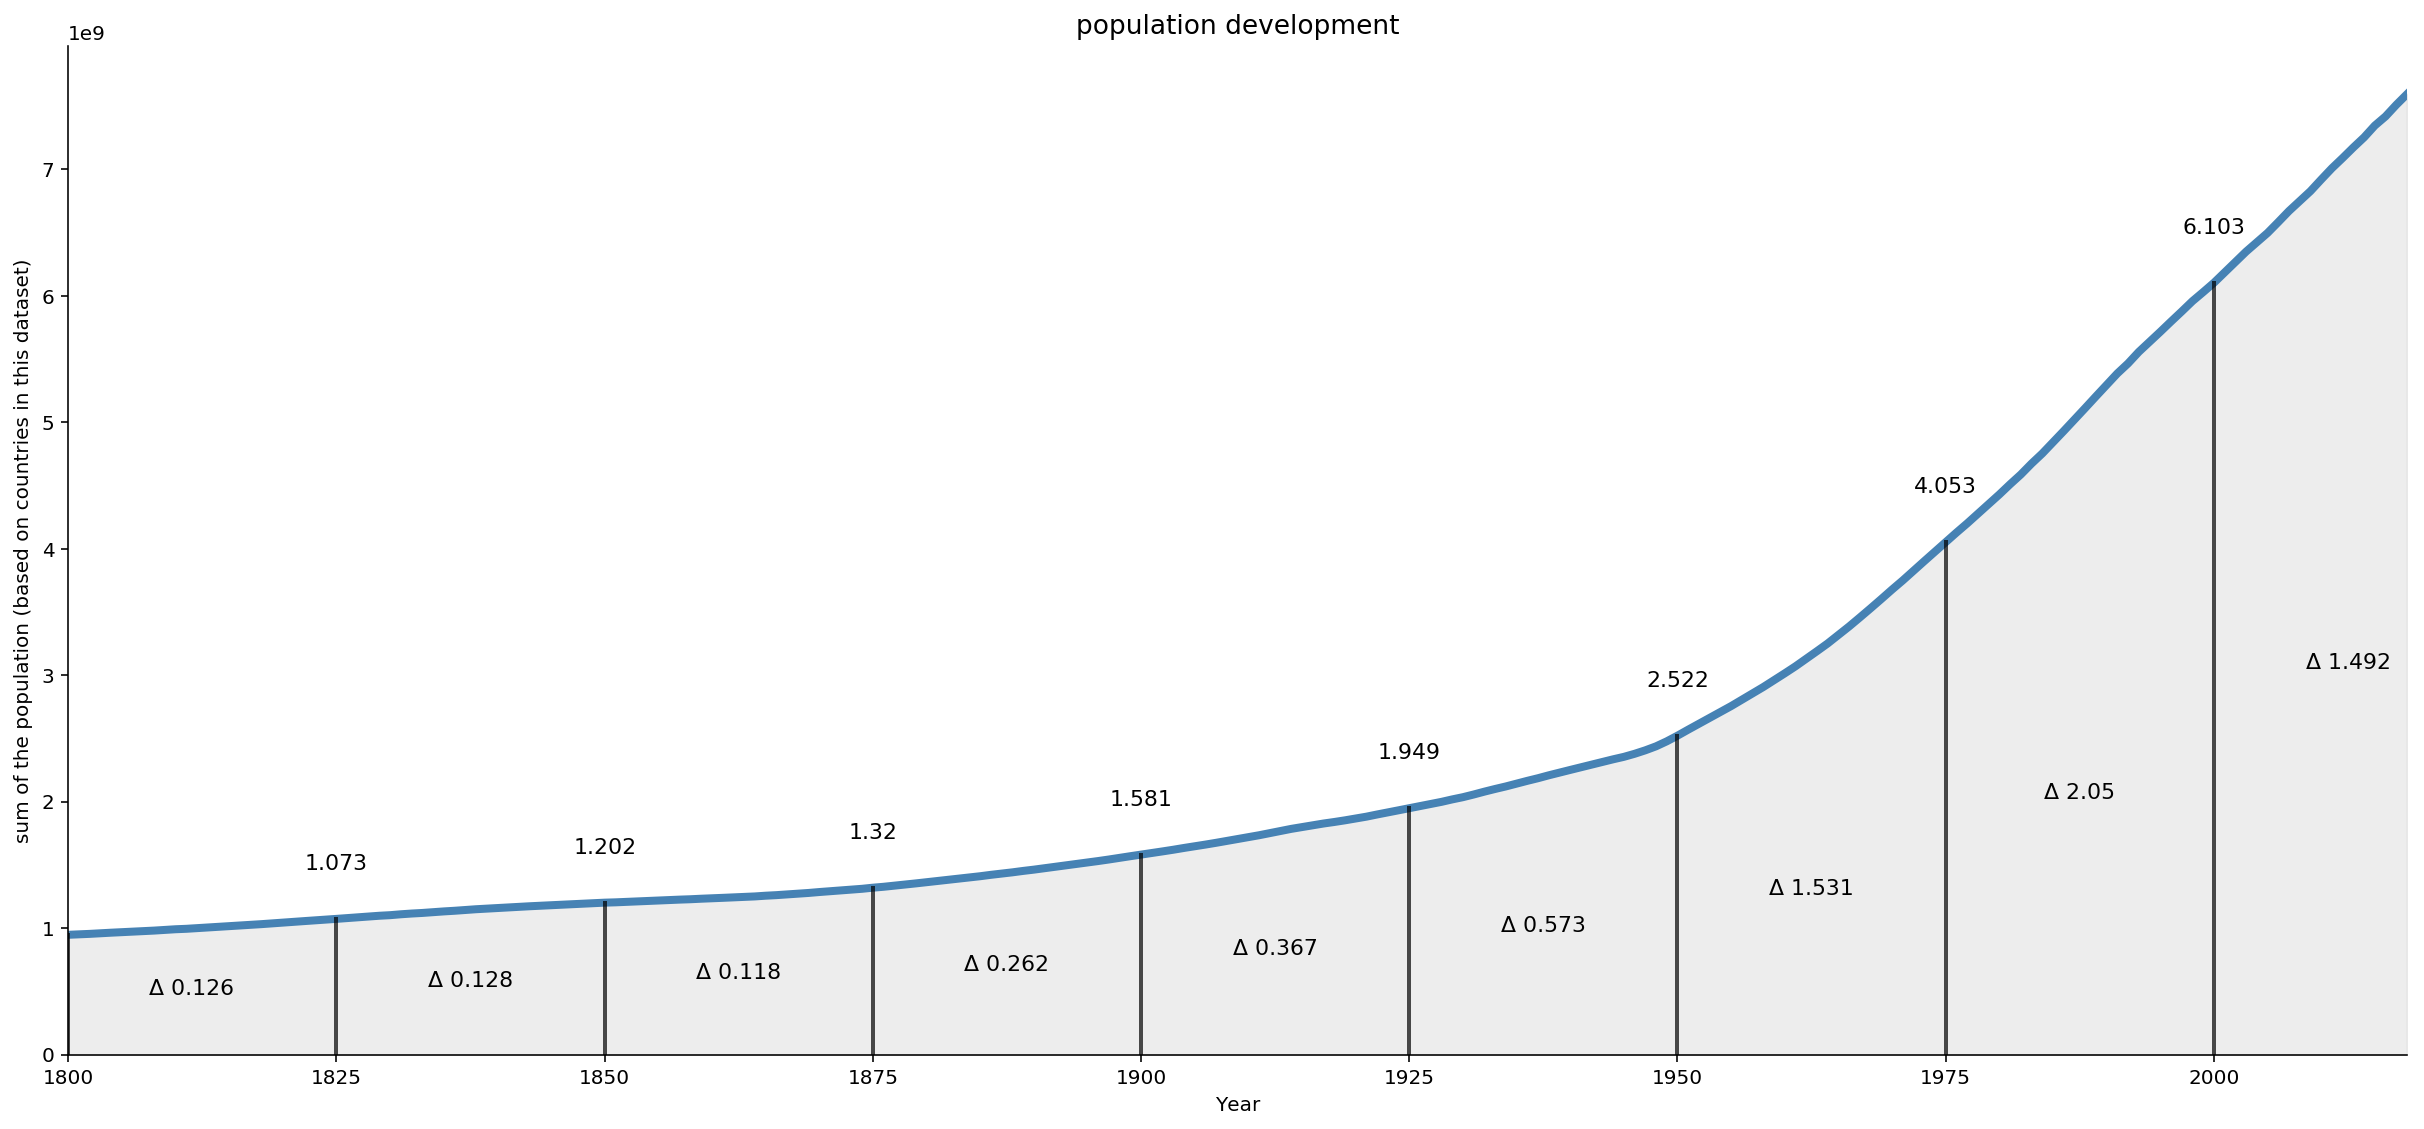

In [0]:
create_plot(df = df_popul, feature = "population", data_faktor = 1000000000, scale_y = 9**9)

> Let's validate if everything worked at first.

In [0]:
df_popul.groupby("year", as_index = False).sum().query("year == 2000")

year  population
200  2000  6103218300

> It worked. Looking at the graph, the first important thing to mention is that the x-axis (sum of population) is scaled to 1e9 (x10^9). The y-axis contains the years. In this example the bins have a span of 25 years. Overall we can see an increasing size of the sum of the world population over time, considering the countries in this dataset. In the first three bins the delta between the bin edges is somehow stagnating around 0.125 * 10^9 until 1875. After that, the delta of the bins is increasing in each bin, first 'slowly' and then around 1950 the population increases strongly with an ongoing trend. To write it in numbers, between 1950 and 1975 the word population increased by 1.531 * 10^9, which nearly is as much as the whole increase from 1800 - 1950. There are a lot of factors going into this trend, for example the industrialization or an increasing knowledge. 

In [0]:
popul_2018 = int(df_popul.groupby("year", as_index = False).sum().query("year == 2018").population)
popul_1800 = int(df_popul.groupby("year", as_index = False).sum().query("year == 1800").population)

print("Population 1800: ", popul_1800)
print("Population 2018: ", popul_2018)
print("Increase: ", round(popul_2018/popul_1800 * 100, 2), "%")

print("Possible Delta for 2000 - 2025: ", round(1.492/18*25, 2))

Population 1800:  947321730
Population 2018:  7595200200
Increase:  801.76 %
Possible Delta for 2000 - 2025:  2.07


>Overall, we can observe an increase in world population of ~801.76% from 1800 - 2018. If we make a very basic calculation and if we assume that the actual trend between 2000 and 2018 stays exactly the same, the delta in the next bin could probably be 2.07 * 10^9, which means that we would pass a world population of 1 * 10^10 by 2025.
>The next cell defines a function to take a look at the top/bottom five changers and minimum and maximum values of the given years.

In [0]:
def compare_df_values(df, year1, year2, label):
    """
    INPUT: 
        df - dataframe
        year1 - integer, first year
        year2 - integer, second year
        label - string, customize the print
        
    OUTPUT:
        print statements
    """
    
    df_compare = df[["country", year1, year2]].copy()
    
    #calculate the percentage of change
    df_compare["change_perc"] = df_compare[[year1, year2]].apply(lambda x: round(x[1] * 100 /x[0],2), axis = 1)
    
    #sort the values
    df_compare.sort_values("change_perc", ascending=False, inplace=True)
    
    print(f"-- Top 5 Changers in {label} (%) --\n")
    
    print(df_compare.head(5))
    
    print(f"\n-- Bottom 5 Changers in {label} (%) --\n")
    
    print(df_compare.tail(5))
     
    #sort the values
    df_compare.sort_values(year1, ascending=False, inplace=True)
    
    print(f"\n-- Maximum {label} in {year1} --\n")
    print(df_compare.head(5))
    
    print(f"\n-- Minimum {label} in {year1} --\n")
    
    print(df_compare.tail(5))
    
    df_compare.sort_values(year2, ascending=False, inplace=True)
    
    print(f"\n-- Maximum {label} in {year2} --\n")
    print(df_compare.head(5))
    
    print(f"\n-- Minimum {label} in {year2} --\n")
    
    print(df_compare.tail(5))
   
    
    df_compare = None   

In [0]:
compare_df_values(population, "1800", "2018", "Population")

-- Top 5 Changers in Population (%) --

                  country   1800      2018  change_perc
184  United Arab Emirates  40200   9540000     23731.34
24                 Brunei   2130    434000     20375.59
152             Singapore  30000   5790000     19300.00
140                 Qatar  14100   2690000     19078.01
49     Dominican Republic  89000  10900000     12247.19

-- Bottom 5 Changers in Population (%) --

             country      1800      2018  change_perc
153  Slovak Republic   2140000   5450000       254.67
59            France  29400000  65200000       221.77
45    Czech Republic   5520000  10600000       192.03
80           Ireland   4060000   4800000       118.23
72          Holy See       905       801        88.51

-- Maximum Population in 1800 --

    country       1800        2018  change_perc
35    China  322000000  1420000000       440.99
76    India  169000000  1350000000       798.82
142  Russia   31100000   144000000       463.02
84    Japan   30300000   1270

> The biggest growth in population was in the United Arab Emirates with an increase of 23731% followed by Brunei and Singapore. > The least growth in population was in Holy See, Ireland and the Czeck Republic. 
> The biggest population in 1800 and also 2018 can be found in China, followed by India and Russia in 1800 and India and the United States in 2018.
> The least populationin both years can be found in Holy See, followed by Brunei in 1800 and Nauru in 2018.
> Overall there is just one(!) country in this dataset with an decreasing size of population.

### Question 2: How did the life expectancy and the income per person changed over time?

In [0]:
df_income = pd.read_csv("income_clean.csv")

In [0]:
compare_df_values(income_per_person, "1800", "2018", "income_per_person")

-- Top 5 Changers in income_per_person (%) --

                  country  1800    2018  change_perc
138                 Qatar  1100  121000     11000.00
150             Singapore  1020   83900      8225.49
182  United Arab Emirates   998   68200      6833.67
97             Luxembourg  1450   99000      6827.59
156           South Korea   575   36800      6400.00

-- Bottom 5 Changers in income_per_person (%) --

                      country  1800  2018  change_perc
27                    Burundi   418   691       165.31
32   Central African Republic   424   689       162.50
38           Congo, Dem. Rep.   485   751       154.85
94                    Liberia   797   801       100.50
154                   Somalia   694   629        90.63

-- Maximum income_per_person in 1800 --

            country  1800   2018  change_perc
120     Netherlands  4230  48500      1146.57
183  United Kingdom  3430  40100      1169.10
167     Switzerland  2700  57100      2114.81
16          Belgium  2410  4

> Looking at the numbers above, Qatar and the United Arab Emirates not only grew in population but also in income per person. The least development of income per person is in the Central African Republic, Somalia and Congo (Dem. Rep.).
> Around 1800 the best overall wealth was in the Netherlands, followed by the United Kingdom and Switzerland, while in Malawi  least income per person could be found. In 2018, Qatar is also the Top 1 while speaking about income per person, followed by Luxembourg and Singapore. The worst income per person in 2018 can be observed in Somalia, the Central African Republic and in Congo (Dem. Rep.).

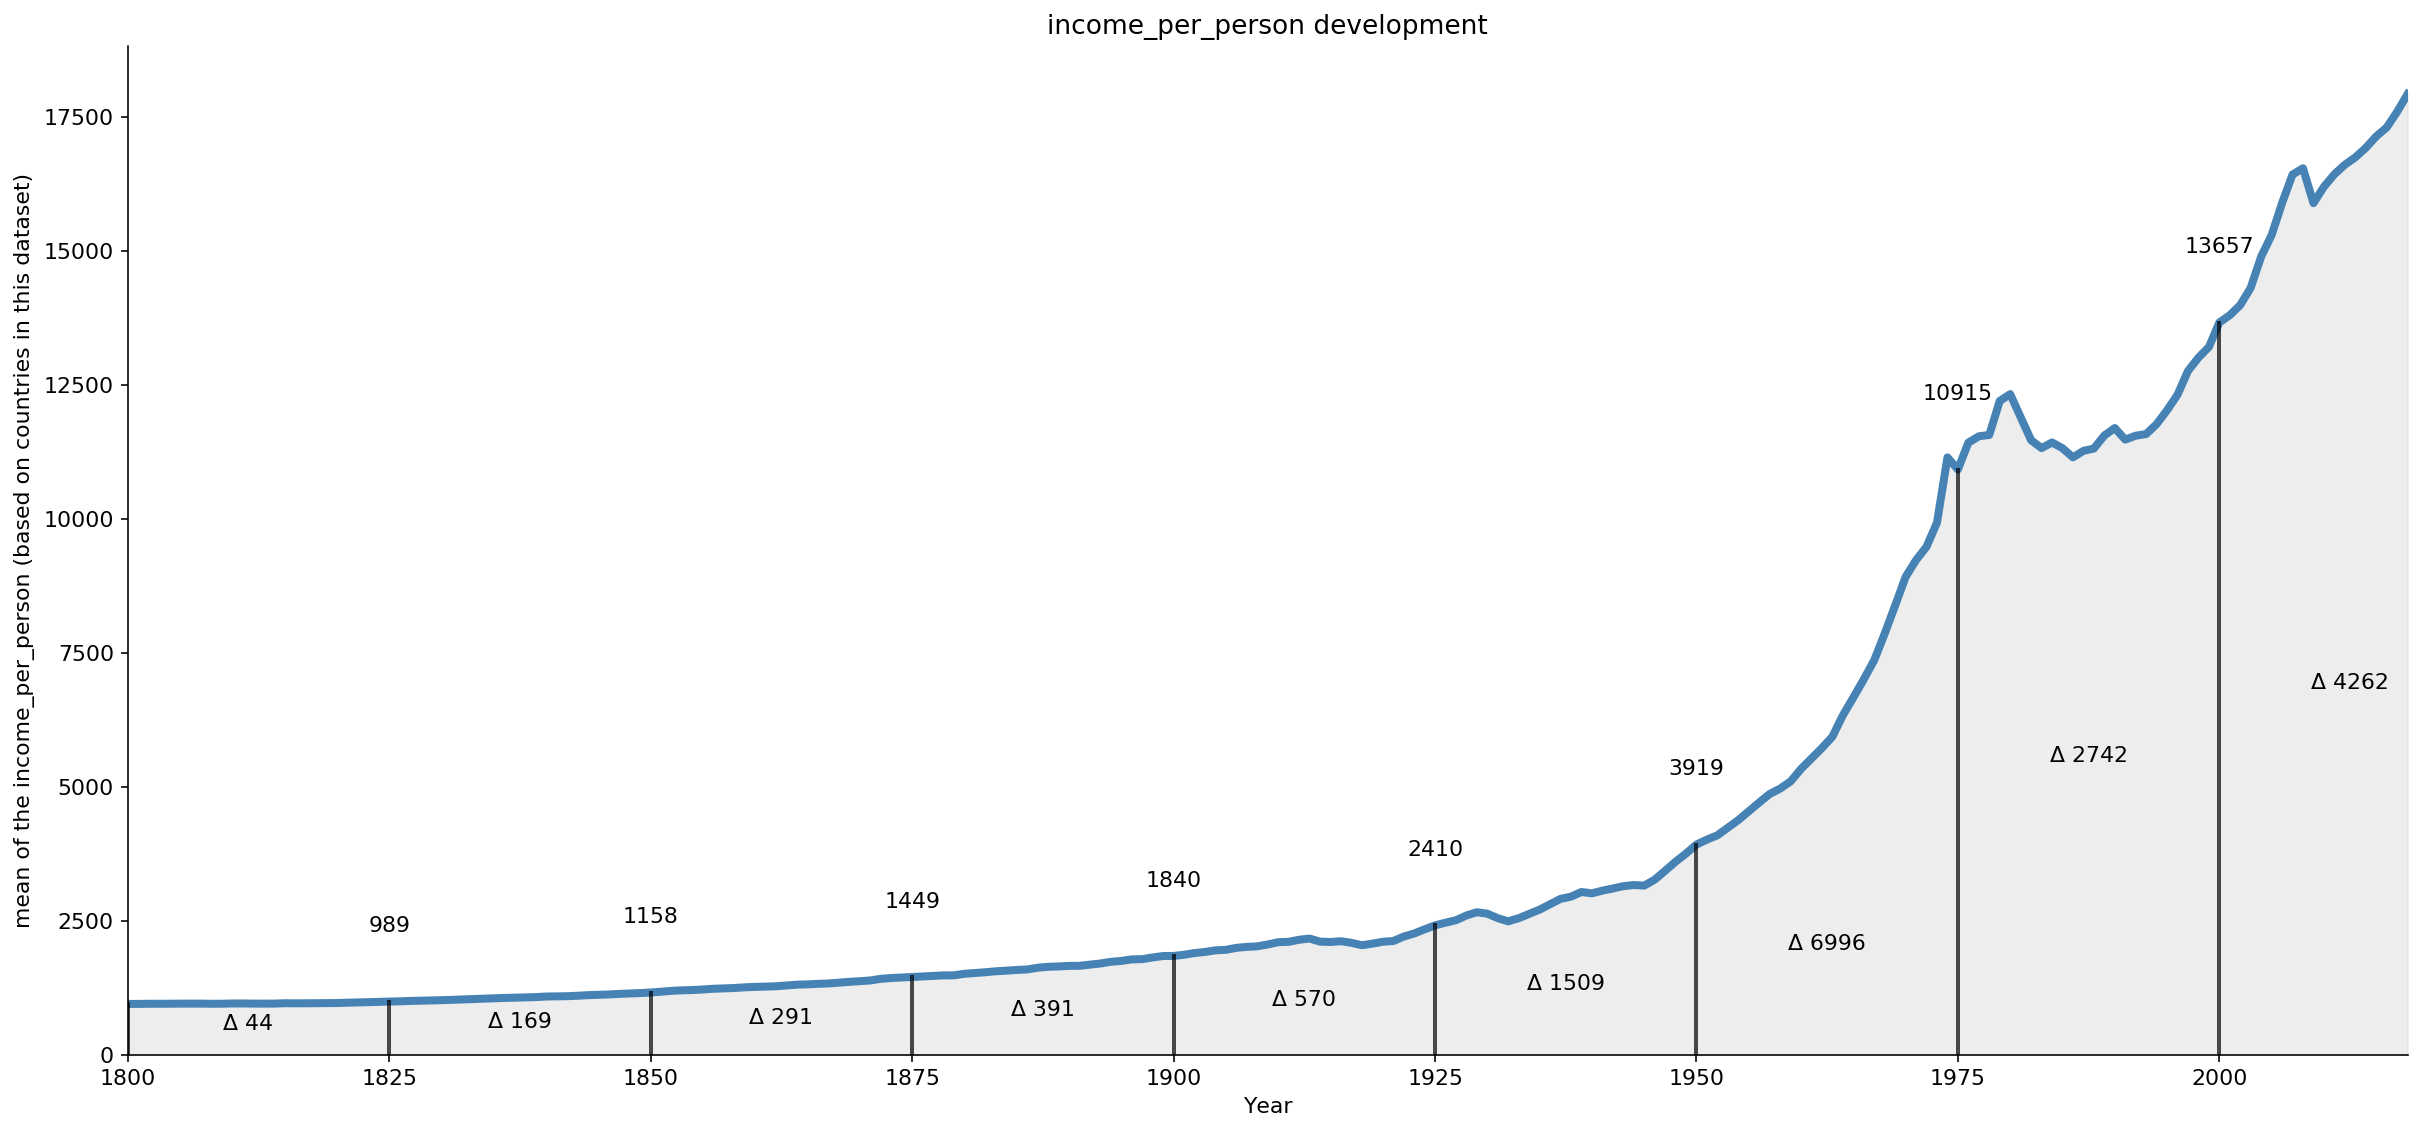

In [0]:
create_plot(df_income, "income_per_person", func = "mean", integer = True, scale_y=1300)

> This graph shows the mean income per person per year for all the countries in this dataset. There is a slow but steady increase in the mean income per person between 1800 and 1925. From 1925 - 1950, the average income per person increased more than 1800 - 1925 combined. Between 1950 and 1975 we can observe a strong increase in the mean income per person, which may could be caused due to the second industrial revolution. Around 1980 is a drop which maybe is caused by the early 1980s recession. After ~1990 the average income per person is increasing again until the financial crisis in 2009, followed by an uptrend again. 

In [0]:
income_2018 = int(df_income.groupby("year", as_index = False).mean().query("year == 2018").income_per_person)
income_1800 = int(df_income.groupby("year", as_index = False).mean().query("year == 1800").income_per_person)

print("Income per person 1800: ", income_1800)
print("Income per person 2018: ", income_2018)
print("Increase: ", round(income_2018/income_1800 * 100, 2), "%")

print("Possible Delta for 2000 - 2025: ", round(4262/18*25, 2))

Income per person 1800:  945
Income per person 2018:  17919
Increase:  1896.19 %
Possible Delta for 2000 - 2025:  5919.44


>The income per person increased by 1896 % from 1800 - 2018. If the trend in between the points of 2000 and 2018 stays exactly the same, the bin between 2000 - 2025 could probably show a delta of ~5919. Overall, an uptrend is also visible for the income per person.

In [0]:
compare_df_values(life_expectancy.dropna(), "1800", "2018", "life_expectancy")

-- Top 5 Changers in life_expectancy (%) --

             country  1800  2018  change_perc
152      South Korea  25.8  81.3       315.12
120        Nicaragua  25.4  78.7       309.84
88            Kuwait  26.0  80.0       307.69
89   Kyrgyz Republic  23.9  71.5       299.16
77              Iran  25.6  76.5       298.83

-- Bottom 5 Changers in life_expectancy (%) --

                      country  1800  2018  change_perc
185                    Zambia  32.6  59.5       182.52
160                 Swaziland  32.3  58.6       181.42
186                  Zimbabwe  33.7  60.2       178.64
32   Central African Republic  30.0  51.6       172.00
93                    Lesotho  32.8  51.1       155.79

-- Maximum life_expectancy in 1800 --

           country  1800  2018  change_perc
74         Iceland  42.9  82.6       192.54
16         Belgium  40.0  81.2       203.00
118    Netherlands  39.9  81.9       205.26
178  United States  39.4  79.1       200.76
30          Canada  39.0  82.2       210

> The top changers in life expectancy are South Korea with 315% and Nicaragua with 309%. The countries with the least changes are the Central African Republic right before Lesotho with 172%. Looking at the year 1800, the longest life expectancy could be found in Iceland with 42.9 years, while the shortest was observed in Yemen with just 23.4 years. The leader of the list in the year 2018 is Japan with 84.2 years, followed by Singapore with 84 years. At the bottom of the list Lesotho and the Central African Republic can be found again with ~51 years. 

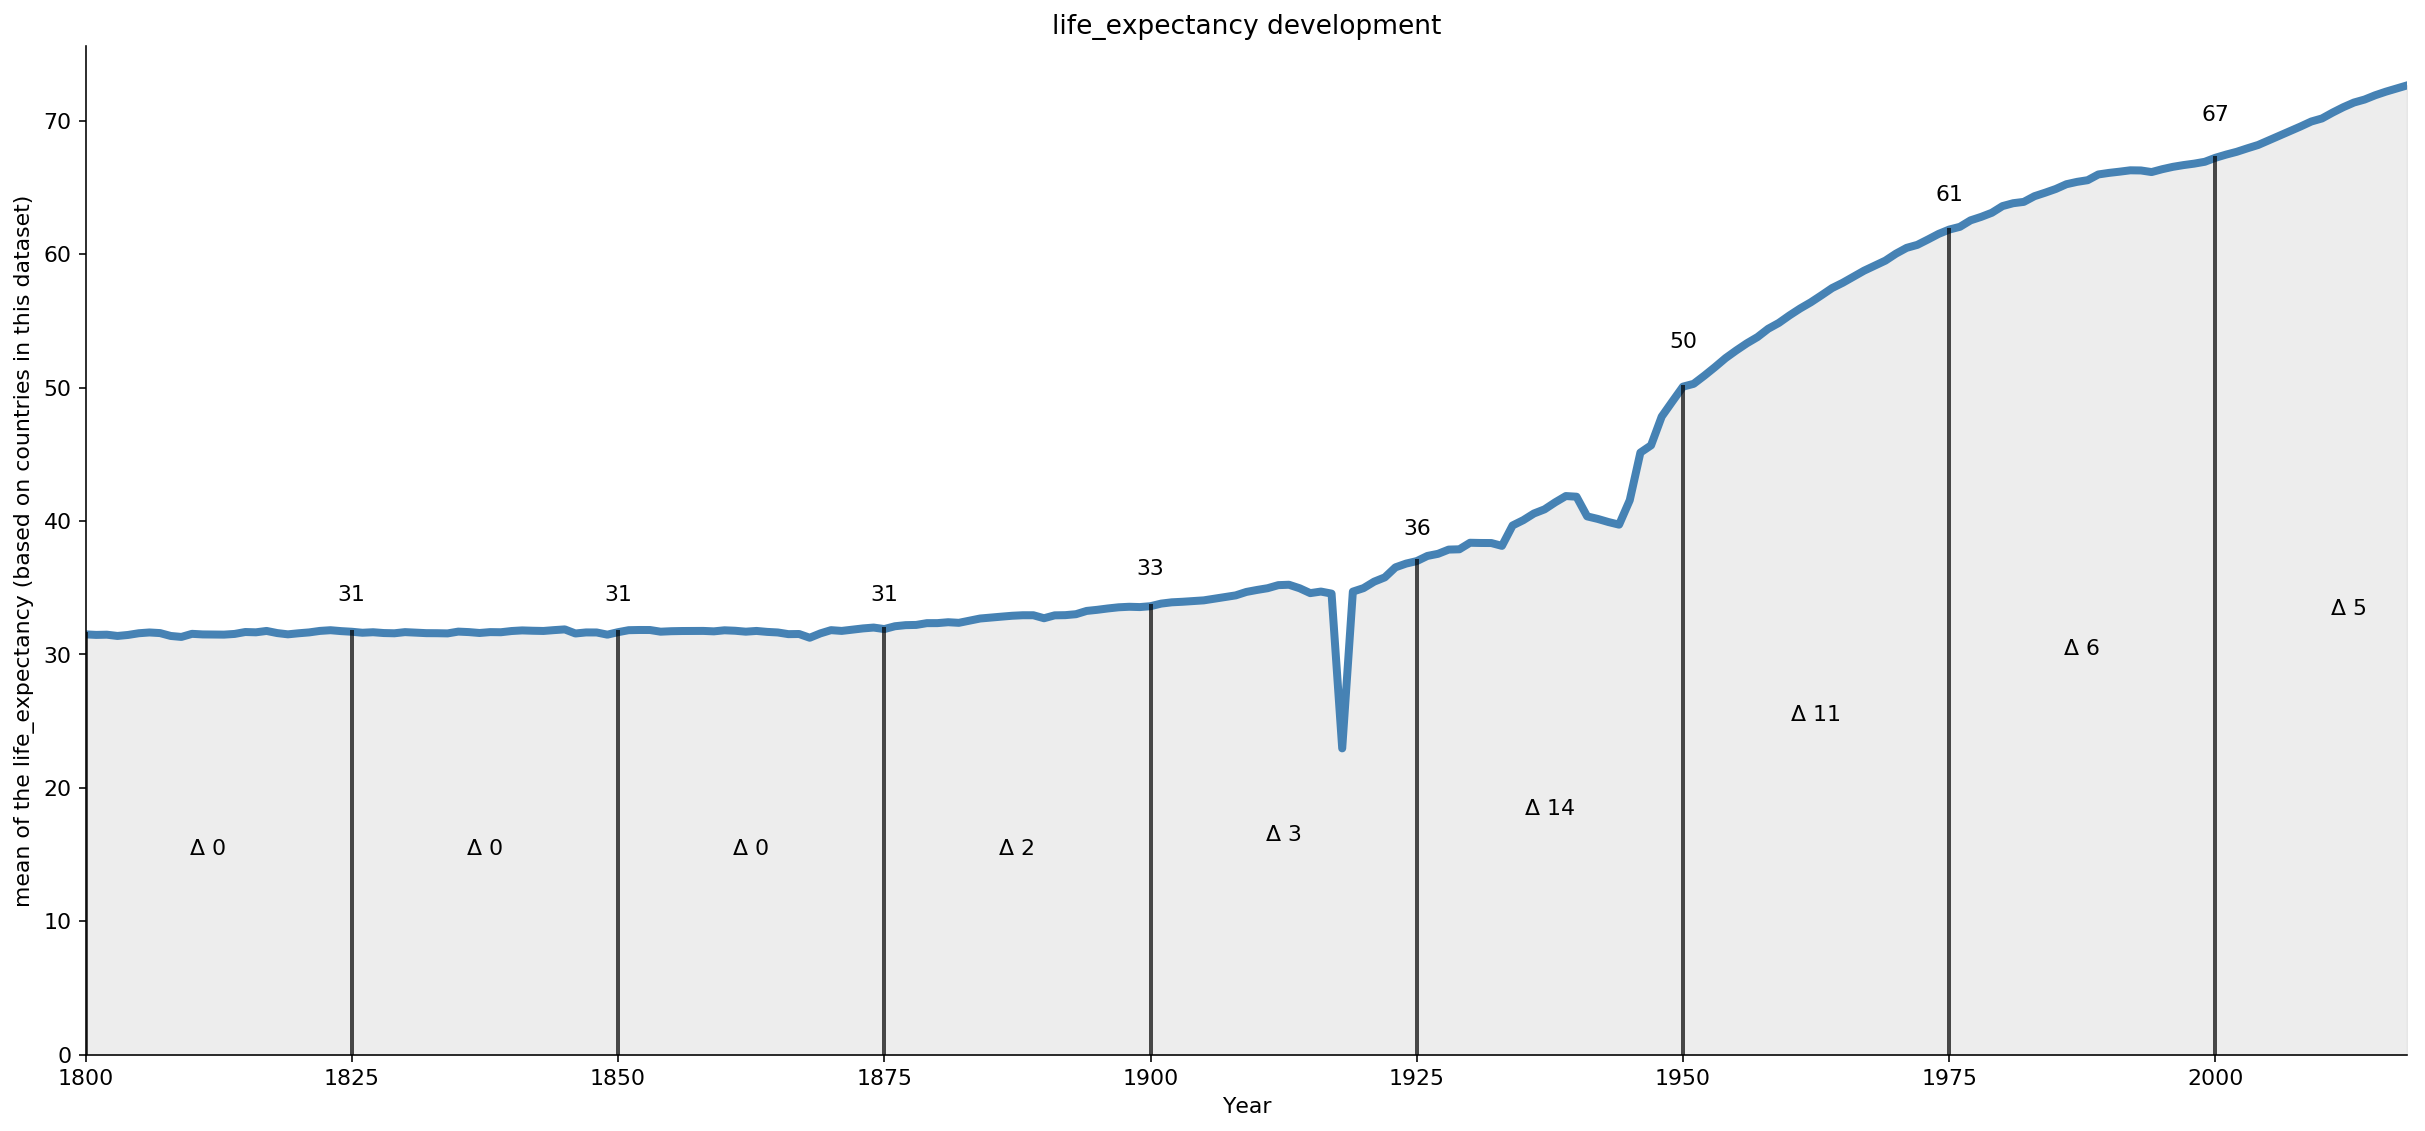

In [0]:
create_plot(df_income, "life_expectancy", func = "mean", integer = True, scale_y=3)

In [0]:
life_2018 = int(df_income.groupby("year", as_index = False).mean().query("year == 2018").life_expectancy)
life_1800 = int(df_income.groupby("year", as_index = False).mean().query("year == 1800").life_expectancy)

print("Life Expectancy 1800: ", life_1800)
print("Life Expectancy 2018: ", life_2018)
print("Increase: ", round(life_2018/life_1800 * 100, 2), "%")

print("Possible Delta for 2000 - 2025: ", round(5/18*25, 2))

Life Expectancy 1800:  31
Life Expectancy 2018:  72
Increase:  232.26 %
Possible Delta for 2000 - 2025:  6.94


>Looking at this the graph we can see a stagnation of average life expectancy from 1800 - 1875, followed by an increase of 2 years up to 1900. From 1900 - 1925 we can see a strong drop, probably caused by the first world war 1914 - 1918. Overall, the mean life expectancy increased by 3 years from 1900 - 1925. Between 1925 and 1950 there is again a drop observable, which again was probably caused by a war -  world war II. After that we can observe the biggest increase of life expectancy in this data between 1950 and 1975 with an increase of 11 years. After that, the life expectancy still increased, but a little bit more slowly. Overall, there is still an uptrend visible and the life expectancy increase from 1800 - 2018 by ~232.26%. If we assume that all the factors for the actual development of life expectancy stay the same, then the possible increase in the average life expectancy could be 1.94 more years until 2025. To sum up, due to technology, science and other factors the mean life expectancy is continiously increasing all over the world. 

### Question 3: Is the life expectancy related to the income?

> The next step after finding an overall uptrend in the development of the population, income per person and life expectancy, is to look at the relationships between those metrics. More specific, we will now take a look on the relationship between the life expectancy and the income per person. To do so, a new dataframe will be created.

In [0]:
df_income_scatter_2018 = df_income[df_income.year == 2018].copy()

In [0]:
df_income_scatter_2018.head()

country  year  population  life_expectancy  \
218           Afghanistan  2018    36400000             58.7   
437               Albania  2018     2930000             78.0   
656               Algeria  2018    42000000             77.9   
875                Angola  2018    30800000             65.2   
1094  Antigua and Barbuda  2018      103000             77.6   

      income_per_person         bins  
218                1870  2001 - 2018  
437               12400  2001 - 2018  
656               13700  2001 - 2018  
875                5850  2001 - 2018  
1094              21000  2001 - 2018

> For the visualization a scatter plot will be used. There are a lot of countries in this dataset and without an interactive plot it would not be very clear what we are looking at. However, to gain some knowledge about the overall trend and maybe some kind of more specific insights, it would be helpful, if we could separate atleast the different continents. For that, the pycountry library will be used. With this library we will convert the country name to the alpha 2 code of the country and afterwars transform this alpha 2 code to the continent code. 

In [0]:
#get the alpha_2 code of "Germany"
pycountry.countries.lookup("Germany").alpha_2

'DE'

In [0]:
#get the continent cide to the alpha_2 code
pycountry_convert.convert_country_alpha2_to_continent_code.COUNTRY_ALPHA2_TO_CONTINENT_CODE[
    pycountry.countries.lookup("Germany").alpha_2]

'EU'

In [0]:
df_income_scatter_2018.head()

country  year  population  life_expectancy  \
218           Afghanistan  2018    36400000             58.7   
437               Albania  2018     2930000             78.0   
656               Algeria  2018    42000000             77.9   
875                Angola  2018    30800000             65.2   
1094  Antigua and Barbuda  2018      103000             77.6   

      income_per_person         bins  
218                1870  2001 - 2018  
437               12400  2001 - 2018  
656               13700  2001 - 2018  
875                5850  2001 - 2018  
1094              21000  2001 - 2018

> The following function does this process and will be applied to the "country" column.

In [0]:
def find_continent(column):
    """
    returns the continent or error to the given country
    """
    try:
        continent = pycountry_convert.convert_country_alpha2_to_continent_code.COUNTRY_ALPHA2_TO_CONTINENT_CODE[
        pycountry.countries.lookup(column).alpha_2]
    except: 
        continent = "Error"
        
    return continent

In [0]:
#use the defined function
df_income_scatter_2018["continent"] = df_income_scatter_2018["country"].apply(find_continent)

In [0]:
df_income_scatter_2018.head()

country  year  population  life_expectancy  \
218           Afghanistan  2018    36400000             58.7   
437               Albania  2018     2930000             78.0   
656               Algeria  2018    42000000             77.9   
875                Angola  2018    30800000             65.2   
1094  Antigua and Barbuda  2018      103000             77.6   

      income_per_person         bins continent  
218                1870  2001 - 2018        AS  
437               12400  2001 - 2018        EU  
656               13700  2001 - 2018        AF  
875                5850  2001 - 2018        AF  
1094              21000  2001 - 2018        NA

> Great, it looks liked it worked out fine. Let's check if there were some errors during this process.

In [0]:
#show missing countries
df_income_scatter_2018[df_income_scatter_2018.continent == "Error"]

country  year  population  life_expectancy  \
5255                           Brunei  2018      434000             77.4   
6788                       Cape Verde  2018      553000             74.1   
8321                 Congo, Dem. Rep.  2018    84000000             62.4   
8540                      Congo, Rep.  2018     5400000             63.9   
8978                    Cote d'Ivoire  2018    24900000             61.2   
16643                            Iran  2018    82000000             76.5   
21242                  Macedonia, FYR  2018     2090000             75.2   
23432           Micronesia, Fed. Sts.  2018      106000             65.8   
26498                     North Korea  2018    25600000             71.1   
27374                       Palestine  2018     5050000             72.2   
29564                          Russia  2018   144000000             71.1   
32849                     South Korea  2018    51200000             81.3   
33725                       St. Lucia  2018      180000             76.6   
33944  St. Vincent and the Grenadines  2018      110000             72.0   
35258                           Syria  2018    18300000             69.8   
36134                     Timor-Leste  2018     1320000             73.3   

       income_per_person         bins continent  
5255               76900  2001 - 2018     Error  
6788                6420  2001 - 2018     Error  
8321                 751  2001 - 2018     Error  
8540                5620  2001 - 2018     Error  
8978                3760  2001 - 2018     Error  
16643              17400  2001 - 2018     Error  
21242              14000  2001 - 2018     Error  
23432               3410  2001 - 2018     Error  
26498               1390  2001 - 2018     Error  
27374               2700  2001 - 2018     Error  
29564              24800  2001 - 2018     Error  
32849              36800  2001 - 2018     Error  
33725              10900  2001 - 2018     Error  
33944              11400  2001 - 2018     Error  
35258               2900  2001 - 2018     Error  
36134               1490  2001 - 2018     Error

> There are not too much countries missing, so we can quickly create an manual map for the missing countries.

In [0]:
#create map for the missing countries
error_map = {
    "Brunei": "AS",
    "Cape Verde": "AF",
    "Congo, Dem. Rep.": "AF",
    "Congo, Rep.": "AF",
    "Cote d'Ivoire": "AF",
    "Iran": "AS",
    "Macedonia, FYR": "EU",
    "Micronesia, Fed. Sts.": "OC",
    "North Korea": "AS",
    "Palestine": "AS",
    "Russia": "AS",
    "South Korea": "AS",
    "St. Lucia": "NA",
    "St. Vincent and the Grenadines": "NA",
    "Syria": "AS",
    "Timor-Leste": "AS"}

In [0]:
#add the missing countries manually
for x in list(error_map.keys()):
    print(x)
    df_income_scatter_2018.loc[df_income_scatter_2018[df_income_scatter_2018.country == x].index, "continent"] = error_map[x]

Brunei
Cape Verde
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Iran
Macedonia, FYR
Micronesia, Fed. Sts.
North Korea
Palestine
Russia
South Korea
St. Lucia
St. Vincent and the Grenadines
Syria
Timor-Leste


In [0]:
df_income_scatter_2018[df_income_scatter_2018.continent == "Error"]

Empty DataFrame
Columns: [country, year, population, life_expectancy, income_per_person, bins, continent]
Index: []

> Now all the countries are mapped with their corresponding continents. To separate them in the plot, we will now create a color map and also apply it to the dataframe. 

In [0]:
df_income_scatter_2018.continent.unique()

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

In [0]:
#create a color map for the scatter plot
color_map = {
    "AS": '#f4a742', #orange
    "EU": '#20d82f', #green
    "AF": '#20d8d8', #light 'blue
    "NA": '#f2ff00', #yellow
    "SA": '#013384', #darker blue
    "OC": '#d64242'  #red
}

In [0]:
#add the colors to the continents
df_income_scatter_2018["color"] = df_income_scatter_2018.continent.apply(lambda x: color_map[x])

In [0]:
df_income_scatter_2018.head()

country  year  population  life_expectancy  \
218           Afghanistan  2018    36400000             58.7   
437               Albania  2018     2930000             78.0   
656               Algeria  2018    42000000             77.9   
875                Angola  2018    30800000             65.2   
1094  Antigua and Barbuda  2018      103000             77.6   

      income_per_person         bins continent    color  
218                1870  2001 - 2018        AS  #f4a742  
437               12400  2001 - 2018        EU  #20d82f  
656               13700  2001 - 2018        AF  #20d8d8  
875                5850  2001 - 2018        AF  #20d8d8  
1094              21000  2001 - 2018        NA  #f2ff00

> Now the plot will be created. The y-axis contains the life expectancy, while the x-axis contains the income per person. The size of the circles will represent the size of population. The population size will be reduced by 90000 for a more clean plot.

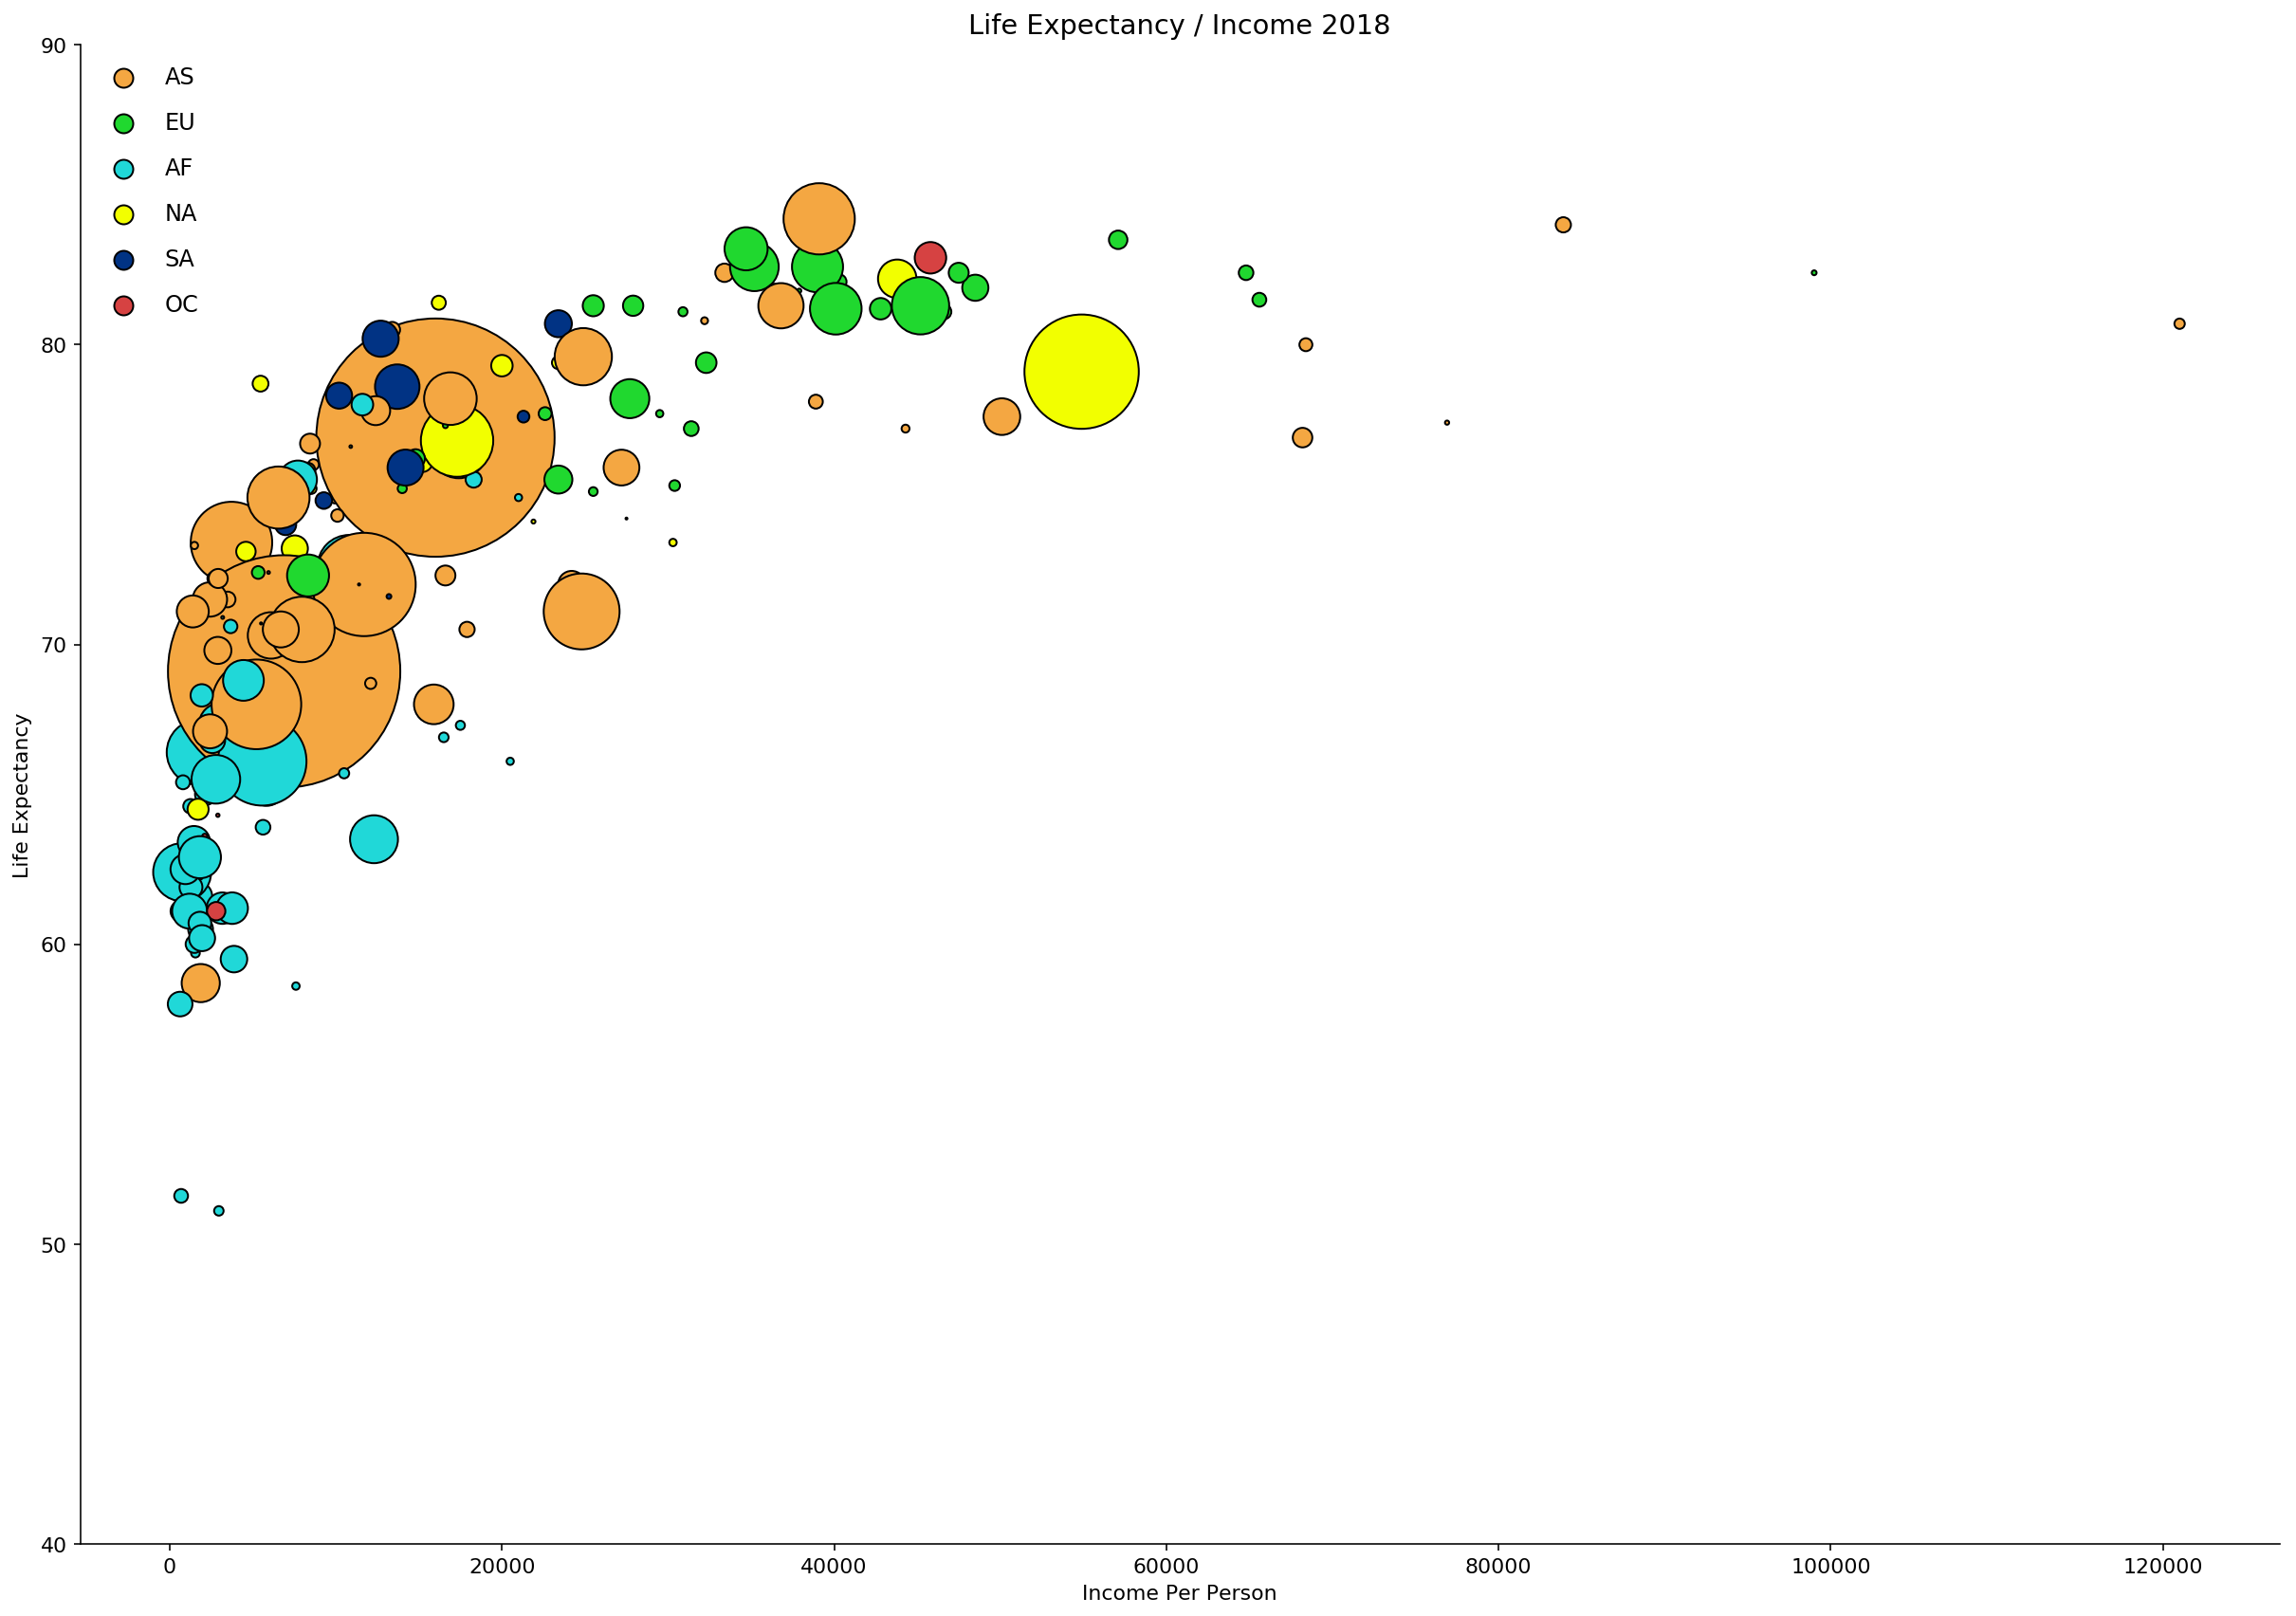

In [0]:
#create the scatter plot
fig, ax = plt.subplots(figsize = (17,12))
    
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rcParams.update({'font.size': 12})

x = df_income_scatter_2018["income_per_person"]
y = df_income_scatter_2018["life_expectancy"]
color = np.array(df_income_scatter_2018["color"])
size = df_income_scatter_2018["population"]

#plot the scatterpoints, the size is reduced by a factor for a cleaner plot
plt.scatter(x = x, y = y, s=size/90000, c = color, edgecolors = "black", label = None)

#set the y label of the plot
ax.set_ylabel(f"Life Expectancy")
#set the x label of the plot
ax.set_xlabel("Income Per Person")
#set the title of the plot
ax.set_title(f"Life Expectancy / Income 2018")
#disable the right and top spine for better look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_xlim(0,50000)
ax.set_ylim(40,90)

#https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

for continent in list(df_income_scatter_2018.continent.unique()):
    plt.scatter([], [], c=color_map[continent], alpha=1, label=str(continent), s = 100, edgecolors = "black")
    
legend1 = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='')

#for population in  [1*10**9, 300, 500]:
#    plt.scatter([], [], c='grey', alpha=1, s=area,
#                label=str(area) + ' km$^2$', edgecolors = "black")
    
#legend2 = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Colors and Size', loc = 4)

#tighten the plot layout
plt.tight_layout()

#show the plot (basically not necessary for jupyter but I always put it at the end)
plt.show()

> On the first sight, this plot reminds of a logarithmic function. While with increasing income per person the life expectancy grows fast at first, it is growing less and less with ongoing increase in income per person. It looks like there are some outliers after ~65000, so we will limit the x-axis to 65000 income per person. Before that, we can already see that with increasing income per person the lower life expectancies in this data decrease more and more. Because there are different life expectancies on nearly the same income, we can already assume that the income per person is not the only factor for the life expectancy, but anyway we can also assume, that there is an definite relationship between these two variables. 

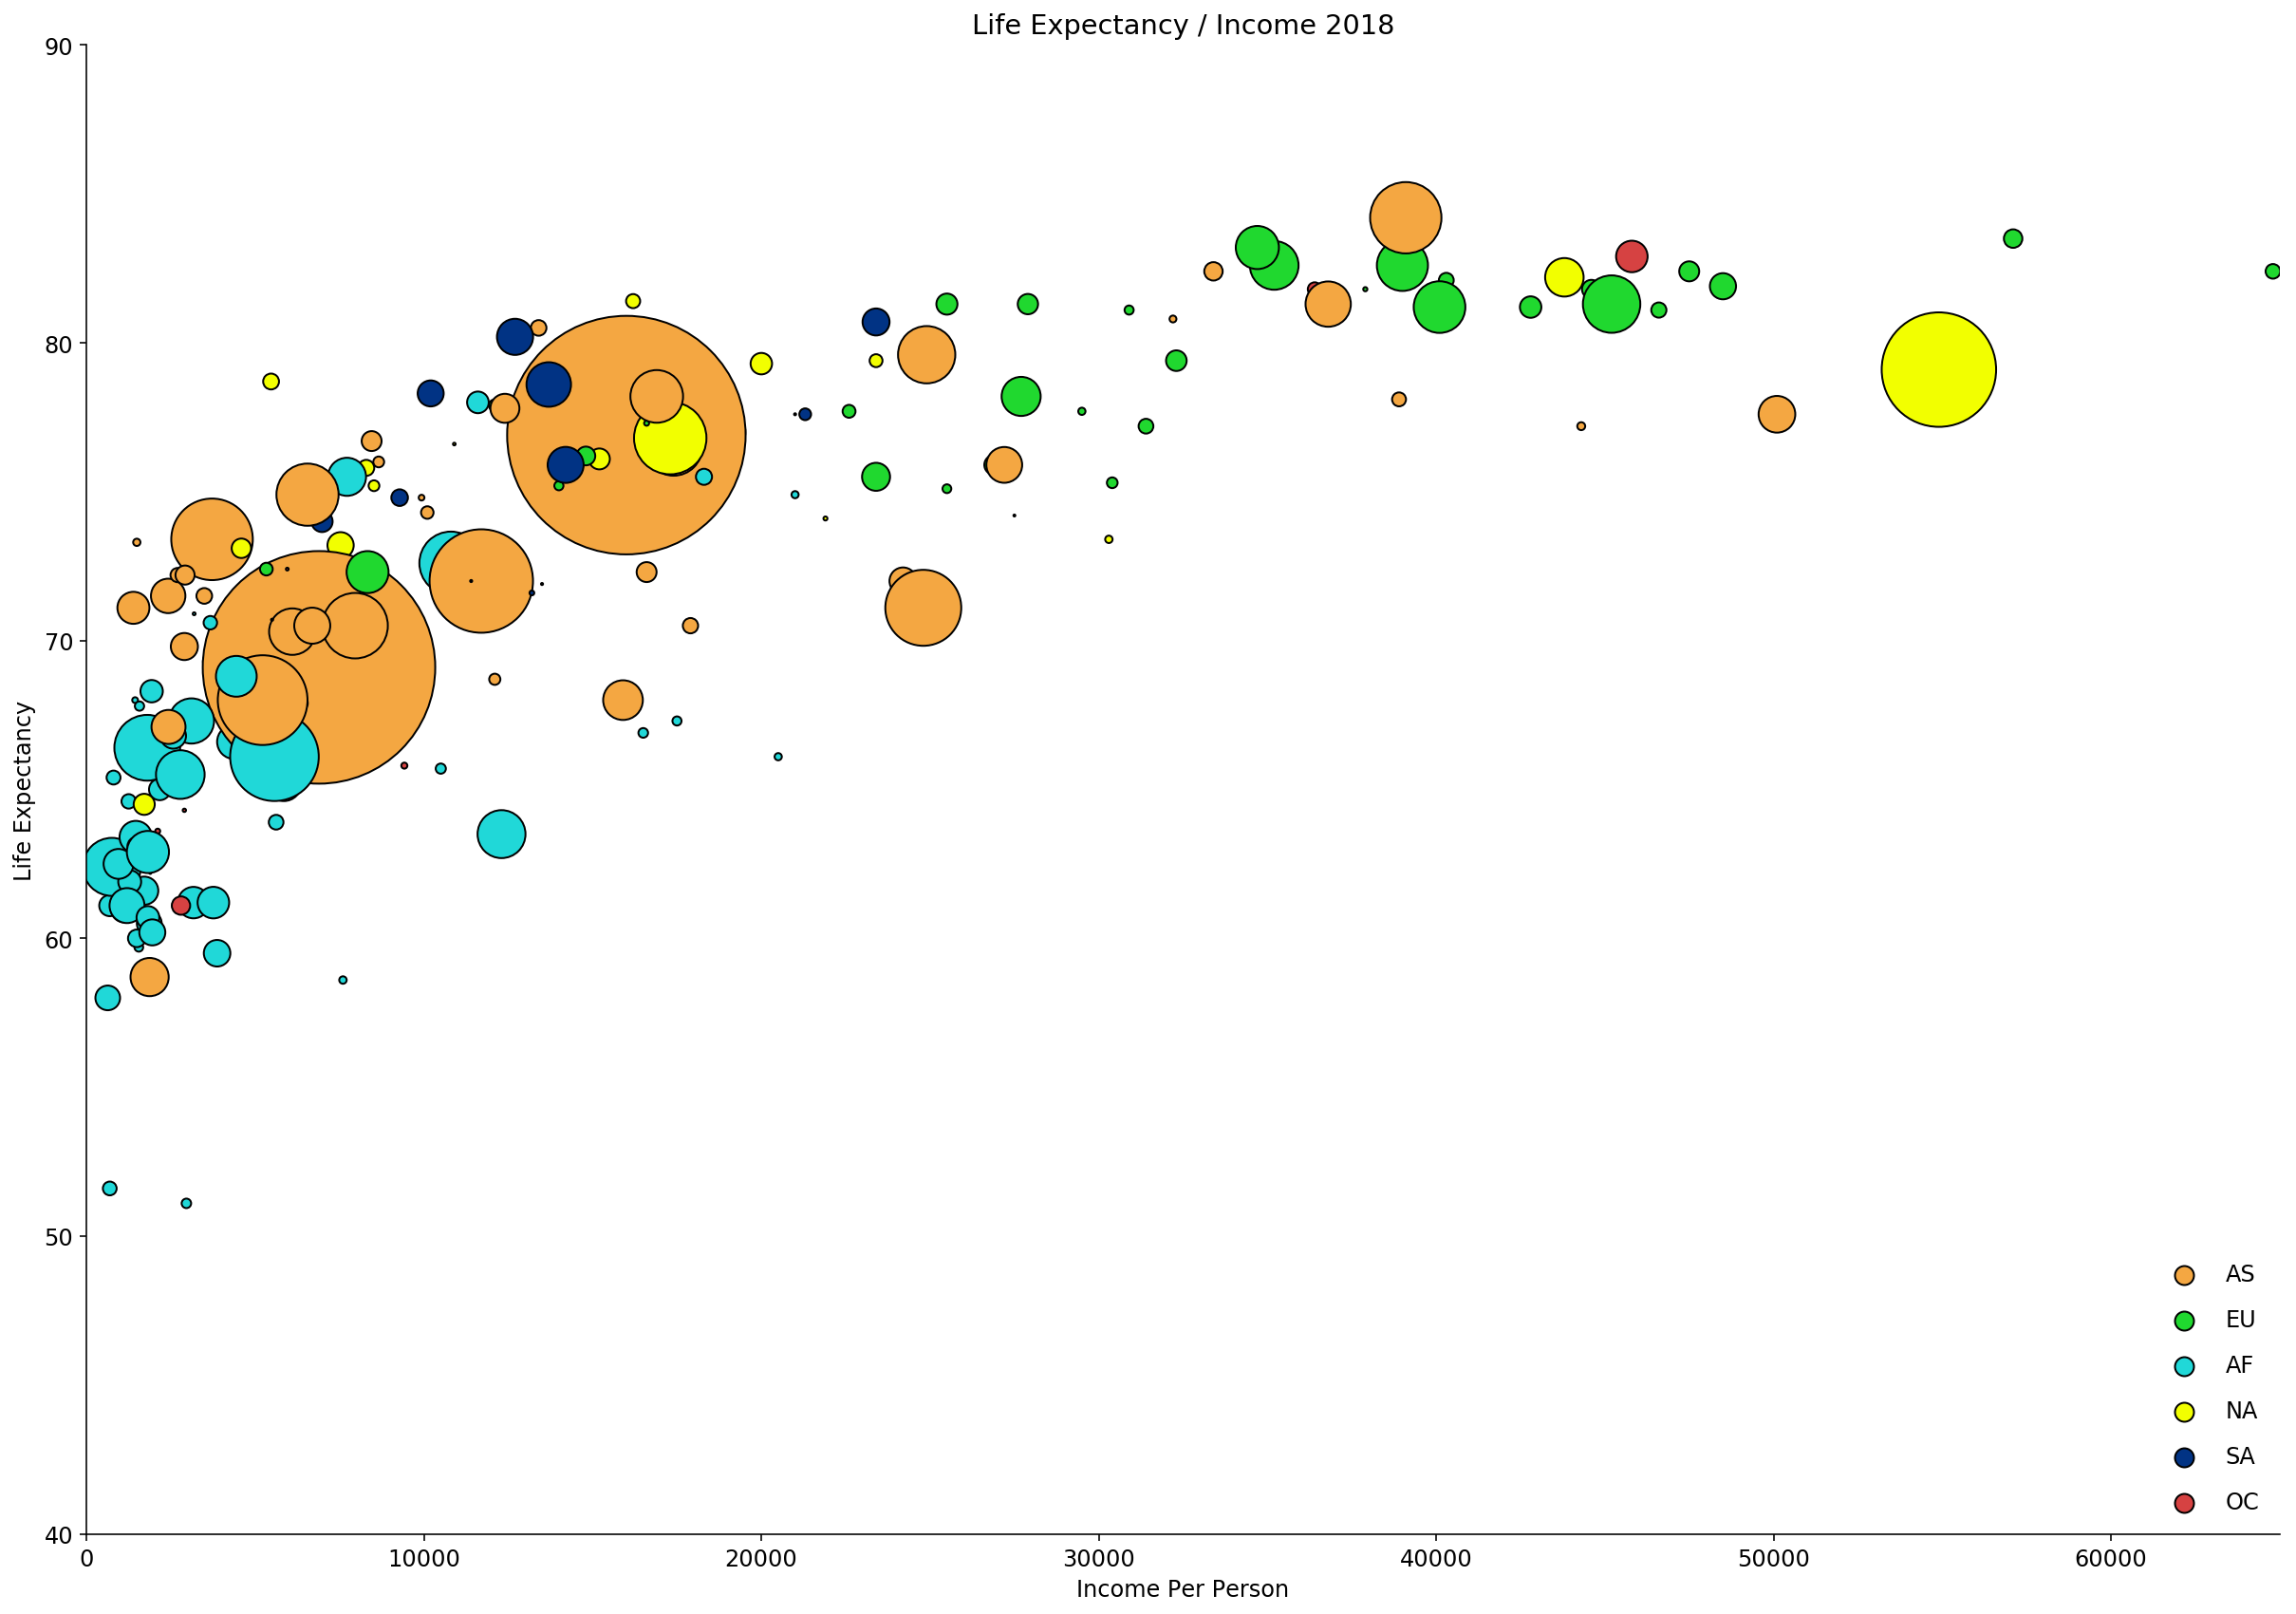

In [0]:
fig, ax = plt.subplots(figsize = (17,12))
    
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rcParams.update({'font.size': 12})

x = df_income_scatter_2018["income_per_person"]
y = df_income_scatter_2018["life_expectancy"]
color = np.array(df_income_scatter_2018["color"])
size = df_income_scatter_2018["population"]

plt.scatter(x = x, y = y, s=size/90000, c = color, edgecolors = "black", label = None)

#set the y label of the plot
ax.set_ylabel(f"Life Expectancy")
#set the x label of the plot
ax.set_xlabel("Income Per Person")
#set the title of the plot
ax.set_title(f"Life Expectancy / Income 2018")
#disable the right and top spine for better look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim(0,65000)
ax.set_ylim(40,90)

#https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

for continent in list(df_income_scatter_2018.continent.unique()):
    plt.scatter([], [], c=color_map[continent], alpha=1, label=str(continent), s = 100, edgecolors = "black")
    
legend1 = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='', loc = 4)

#for population in  [1*10**9, 300, 500]:
#    plt.scatter([], [], c='grey', alpha=1, s=area,
#                label=str(area) + ' km$^2$', edgecolors = "black")
    
#legend2 = plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Colors and Size', loc = 4)

#tighten the plot layout
plt.tight_layout()

#show the plot (basically not necessary for jupyter but I always put it at the end)
plt.show()

> On the lower left we can mostly see countries on the continent Africa. With growing income per person and life expectancy we can observe a cluster of countries of Asia, mixed with some countries of South Africa. After ~30000 income per person the countries mostly are european countries, mixed with some asia countries and a big yellow cirlce, which probably shows the United States. 
>
> Let's now take a look on the same plot for the year 1800.

In [0]:
df_income_scatter_1800 = df_income[df_income.year == 1800].copy()
df_income_scatter_1800["continent"] = df_income_scatter_1800["country"].apply(find_continent)
for x in list(error_map.keys()):
    print(x)
    df_income_scatter_1800.loc[df_income_scatter_1800[df_income_scatter_1800.country == x].index, "continent"] = error_map[x]
df_income_scatter_1800["color"] = df_income_scatter_1800.continent.apply(lambda x: color_map[x])

Brunei
Cape Verde
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Iran
Macedonia, FYR
Micronesia, Fed. Sts.
North Korea
Palestine
Russia
South Korea
St. Lucia
St. Vincent and the Grenadines
Syria
Timor-Leste


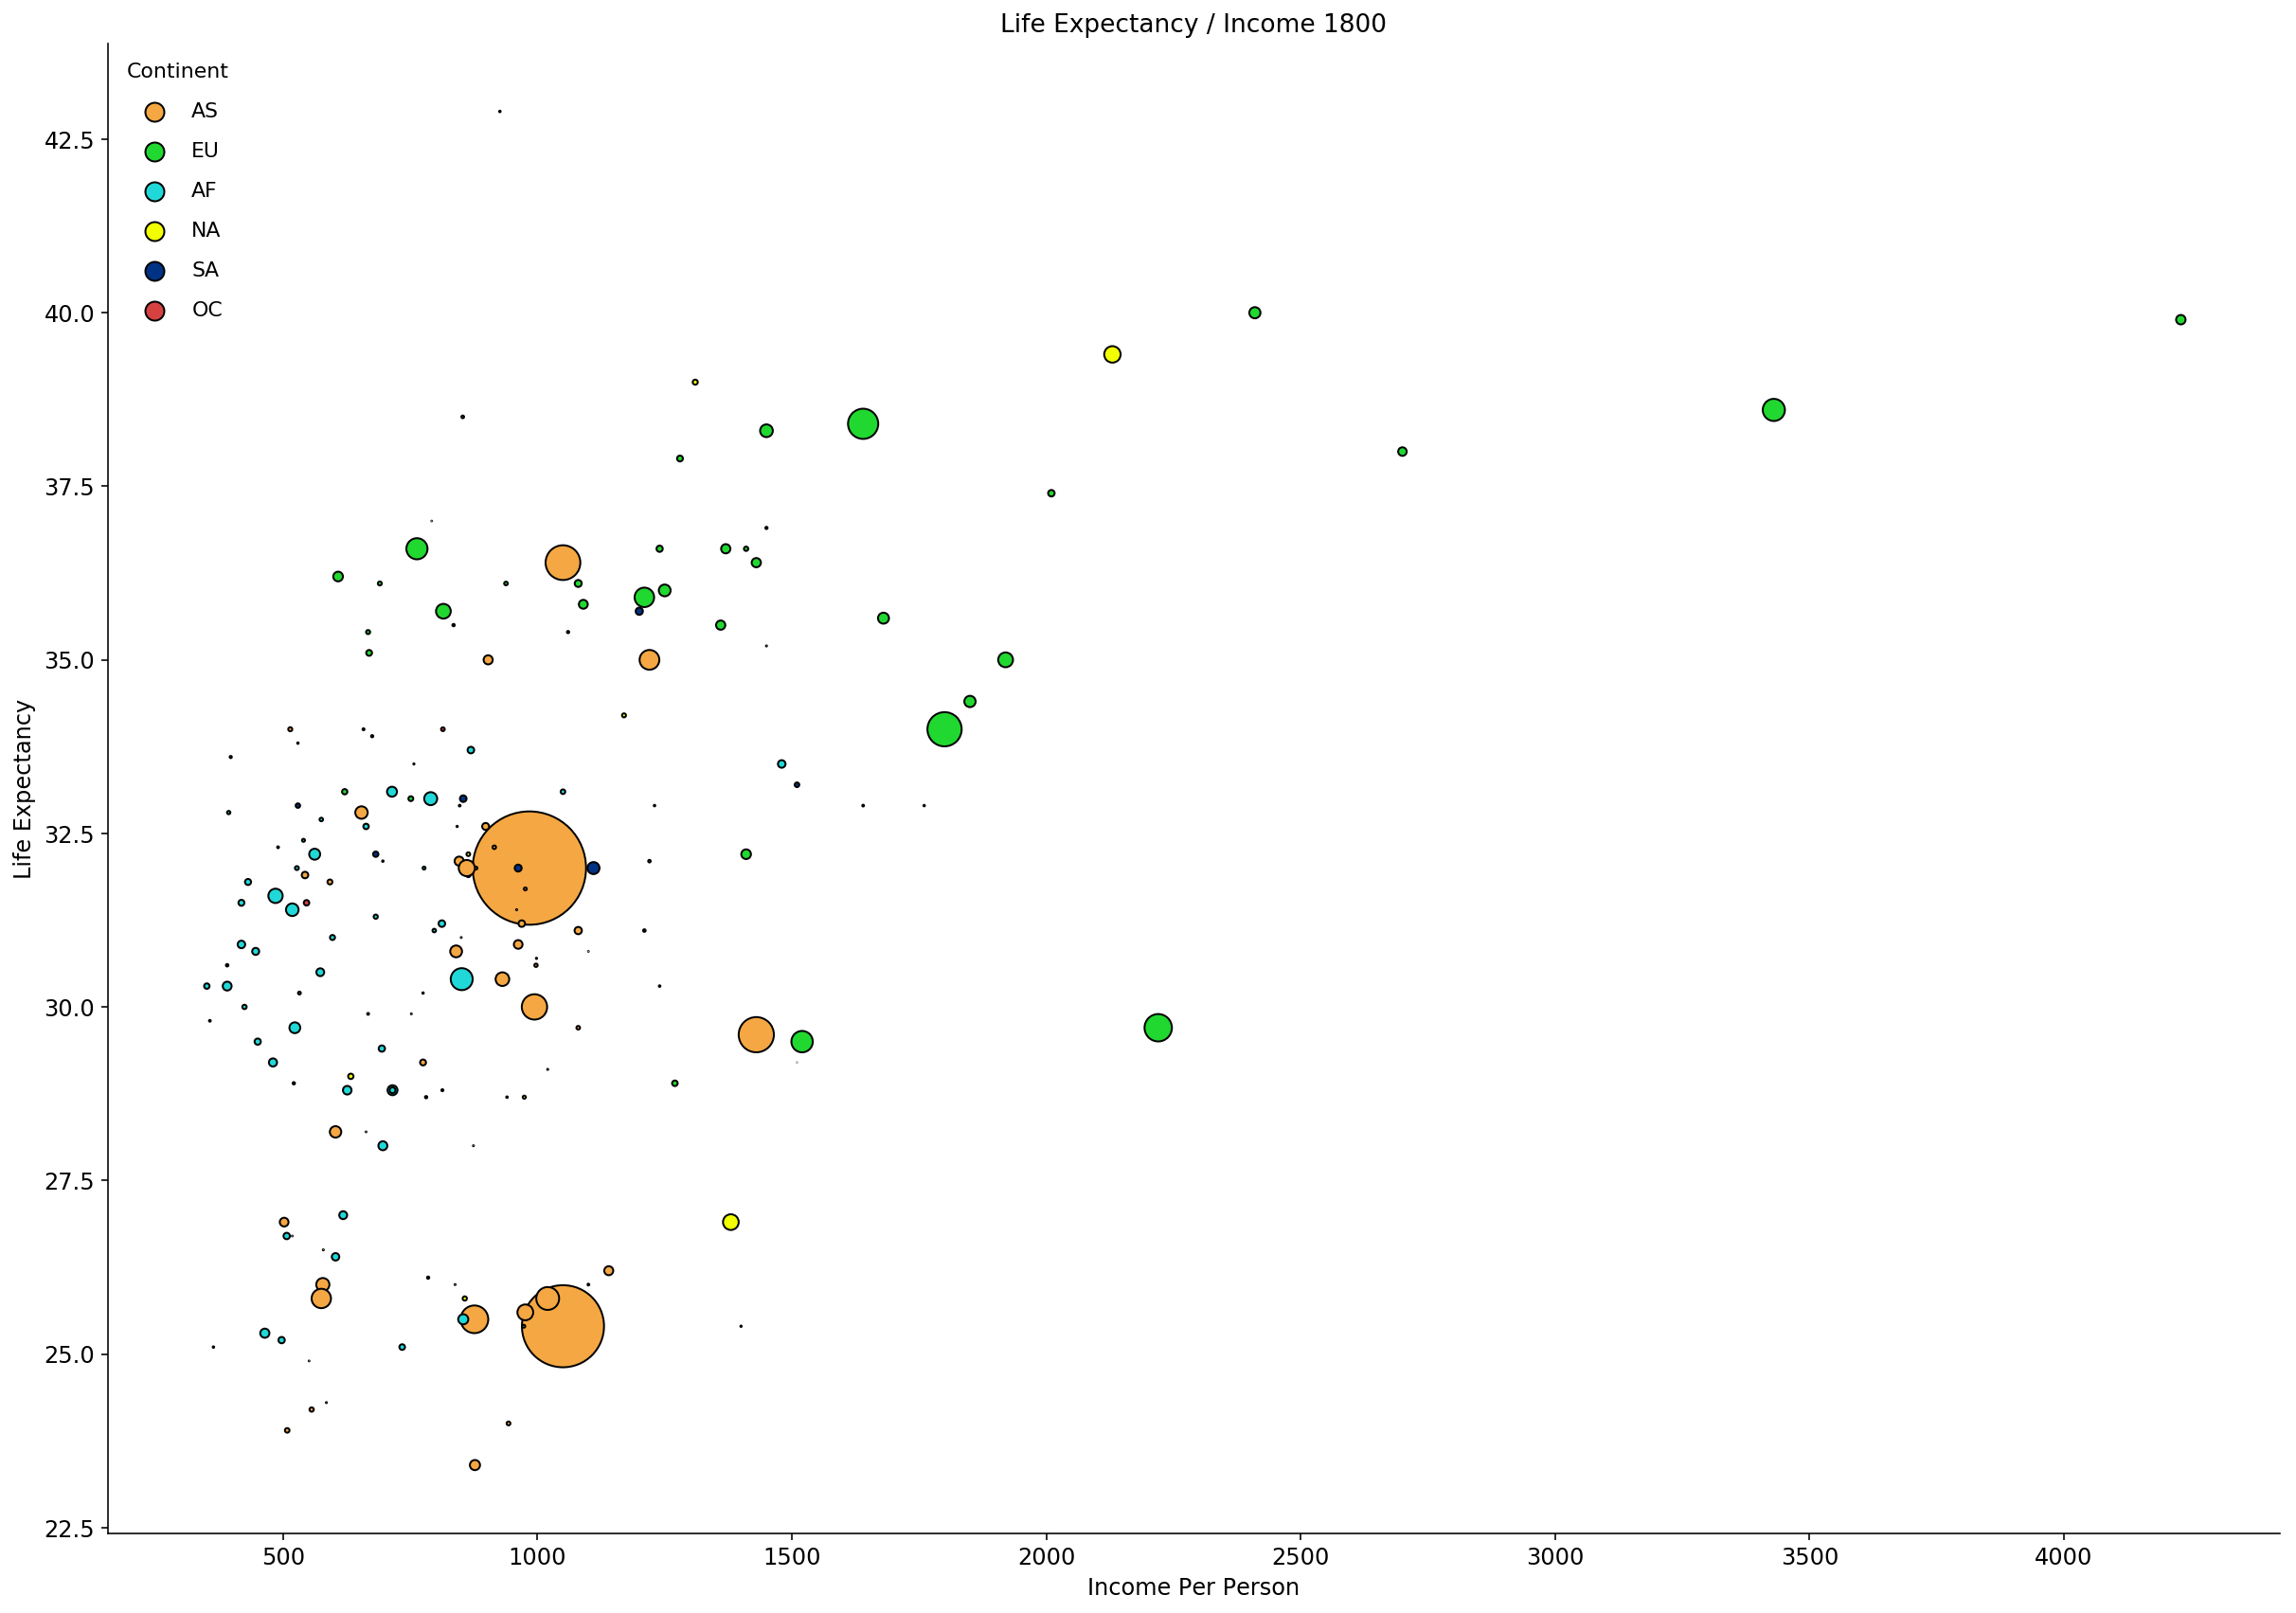

In [0]:
fig, ax = plt.subplots(figsize = (17,12))
    
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rcParams.update({'font.size': 11})

x = df_income_scatter_1800["income_per_person"]
y = df_income_scatter_1800["life_expectancy"]
color = np.array(df_income_scatter_1800["color"])
size = df_income_scatter_1800["population"]

plt.scatter(x = x, y = y, s=size/90000, c = color, edgecolors = "black", label = None)

#set the y label of the plot
ax.set_ylabel(f"Life Expectancy")
#set the x label of the plot
ax.set_xlabel("Income Per Person")
#set the title of the plot
ax.set_title(f"Life Expectancy / Income 1800")
#disable the right and top spine for better look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_xlim(0,50000)
#ax.set_ylim(40,90)

for continent in list(df_income_scatter_2018.continent.unique()):
    plt.scatter([], [], c=color_map[continent], alpha=1, label=str(continent), s = 100, edgecolors = "black")
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Continent')


#tighten the plot layout
plt.tight_layout()

#show the plot (basically not necessary for jupyter but I always put it at the end)
plt.show()

> There was much less population in 1800, so the factor to scale the circle size will be reduced for a cleaner plot.

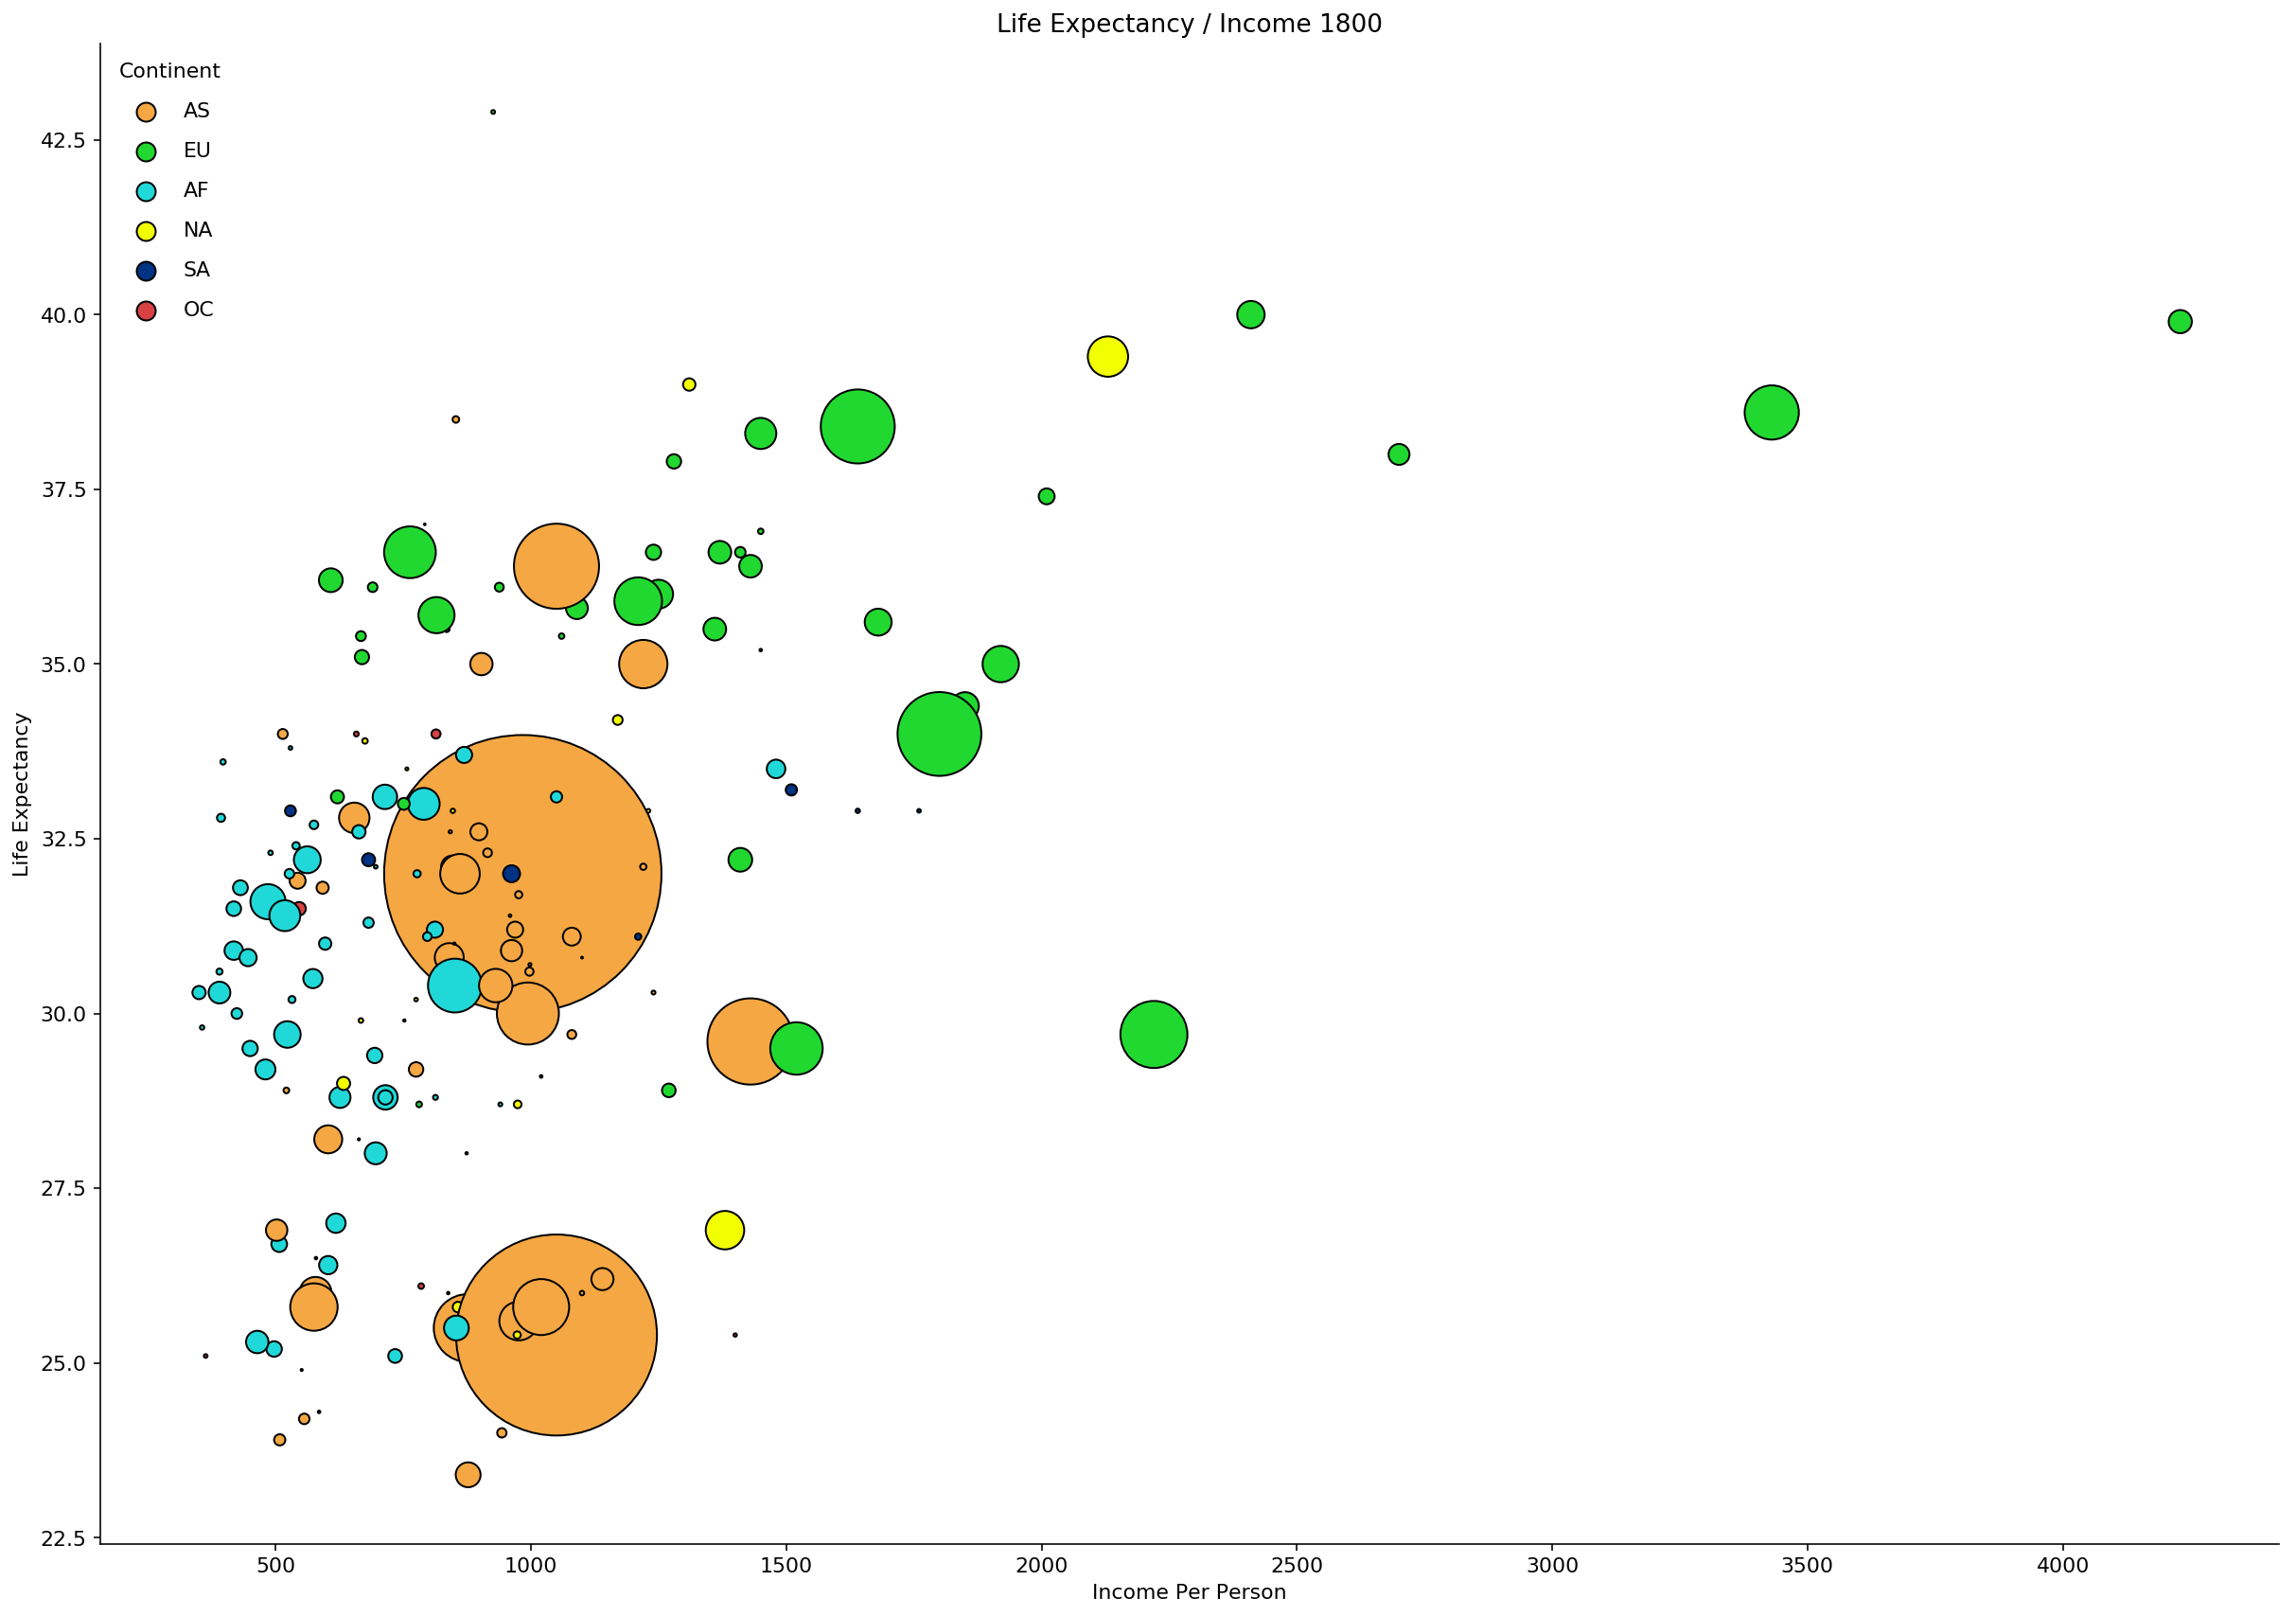

In [0]:
fig, ax = plt.subplots(figsize = (17,12))
    
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
plt.rcParams.update({'font.size': 11})

x = df_income_scatter_1800["income_per_person"]
y = df_income_scatter_1800["life_expectancy"]
color = np.array(df_income_scatter_1800["color"])
size = df_income_scatter_1800["population"]

plt.scatter(x = x, y = y, s=size/15000, c = color, edgecolors = "black", label = None)

#set the y label of the plot
ax.set_ylabel(f"Life Expectancy")
#set the x label of the plot
ax.set_xlabel("Income Per Person")
#set the title of the plot
ax.set_title(f"Life Expectancy / Income 1800")
#disable the right and top spine for better look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#ax.set_xlim(0,50000)
#ax.set_ylim(40,90)

for continent in list(df_income_scatter_2018.continent.unique()):
    plt.scatter([], [], c=color_map[continent], alpha=1, label=str(continent), s = 100, edgecolors = "black")
    
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Continent')


#tighten the plot layout
plt.tight_layout()

#show the plot (basically not necessary for jupyter but I always put it at the end)
plt.show()

> While the income per person and life expectancy was overall lower in 1800, we can observe a similar trend as in 2018. Here, the countries on the continent of europe are mainly leading in the combination of income per person and life expentancy, although there is a european country on ~2300 income per person and 30 years of life expectancy - this country is on the same height as countires with an income of <500. Overall the countries are much more spread than in 2018.

In [0]:
df_income.corr()[["life_expectancy", "income_per_person"]]

life_expectancy  income_per_person
year                      0.790591           0.411314
population                0.126071           0.040847
life_expectancy           1.000000           0.573105
income_per_person         0.573105           1.000000

> The calculation of the correlation supports our observations above. The life expectancy is correlated with 0.57. While they not move 100% together, there is still a connection between this two variable observable.

### Question 4: Which continents developed the most, looking at the metrics of Q1 and Q2?

In [0]:
#will be answered in a later version

### Question 5: Does a higher consume of sugar or alcohol influence the life expectancy to some extend?


In [0]:
#will be answered in a later version

### Question 6: How is the life expectancy distributed between male and female?

In [0]:
#will be answered in a later version

### Question 7: Is there any connection between findings in Q6 and the male/female Body Mass Index (BMI), blood pressure or the amount of cholesterol - fat in blood?

In [0]:
#will be answered in a later version

<a id='conclusions'></a>
## Summary and Conclusions



**Discussed questions so far:**
><ol>
>    <li><p>How did the world poplation changed over time?</p></li>     
>    <li><p>How did the life expectancy and the income per person changed over time?</p></li>     
>    <li><p>Is the life expectancy somehow related to the income?</p></li> 
></ol>

**Limitations due to the cleaning process in the used datasets:**

><ol>
    ><li><p>For the analysis, following countries were dropped out of the dataframe due to too much missing data:</li>
    >Andorra, Dominica, Holy See, Liechtenstein, Marshall Islands, Monaco, Nauru, Palau, San Marino, St. Kitts and Nevis, Tuvalu
></ol>

**Summary and Conclusions**
><ol>
>    <li><p>We can observe an overall and ongoing uptrend for the world population, the income per person and the life expectation</p></li>     
>    <li><p>Especially between 1950 and 1975 was a starting point for a strong increase in all three metrics</p></li>     
>    <li><p>The world population is increasing strongly, and one observable reason for that is the increase in the overall life expectancy</p></li> 
><li><p>We also found that there is a definite kind of relationship between the income per person and the life expectancy. An increasing income is no guarantee for an also increasing life expectancy, but it is likely to some extend</p></li> 
></ol>